2017 Edition

In this notebook, we will learn how to solve the regression problem of predicting flight delays, using decision trees and random forests.

# Goals
The main goals of this project are the following:
1. Revisit the concepts behind Decision Trees and Random Forests
2. Build a simple methodology to address Data Science projects
3. Use the existing implementation of Random Forests in MLLib in a specific use case, that is to predict the delay of flights

# Steps

- First, in section 1, we will go through a short introduction about the fundamentals of Decision Trees and Random Forests, such as feature definition, the form of a decision tree, how does it work and the idea of a forest of decision trees. If the student is familiar with these topics, skip to section 2.
- In section 2, we delve into the details of the use case of this notebook including: providing the context, introducing the data and the basic methodology to address the project in this notebook
- In section 3, we perform data exploration
- In section 4, we build the statistical model and validate it

# 1. Decision trees and Random Forests: Simple but Powerful Algorithms
> Prediction is very difficult, especially if it’s about the future. (Niels Bohr)

Decision trees are a very popular approach to prediction problems. Decision trees can be trained from both categorical and numerical features, to perform classification and regression. They are the oldest and most well-studied types of predictive analytics. In many analytics packages and libraries, most algorithms are devoted either to address classification or regression problems, and they include for example support vector machines (SVM), neural networks, naïve Bayes, logistic regression, and deep learning...

In general, classification refers to the problem of predicting a label, or category, like *spam/not spam*, *rainy/sunny/mild*, for some given data. Regression refers to predicting a numeric quantity like salary, temperature, delay time, product's price. Both classification and regression involve predicting one (or more) values given one (or more) other input values. They require labelled data to perform a training phase, which builds the statistical model: they belong to *supervised learning* techniques.

## 1.1 Feature definition
To understand how regression and classification operate, it is necessary to briefly define the terms that describe their input and output. 

Assume that we want to predict the temperature of tomorrow given today's weather information.
The weather information is a loose concept. For example, we can use many variables to express today's weather such as:
* the average humidity today
* today’s high temperature
* today’s low temperature 
* wind speed
* outlook: e.g. cloudy, rainy, or clear
* ....

These variables are called *features* or *dimensions*. 

Each variable can be quantified. For example, high and low temperatures are measured in degrees Celsius, humidity can be measured as a fraction between 0 and 1, and weather type can be labeled `cloudy`, `rainy` or `clear`...
So, the weather today can be expressed by a list of values: `11.4, 18.0, 0.64, 20, cloudy`. 
Each feature is also called a `predictor`. Together, they constitute a `feature vector`.

A feature whose domain is a set of categories is called **categorical feature**. In our example, `outlook` is a  categorical feature. A feature whose values are numerical is called **numerical feature**. In our example, `temperature` is a numerical feature.

Finally, tomorrow's temperature, that is what we want to predict, is called *target feature*.

## 1.2 Decision Trees & Random Forests
The first question that you might ask is: "Why Decision trees and not another approach?"

Well, the literature shows that the family of algorithms known as decision trees can naturally handle both categorical and numeric features. The training process is easy to understand. The model is easy to interpret. They are robust to outliers in the data, meaning that a few extreme and possibly erroneous data points should not affect the tree at all. The model can be trained in parallel easily. The accuracy is comparable to other methods... In short, there are lots of advantages when using decision trees with respect to other methods! 

The way we use a tree model is very simple to understand. We can say that this process "mimics" the way humans take decisions. For example, to decide whether to play football or not, a natural question would be "does it rain now?". If yes, the decision is `no`. If it's sunny, the condition is favorable to play football. A second natural question could be: "is it windy?". If no, then you may want to stay at home because otherwise it is going to be too hot. Otherwise, a third plausible question could be: "do we have enough people?". If no, then there's no point playing. Otherwise, time to play!

Using a decision tree allows to follow a similar process to that described above (see the image below). Given a new input, the algorithm traverses the tree in a such a way that the input satisfies the condition of each node until reaching a leaf one. The value of the leaf node is the decision.

![A decision tree](https://farm2.staticflickr.com/1690/24308350756_8533286fb5_z.jpg)

The tree model in the figure is built from historical information concerning many past days. The `feature predictor` contains three features: Rain, Is_Windy, Enough_People.
An example of the training data is as follows:

Rain | Is_Windy | Enough_People | Play
-----|----------|---------------|------
Yes | Yes | No | No
No  | No | No | No
No | Yes | Yes | Yes
No | No | Yes | No

As you can see, in the training data, we know the values of predictors and we also know the corresponding answer: we have the ground truth.

One limitation of decision trees is that it's easy to incur in overfitting problems. In other words, the model is too fit to the training data, it is too precise and not general enough. So, when testing the quality of predictions with different testing sets, accuracy could fluctuate. To overcome this limitation, the tree can be pruned after it is built, or even be pruned during the training process. Another approach is building a `Random Decision Forest`.

A `Random Decision Forest`, as its name implies, is a forest of random Decision trees. Each tree element is built randomly from the training data. Randomization generally applies to:
* Building new training data: Random selection of samples from the training data (with replacement) from the original training data
* When building a node: Random selection of a subset of features

To take a decision, the forest "asks" all trees about their prediction, and then chooses the outcome which is the most voted.

# 2. Use case: Flights delay prediction
## 2.1 Context
Every day, in US, there are thousands of flights departures and arrivals: unfortunately, as you may have noticed yourself, flight delays are not a rare event!! Now, given historical data about flights in the country, including the delay information that was computed *a-posteriori* (so the ground truth is available), we want to build a model that can be used to predict how many minutes of delay a flight might experience in the future. This model should provide useful information for the airport to manage better its resources, to minimize the delays and their impact on the journey of its passengers. Alternatively, astute passengers could even use the model to choose the best time for flying, such as to avoid delays.

## 2.2 Data
The data we will use in this notebook has been collected by the RITA (Research and Innovative Technology Administration), and it contains details facets about each air flight that happened in the US between 1987 and 2008. It includes 29 variables such as the origin airport, the destination airport, the scheduled departure time, day, month, the arrival delay... For more information, please visit the following [link](http://stat-computing.org/dataexpo/2009/the-data.html), that provides a lot of detail on the data. Our goal is to build a model to predict `the arrival delay`.

## 2.3 Methodology
For our project, we can follow a simple methodology:

- Understand clearly the context, the data and the goal of the project
- Pre-process the data (data cleaning): the data can contain invalid values or missing values. We have to process our data to deal with them
- Retrieve descriptive information about data: the idea is to discover if whether the data has patterns, whether features have patterns, the skew of values...
- Select appropriate features: Only work with significant features will save us memory, communication cost, and ultimately, training time. Feature selection is also important as it can reduce the impact of noise that characterize the unimportant features.
- Divide the data into training and testing set
- Build a model from the feature in the training set
- Test the model

# 3. Let's play: Data Exploration
Now it's time to apply the simple methodology outlined in section 2.3 on the use case of this notebook.
<div class="alert alert-danger">
**Note:** The source code in this lecture should be executed sequentially in the order.
</div>

## 3.1 Understanding the data schema

The data has 29 features, that can be either categorical or numerical. For example, the `src_airport` (source airport) is categorical: there exist no comparison operator between airport names. We can not say "SGN is bigger than NCE". The departure is numerical, for which a comparison operator exists. For instance, "flight departing before 6PM" can be express by "departure_time < 1800".

In this use case, most features are numerical, except `carier`, `flight_number`, `cancelled`, `cancelation_code` and `diverted`. 

The data contains a header, that is useless in building the statistical model. In addition, we already know the data schema, so we can safely neglect it. Note that there are some features with missing values in some lines of the dataset. The missing values are marked by "NA". These values can cause problems when processing and can lead to unexpected results. Therefore, we need to remove the header and replace all "NA" values by empty values, such as they can be interpreted as null values.

As we have seen already, there are multiple ways to manipulate data:

- Using the RDD abstraction
- Using the DataFrame abstraction. DataFrames can be thought of as distributed tables: each item is a list of values  (the columns). Also, the value in each row of each column can be accessed by the column's name.

Next, we will focus on using DataFrames. However, to use DataFrames, the data must be clean (no invalid values). That means we cannot create DataFrame directly from the "RAW" data. Instead, we will first create an RDD from RAW data, produce a new, clean RDD, then transform it to a DataFrame and work on it. The RDD `cleaned_data` is an RDD[String]. We need to transform it to RDD[(TypeOfColumn1, TypeOfColumn2,.., TypeOfColumn29)] then call a function to create a DataFrame from the new RDD.


## 3.2 Data cleaning
Let's prepare for the cleaning step: Loading the data into an RDD.

First, we need to import some useful python modules for this notebook.

In [191]:
import os
import sys
import re
from pyspark import SparkContext
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.sql.functions import *
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyspark.sql.functions as func
import matplotlib.patches as mpatches
import seaborn as sns
import calendar
import datetime
from time import time

from matplotlib.finance import quotes_historical_yahoo_ochl
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter,MO, TU, WE, TH, FR, SA, SU


# to start testing, we can focus on a single year
input_path = "/datasets/airline/1994.csv"
raw_data = sc.textFile(input_path)

### Question 1 
Remove the header and replace the invalid values in our input dataset.

#### Question 1.1

<div class="alert alert-info">

How many records (rows) in the RAW data?

</div>

```python
print("number of rows before cleaning:", ...)
```

In [89]:
print("number of rows before cleaning:", raw_data.count())

number of rows before cleaning: 5180049


#### Question 1.2


<div class="alert alert-info">
Except for the first column, the others might contain missing values, which are denoted by `NA`.  

Remove the header and replace NA by an empty character. How many records are left after cleaning the RAW dataset?  

<div class="label label-danger">**NOTE**:</div> be careful with the valid values that can contain string `NA` inside.
</div>

```python
# extract the header
header = raw_data....

# replace invalid data with NULL and remove header
cleaned_data = (raw_data\
        # filter out the header
        .filter(...)
        # replace the missing values with empty characters
        .map(...)
        )
        
print("number of rows after cleaning:", ...)
```

In [192]:

# extract the header
header = raw_data.first()

# replace invalid data with NULL and remove header
cleaned_data = (
    raw_data
    # filter out the header
    .filter(lambda line: line != header)
    # replace the missing values with empty characters
    #.map(lambda line: line.replace(',NA', ','))
    .map(lambda line: ','.join(list(map(lambda x: x if x != 'NA' else '',line.split(',')))))
    
)
        
print("number of rows after cleaning:", cleaned_data.count())

number of rows after cleaning: 5180048


In [91]:
cleaned_data.filter(lambda line: ',NA' in line).take(1)

[]

In [92]:
cleaned_data.take(1)

['1994,1,7,5,858,900,954,1003,US,227,,56,63,,-9,-2,CLT,ORF,290,,,0,,0,,,,,']

<div class="alert alert-success">After the cleaning there are no rows with NA.</div>

## 3.3 Transforming our data to a DataFrame

Now the data is clean, valid and can be used to create DataFrame. First, we will declare the data schema for the DataFrame. By doing that, we can specify the name and data type of each column.

In [193]:
sqlContext = SQLContext(sc)


# Declare the data schema
# see http://stat-computing.org/dataexpo/2009/the-data.html
# for more information
airline_data_schema = StructType([ \
    #StructField( name, dataType, nullable)
    StructField("year",                     IntegerType(), True), \
    StructField("month",                    IntegerType(), True), \
    StructField("day_of_month",             IntegerType(), True), \
    StructField("day_of_week",              IntegerType(), True), \
    StructField("departure_time",           IntegerType(), True), \
    StructField("scheduled_departure_time", IntegerType(), True), \
    StructField("arrival_time",             IntegerType(), True), \
    StructField("scheduled_arrival_time",   IntegerType(), True), \
    StructField("carrier",                  StringType(),  True), \
    StructField("flight_number",            StringType(),  True), \
    StructField("tail_number",              StringType(), True), \
    StructField("actual_elapsed_time",      IntegerType(), True), \
    StructField("scheduled_elapsed_time",   IntegerType(), True), \
    StructField("air_time",                 IntegerType(), True), \
    StructField("arrival_delay",            IntegerType(), True), \
    StructField("departure_delay",          IntegerType(), True), \
    StructField("src_airport",              StringType(),  True), \
    StructField("dest_airport",             StringType(),  True), \
    StructField("distance",                 IntegerType(), True), \
    StructField("taxi_in_time",             IntegerType(), True), \
    StructField("taxi_out_time",            IntegerType(), True), \
    StructField("cancelled",                StringType(),  True), \
    StructField("cancellation_code",        StringType(),  True), \
    StructField("diverted",                 StringType(),  True), \
    StructField("carrier_delay",            IntegerType(), True), \
    StructField("weather_delay",            IntegerType(), True), \
    StructField("nas_delay",                IntegerType(), True), \
    StructField("security_delay",           IntegerType(), True), \
    StructField("late_aircraft_delay",      IntegerType(), True)\
])

To "convert" an RDD to DataFrame, each element in the RDD must be a list of column values that match the data schema.

In [194]:
# convert each line into a tuple of features (columns)
cleaned_data_to_columns = cleaned_data.map(lambda l: l.split(","))\
    .map(lambda cols: 
         (
            int(cols[0])  if cols[0] else None,
            int(cols[1])  if cols[1] else None,
            int(cols[2])  if cols[2] else None,
            int(cols[3])  if cols[3] else None,
            int(cols[4])  if cols[4] else None,
            int(cols[5])  if cols[5] else None,
            int(cols[6])  if cols[6] else None,
            int(cols[7])  if cols[7] else None,
            cols[8]       if cols[8] else None,
            cols[9]       if cols[9] else None,
            cols[10]      if cols[10] else None,
            int(cols[11]) if cols[11] else None,
            int(cols[12]) if cols[12] else None,
            int(cols[13]) if cols[13] else None,
            int(cols[14]) if cols[14] else None,
            int(cols[15]) if cols[15] else None,
            cols[16]      if cols[16] else None,
            cols[17]      if cols[17] else None,
            int(cols[18]) if cols[18] else None,
            int(cols[19]) if cols[19] else None,
            int(cols[20]) if cols[20] else None,
            cols[21]      if cols[21] else None,
            cols[22]      if cols[22] else None,
            cols[23]      if cols[23] else None,
            int(cols[24]) if cols[24] else None,
            int(cols[25]) if cols[25] else None,
            int(cols[26]) if cols[26] else None,
            int(cols[27]) if cols[27] else None,
            int(cols[28]) if cols[28] else None
         ))

To train our model, we use the following features: `year`, `month`, `day_of_month`, `day_of_week`, `scheduled_departure_time`, `scheduled_arrival_time`, `arrival_delay`, `distance`, `src_airport`, `dest_airport`.

### Question 2

<div class="alert alert-info">
From RDD `cleaned_data_to_columns` and the schema `airline_data_schema` which are declared before, create a new DataFrame **`df`**.  

Note that, we should only select the necessary features defined above:  

[ `year`, `month`, `day_of_month`, `day_of_week`, `scheduled_departure_time`, `scheduled_arrival_time`, `arrival_delay`, `distance`, `src_airport`, `dest_airport`].  

Finally, the data should be cached.
</div>

```python
# create dataframe df
df = (sqlContext....
        .select(...)
        .cache()
    )
```

In [95]:
df = (
    sqlContext
    .createDataFrame(cleaned_data_to_columns, airline_data_schema)
    .select([ 'year', 'month', 'day_of_month', 'day_of_week', 'scheduled_departure_time', 'scheduled_arrival_time','scheduled_elapsed_time','carrier', 'arrival_delay', 'distance', 'src_airport', 'dest_airport'])
    .cache()
    )


In [96]:
sqlContext.createDataFrame(cleaned_data_to_columns, airline_data_schema).count()

5180048

In [97]:
sqlContext.createDataFrame(cleaned_data_to_columns, airline_data_schema).drop_duplicates().count()

5180048

<div class="alert alert-success">Here we checked that there are no duplicates in our data.</div>

## 3.4 Descriptive statistics
Next, we will go over a series of simple queries on our data, to explore it and compute statistics. These queries directly map to the questions you need to answer. 

**NOTE:** finding the right question to ask is difficult! Don't be afraid to complement the questions below, with your own questions that, in your opinion, are valuable ways to inspect data. This can give you extra points!

- Basic queries:
  - How many unique origin airports?
  - How many unique destination airports?
  - How many carriers?
  - How many flights that have a scheduled departure time later than 18h00?
  
- Statistic on flight volume: this kind of statistics are helpful to reason about delays. Indeed, it is plausible to assume that "*the more flights in an airport, the higher the probability of delay*".
  - How many flights in each month of the year?
  - Is there any relationship between the number of flights and the days of week?
  - How many flights in different days of months and in different hours of days?
  - Which are the top 20 busiest airports (this depends on inbound and outbound traffic)?
  - Which are the top 20 busiest carriers?
  
- Statistic on the fraction of delayed flights
  - What is the percentage of delayed flights (over total flights) for different hours of the day?
  - Which hours of the day are characterized by the longest flight delay?
  - What are the fluctuation of the percentage of delayed flights over different time granularities?
  - What is the percentage of delayed flights which depart from one of the top 20 busiest airports?
  - What is the percentage of delayed flights which belong to one of the top 20 busiest carriers?

### Question 3: Basic queries

#### Question 3.1 
<div class="alert alert-info">
How many origin airports? How many destination airports?
</div>

```python
num_src_airport = df. ...
num_dest_airport = df. ...
print("number of origin airports ", num_src_airport)
print("number of destination airports ", num_src_airport)
```

In [98]:
num_src_airport = df.select('src_airport').distinct().count()
num_dest_airport = df.select('dest_airport').distinct().count()
print("number of origin airports ", num_src_airport)
print("number of destination airports ", num_dest_airport)

number of origin airports  224
number of destination airports  225


Since the number of airports are different, we look deeper

In [99]:
df.select('src_airport').distinct().intersect(df.select('dest_airport').distinct()).count()

223

<div class="alert alert-success">There are only 223 airports with both departures and arrivals. But what are our strange airports?</div>

In [100]:
from IPython.display import display
df.select('src_airport').distinct().subtract(df.select('dest_airport').distinct()).show()

+-----------+
|src_airport|
+-----------+
|        SPN|
+-----------+



In [101]:
df.filter(df.src_airport == 'SPN').drop('scheduled_departure_time', 'scheduled_arrival_time').show()

+----+-----+------------+-----------+----------------------+-------+-------------+--------+-----------+------------+
|year|month|day_of_month|day_of_week|scheduled_elapsed_time|carrier|arrival_delay|distance|src_airport|dest_airport|
+----+-----+------------+-----------+----------------------+-------+-------------+--------+-----------+------------+
|1994|   12|           4|          7|                    50|     UA|           23|     129|        SPN|         GUM|
|1994|   12|           7|          3|                    50|     UA|           -3|     129|        SPN|         GUM|
|1994|   12|          11|          7|                    50|     UA|          -30|     129|        SPN|         GUM|
|1994|   12|          14|          3|                    50|     UA|          -13|     129|        SPN|         GUM|
|1994|   12|          21|          3|                    50|     UA|          -28|     129|        SPN|         GUM|
|1994|   12|          25|          7|                    50|    

What about the anomal destination airports?

In [102]:
df.select('dest_airport').distinct().subtract(df.select('src_airport').distinct()).show()

+------------+
|dest_airport|
+------------+
|         BFI|
|         GUM|
+------------+



In [103]:
df.filter(df.dest_airport == 'GUM').drop('scheduled_departure_time', 'scheduled_arrival_time').show()

+----+-----+------------+-----------+----------------------+-------+-------------+--------+-----------+------------+
|year|month|day_of_month|day_of_week|scheduled_elapsed_time|carrier|arrival_delay|distance|src_airport|dest_airport|
+----+-----+------------+-----------+----------------------+-------+-------------+--------+-----------+------------+
|1994|   12|           4|          7|                    50|     UA|           23|     129|        SPN|         GUM|
|1994|   12|           7|          3|                    50|     UA|           -3|     129|        SPN|         GUM|
|1994|   12|          11|          7|                    50|     UA|          -30|     129|        SPN|         GUM|
|1994|   12|          14|          3|                    50|     UA|          -13|     129|        SPN|         GUM|
|1994|   12|          21|          3|                    50|     UA|          -28|     129|        SPN|         GUM|
|1994|   12|          25|          7|                    50|    

In [104]:
df.filter(df.dest_airport == 'BFI').drop('scheduled_departure_time', 'scheduled_arrival_time').show()

+----+-----+------------+-----------+----------------------+-------+-------------+--------+-----------+------------+
|year|month|day_of_month|day_of_week|scheduled_elapsed_time|carrier|arrival_delay|distance|src_airport|dest_airport|
+----+-----+------------+-----------+----------------------+-------+-------------+--------+-----------+------------+
|1994|    8|          26|          5|                   200|     AS|         null|    1444|        ANC|         BFI|
+----+-----+------------+-----------+----------------------+-------+-------------+--------+-----------+------------+



<div class="alert alert-success">These are anomalies, usually an airport has both departures and arrivals. Googling at these airports, we have seen that GUM and SPN are airports that are placed in the commonwealth territories of the USA. The BFI airport is in Seattle, but is used mainly by cargo flights that we do not consider. Once a year, there is a charter that leaves ANC and flies to BFI.</div>

#### Question 3.2
<div class="alert alert-info">
How many carriers?
</div>

```python
num_carrier = df. ...
print("the number distinct carriers:", num_carrier)
```

In [20]:
num_carrier = df.select('carrier').distinct().count()
print("the number distinct carriers:", num_carrier)

the number distinct carriers: 10


#### Question 3.3

<div class="alert alert-info">
How many night flights (that is, flights departing later than 6pm)?
</div>

```python
print("the number of night flights:", ...)
```

In [21]:
print("the number of night flights:", df.filter((df.scheduled_departure_time > 1800) |(df.scheduled_departure_time < 600)).count())

the number of night flights: 1121918


### Question 4: Flight volume statistics

#### Question 4.1: 

<div class="alert alert-info">
How many flights in each month of the year? Plot the changes over months by a line chart and comment the figure.
From the result, we can learn the dynamics of flight volume over months. For example, if we only consider flights in 1994 (to start, it's always better to focus on smaller amount of data), we can discuss about which months are most likely to have flights experiencing delays.
</div>


```python
statistic_month = df....
#statistic_day_of_week.show()
pdf = pd.DataFrame(data=...)
plt.xlabel("Months")
plt.ylabel("Number of flights")
plt.title('Figure 1: The change of number flights over months')
plt.grid(True,which="both",ls="-")
plt.plot(..., ...)
plt.show()

```

In [22]:
statistic_month = df.groupby('month').count().orderBy('month').collect()

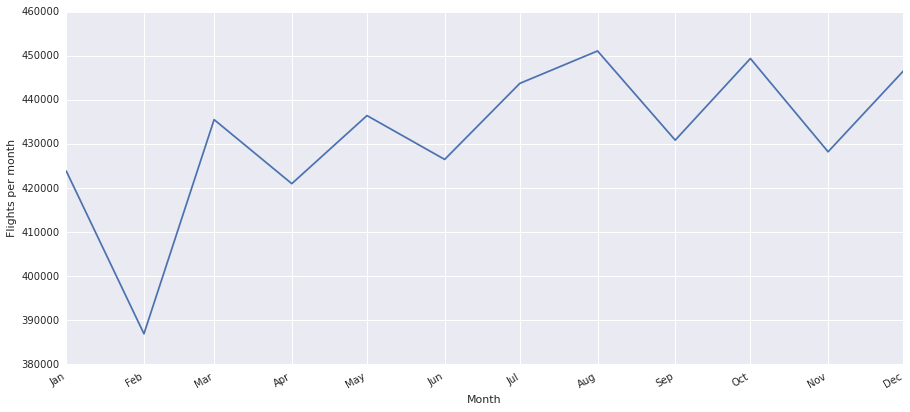

In [23]:
flights =  [w[1] for w in statistic_month]

#print(flights_1994)

dates=[]
for i in range(1,13):
    dates.append(datetime.date(1994, i, 1))

# every 3rd month
months = MonthLocator(range(1, 13))
monthsFmt = DateFormatter("%b")

fig, ax = plt.subplots(figsize=(15, 7))

ax.plot_date(dates, flights, '-')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.xlabel('Month')
plt.ylabel('Flights per month')
fig.autofmt_xdate()

plt.show()

<div class="alert alert-success">It looks that the busiest months are those where people moves for vacation. Expecially december, where people move for christmas. We have noted that there is a drop in february, we think this is due to the fact that there are less days in february.</div>

In [98]:
day_months = []
for i in range(1,13):
    day_months.append(calendar.monthrange(1994, i)[1])
#print(day_months)

In [ ]:
flights_monthday = []
for i in range(12):
    flights_monthday.append(int(flights[i] / day_months[i]))
#print(flights_monthday)

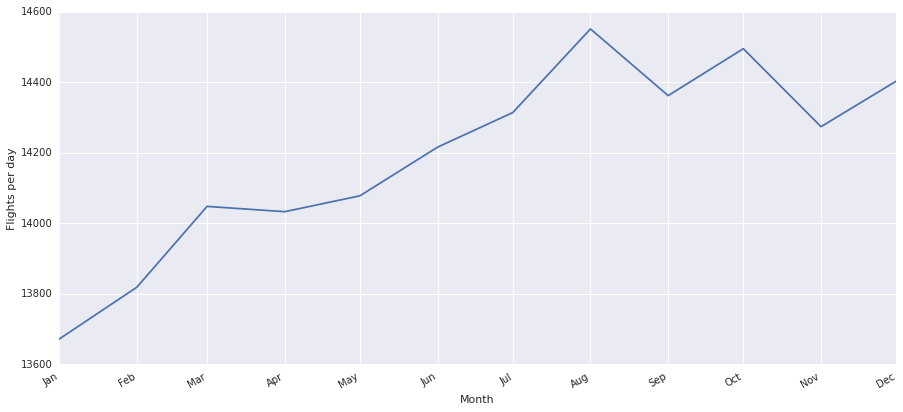

In [26]:
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot_date(dates, flights_monthday, '-')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.xlabel('Month')
plt.ylabel('Flights per day')
fig.autofmt_xdate()

plt.show()

<div class="alert alert-success">Here we plotted the volume of each month divided by its number of days. We note that the results are quite different respect before. 

We see that there is a big increment from April to August, where there is the annual peak. We think that this is quite common, but we also need to consider that in June and July 1994, USA hosted the World Cup of Football and this may have increased the number of flights. After August, we have another peak in October, we think this is due to people that do not travel in Summer and travel in October when prices are lower.
After October, the next peak is in December because of Christmas and New Year celebration. After December, travels drop and they start slowly increasing, there is a little peak in March, we think for Easter and then there is the usual increment until August.

Looking at the numbers, The month with the lowest number of flights is Janaury, with 13672 flights per day, and the month with the highest number of flights is August, with 14551 flights per day. There is a difference of circa 900 days per day, which means about 27000 flights per month.</div>



<div class="alert alert-success">The important thing is that from January to August there are only 900 more flights, which is an increment of 6.23%. This means that there is a stagionality in the number of flights, but it is quite limited. This also means that a carrier does not need to have a variable fleet in order to meet the demand, which is quite stable. 

We can also deduce that there is a group of people that travel independently from the month of the year, we think these are people that work, and they are the great part of the customers of airlines.
</div>

In [27]:
statistic_day_month = df.groupby('month','day_of_month').count().orderBy('month','day_of_month').collect()

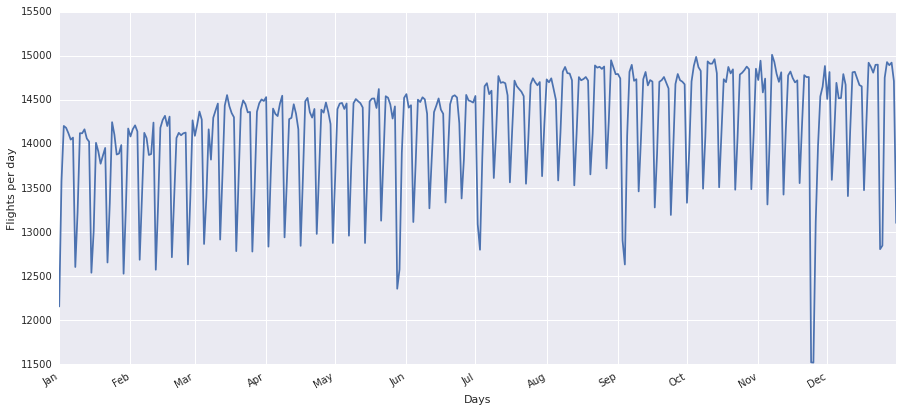

In [28]:
dates=[]
month_day = [(x,y) for x,y,z in statistic_day_month]
for x in month_day:
    dates.append(datetime.date(1994, x[0], x[1]))

flights_day_month = [w[2] for w in statistic_day_month]
    
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot_date(dates, flights_day_month, '-')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.xlabel('Days')
plt.ylabel('Flights per day')
fig.autofmt_xdate()

plt.show()    
    

<div class="alert alert-success">When we look at the number of flights per day, we see a recurrent pattern that repeats every week, we will look at it later. We also see that the variation month by month is more gentle. The data are the same, but they are more distributed and thus we do not see peaks but a general pattern that confirms what we saw before.
When we look at particular drops, we can note that the biggest one is during November 24 and 25, which corresponds to Thanksgiving and Black Friday, and only 11500 persons travel.
</div>

#### Question 4.2: 
<div class="alert alert-info">
Is there any relationship between the number of flights and the days of the week?  

Plot a bar chart and interpret the figure.  

By answering this question, we could learn about the importance of the weekend/weekday feature for our predictive task.
</div>

```python
statistic_day_of_week = ...
#statistic_day_of_week.show()
pdf = pd.DataFrame(...)
plt.xlabel("Days of week")
plt.ylabel("Number of flights")
plt.title('Figure 2: The change of number flights over days of week')
plt.grid(True,which="both",ls="-")
map_int_into_day = { 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat", 7:"Sun" }
day_of_week_label = pdf[0].map(lambda i: map_int_into_day[i])

# plot bar chart
plt....

plt.xticks(pdf[0], day_of_week_label)
plt.show()
```

In [ ]:
statistic_day_of_week = df.groupby('day_of_week').count().orderBy('day_of_week').collect()
#print(statistic_day_of_week)

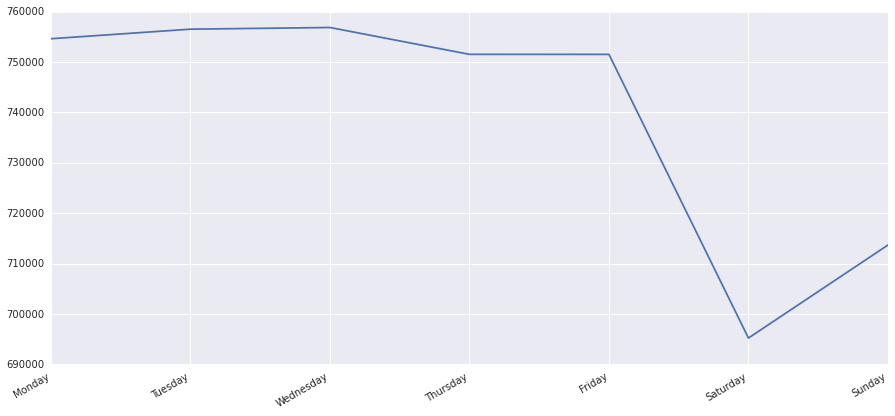

In [30]:
flights =  [w[1] for w in statistic_day_of_week]
#print(flights)

dates=[]
for i in range(1,8):
    dates.append(datetime.date(1994, 1, i+2))
    
#print(dates)

weeks = WeekdayLocator(byweekday=(MO, TU, WE, TH, FR, SA, SU))
weeksFmt = DateFormatter("%A")

fig, ax = plt.subplots(figsize=(15, 7))

ax.plot_date(dates, flights, '-')

ax.xaxis.set_major_locator(weeks)
ax.xaxis.set_major_formatter(weeksFmt)

fig.autofmt_xdate()

<div class="alert alert-success">The graph above shows that the most of air traffic is concentrated during the working days (from Monday to Friday). In fact we are considering flights in USA, where the airplaine is the most used transport for medium and long travels. On Saturday and Sunday there is a drop of flights, we think this is due to the Saturday-night stay rule, which was quite common in the 90'. For travelers to qualify for a low round-trip airfare, some legacy carriers require them to spend Saturday night at their destination. The rule is based on the airlines' assumption that business travelers are more likely than leisure travelers to spend Saturday night at home. For example, a business traveler may depart on a Sunday or Monday and then return home that Friday or Saturday.

Business travelers' demand for travel is less elastic and airlines attempt to increase their profits by price-discriminating business travelers and leisure travelers. Business travels are also more loyal to a particular airline, and therefore are more likely to accept a higher price. 
</div>


#### Question 4.3
<div class="alert alert-info">
How many flights in different days of months and in different hours of days?  

Plot  bar charts, and interpret your figures.
</div>

```python
statistic_day_of_month = df...
#statistic_day_of_month.show()
pdf = ...

# plot bar chart
...
...
...
plt.show()
```

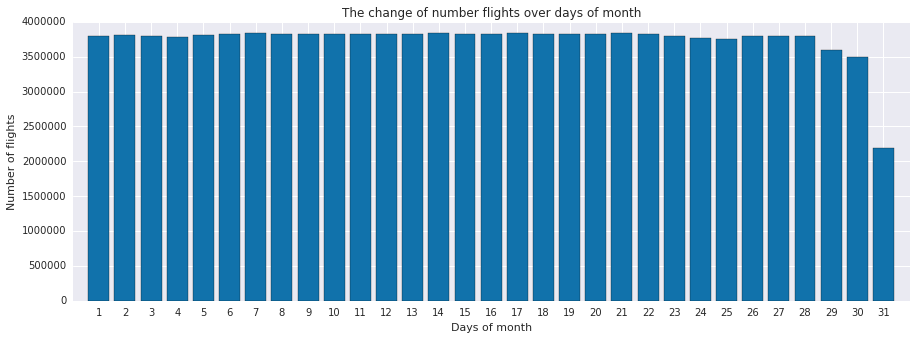

In [131]:
statistic_day_of_month = df.groupby('day_of_month').count().collect()
#statistic_day_of_month.show()
pdf = pd.DataFrame(data=statistic_day_of_month)

# plot bar chart
plt.figure(figsize = (15,5))
plt.xlabel("Days of month")
plt.ylabel("Number of flights")
plt.title('The change of number flights over days of month')
plt.xlim([0,32])
plt.xticks(pdf[0])
plt.bar(pdf[0],pdf[1],align='center', color='#1172ab')

plt.show()

<div class="alert alert-success">
 Here we see that flights are not related to the day of the month, in facto from the first day to the 28th we observe a constant behaviour. 29, 30 and 31 are the exception because they are not present in all the months, thus the number of flights is lower. In 1994  february had 28 days and this explain why 29 and 30 have a little bit fewer flights.
31 has very few flights because there are only 7 months with 31 days.
</div>


```python
statistic_hour_of_day = df...
#statistic_hour_of_day.show()
pdf = pd.DataFrame(...)

#plot char chart
...
...
...
plt.title('Figure 3: The change of number flights over hours of day')
plt.show()
```

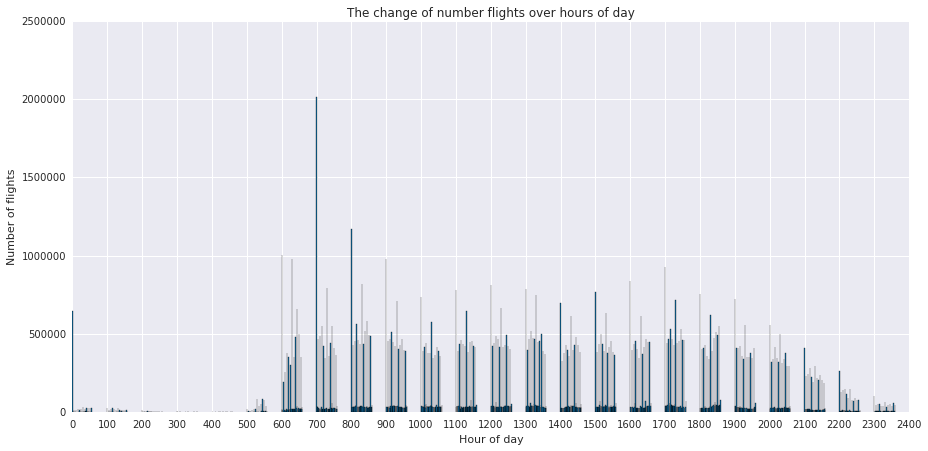

In [132]:
statistic_hour_of_day = df.groupby('scheduled_departure_time').count().collect()
#statistic_hour_of_day.show()
pdf = pd.DataFrame(data=statistic_hour_of_day)

# plot bar chart
plt.figure(figsize = (15,7))
plt.xlabel("Hour of day")
plt.ylabel("Number of flights")
plt.title('The change of number flights over hours of day')
plt.xticks(range(0,2500,100))
plt.bar(pdf[0],pdf[1],align='center', color='#1172ab')

plt.show()


<div class="alert alert-success">
 We can see that during the night(from 00.00 to 06.00) there are few departures, almost zero. Many flights depart in the morning at 07:00, where we have the pick of the day. Then the departures looks stable for all the day until 20, when they start decreasing. Another interesting thing to note is that for each hour, the peak of departures is at XX:00. All of this makes sense, from our life experience flights departs expecially during the day and at reasonable times: there is no flight that departs at 07:12 for example. To conclude, we note that each hour is separated by a zone where no flights departs, we will look at this later.
</div>

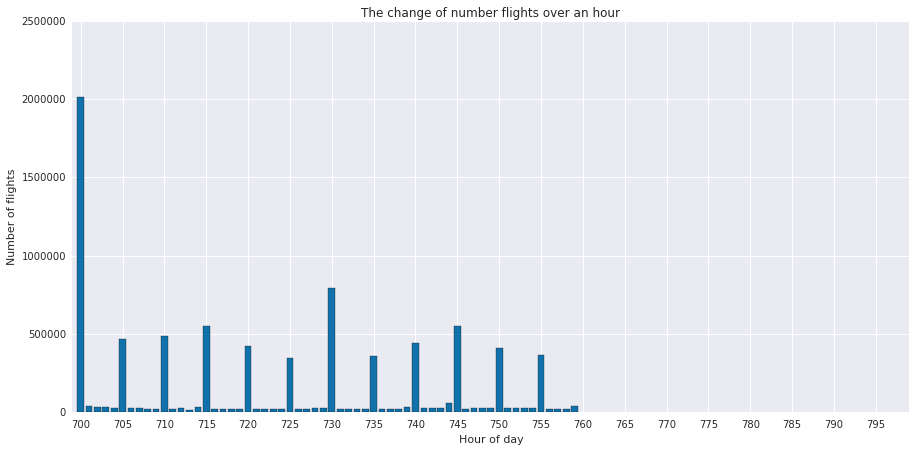

In [134]:
statistic_hour_of_day = df.groupby('scheduled_departure_time').count().collect()
#statistic_hour_of_day.show()
pdf = pd.DataFrame(data=statistic_hour_of_day)

# plot bar chart
plt.figure(figsize = (15,7))
plt.xlabel("Hour of day")
plt.ylabel("Number of flights")
plt.title('The change of number flights over an hour')
plt.xlim([699,799])
plt.xticks(range(700,800,5))
plt.bar(pdf[0],pdf[1],align='center', color='#1172ab')

plt.show()

<div class="alert alert-success">
 Here we look more in detail at the departures from 07:00 to 08:00. As expected, the majority of the flights departs at 7:00 and 7:30. More in general, flights departs at multiples of 5 minutes : 07:00, 07:05, 07:10 and so on. The no departure zone that goes from 07:60 to 08:00 is due to the decimal representation of the departure times. In order to treat the time in a better way, we treat it as decimal, but it is actually in base 60, as we well know.
</div>

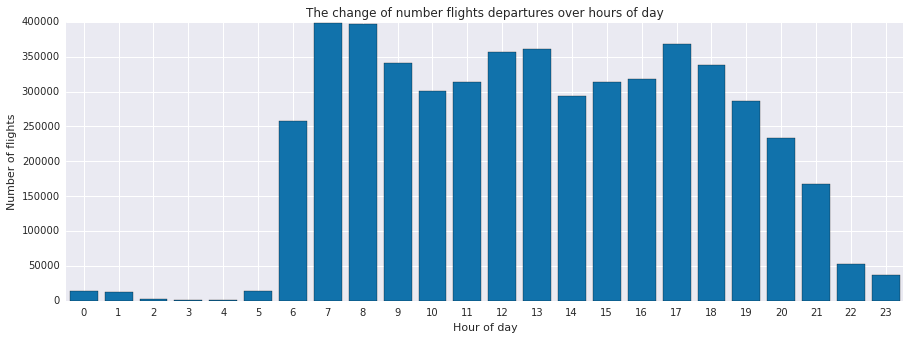

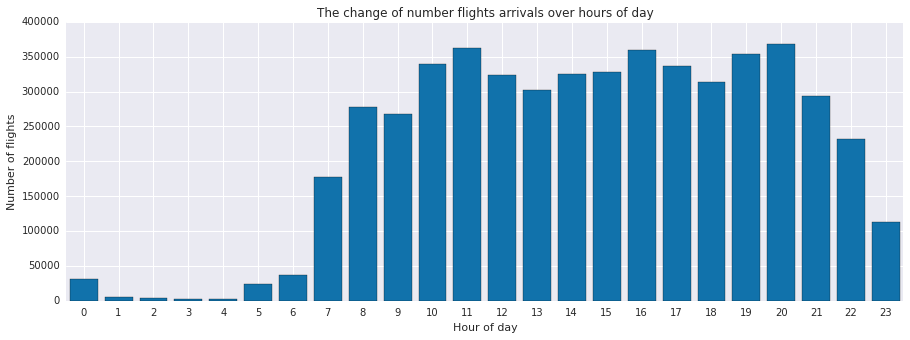

In [34]:
def get_time(x):
    return (int(x[0]/100),)

#print(df.select('scheduled_departure_time').rdd.take(2))
statistic_hour_of_day_dep = (
df
.select('scheduled_departure_time')
.rdd
.map(get_time)
.toDF(['hour'])
.groupBy('hour')
.count()
.cache()
.collect()
)

statistic_hour_of_day_arr = (
df
.select('scheduled_arrival_time')
.rdd
.map(get_time)
.toDF(['hour'])
.groupBy('hour')
.count()
.cache()
.collect()
)


#statistic_hour_of_day.show()
pdf_dep = pd.DataFrame(data=statistic_hour_of_day_dep)

#statistic_hour_of_day.show()
pdf_arr = pd.DataFrame(data=statistic_hour_of_day_arr)

# plot bar chart
plt.figure(figsize = (15,5))
plt.xlabel("Hour of day")
plt.ylabel("Number of flights")
plt.title('The change of number flights departures over hours of day')
plt.xlim([-0.5,23.5])
plt.xticks(range(0,24))
plt.bar(pdf_dep[0],pdf_dep[1],align='center', color='#1172ab')
plt.show()


# plot bar chart
plt.figure(figsize = (15,5))
plt.xlabel("Hour of day")
plt.ylabel("Number of flights")
plt.title('The change of number flights arrivals over hours of day')
plt.xlim([-0.5,23.5])
plt.xticks(range(0,24))
plt.bar(pdf_arr[0],pdf_arr[1],align='center', color='#1172ab')

plt.show()


<div class="alert alert-success">
Now that we grouped our departures by hour, we can confirm what we saw before.

During the night there are few departures, than at 6 flights start departing and at 7 and 8 we have our daily peak. Other peaks are at 12-13 and later at 17. As we have seen before, the majority of who takes a flight are people that work. Thus we can look at some patterns.

When we look at the arrivals graph, we can see that it looks like the departure graph, but it is shifted of one-two hour later. This makes sense because at a peak of departures should correspond a peak of arrivals.
</div>

In [44]:
from builtins import round as round_
avg_time = float(df.select('scheduled_elapsed_time').agg({"scheduled_elapsed_time": "avg"}).collect()[0][0])
dep_hour = round_(avg_time//100)
dep_min = round_(avg_time%100)
print("the average scheduled flight time is %d hour and %d minutes" %(dep_hour,dep_min))

the average scheduled flight time is 1 hour and 15 minutes


So we can conclude that the majority of flights are not so long in terms of time. This is also because we are only considering United States flights so the distances are not so big.

In [45]:
avg_distance = float(df.select('distance').agg({"distance": "avg"}).collect()[0][0])
print("the average distance is %d miles" %(int(avg_distance) ))

the average distance is 670 miles


As expected,the average distance is not so big, considering that we are talking about flights.

<div class="alert alert-success">
We would like to know how much the flights takes in their travel and then extract a pattern, if it exists.

In order to do this, we plotted all the flights:

On the left, there are the hour intervals of the scheduled departures. So for example 06 contains all the flights that departed from 06:00 to 07:00

On the right, there are the hour intervals of the scheduled arrivals. So for example 06 contains all the flights that arrived at destination from 06:00 to 07:00

Looking at the lines, it is possible to distinguish different flows. For example we not that many flights that depart at 07 arrives at 08
</div>


![](flights.png)

<div class="alert alert-success">
As expected, we can see different patterns: 
Flights usually take 1 or 2 hours to arrive at destination, this pattern is visible in all hours of the day. We can also see that night flights usually take more hours to arrive at destination.

Then, there are flights that arrive before their scheduled departure. This is because of time zones, in fact the time is always local.

As seen before, most of the flight departures are concentrated in the morning and around 6 PM

</div>

/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


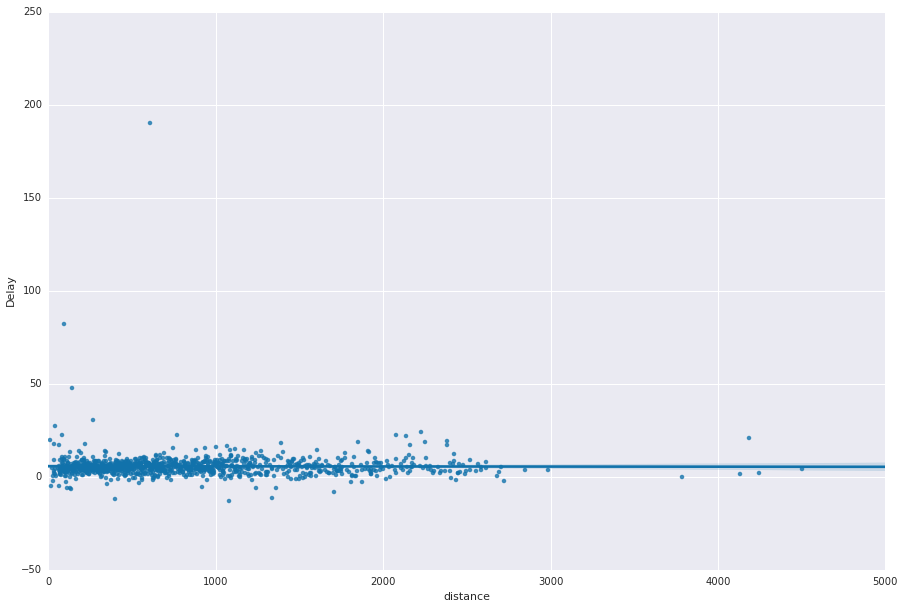

In [14]:
statistic_distance_delay = (
df
.select('distance','arrival_delay').groupBy('distance').avg('arrival_delay')
)

#print(statistic_distance_delay.toPandas())

plt.figure(figsize=(15,10))
ax = sns.regplot(x="distance", y="avg(arrival_delay)", data=statistic_distance_delay.toPandas(),color='#1172ab')
ax.set_xlim([0,5000])
ax.set_xlabel('distance')
ax.set_ylabel('Delay')


<div class="alert alert-success">
Now we can state that the delay and the distance are not correlated in any way, they are independent.
</div>


#### Question 4.4
<div class="alert alert-info">
Which are the **top 20** busiest airports: compute this in terms of aggregate inbound and outbound number of flights?
</div>

```python
# consider outbound flights
stat_src = (df
            .groupBy(df.src_airport)
            .agg(func.count('*').alias('count1'))
            )
    
# consider inbound flights
stat_dest = (df
                . ...
                . ...
            )


# full join the statistic of inbound flights and outbound flights
stat_airports = stat_src.join(..., ..., how=...)

# TOP 20 BUSIEST AIRPORTS
stat_airport_traffic = (stat_airports
                            # define the new column `total` 
                            # which has values are equal to the sum of `count1` and `count2`
                            .withColumn('total', stat_airports['count1'] + stat_airports['count2'])
                            # select top airpoint in termns of number of flights
                            .select([...]).orderBy(desc(...))
                        )
stat_airport_traffic.show(20)

```

In [11]:
# consider outbound flights
stat_src = (df
            .groupBy(df.src_airport)
            .agg(func.count('*').alias('count1'))
            )
    
# consider inbound flights
stat_dest = (df
            .groupBy(df.dest_airport)
            .agg(func.count('*').alias('count2'))
            )

# full join the statistic of inbound flights and outbound flights
#we do an outer join in order to include the airports that have only inbound/outbound traffic
#when we add the traffic in this airports, it becomes null, we could do a better job, but at the end this is not so bad
# because we are interested in the top 20, and they are all famous and 'normal' airports. 
stat_airports = stat_src.join(stat_dest, stat_src.src_airport == stat_dest.dest_airport, 'outer')
#stat_airports.show(1000)
# TOP 20 BUSIEST AIRPORTS
stat_airport_traffic = (stat_airports
                            # define the new column `total` 
                            # which has values are equal to the sum of `count1` and `count2`
                            .withColumn('total', stat_airports['count1'] + stat_airports['count2'])
                            # select top airpoint in terms of number of flights
                            .select(['dest_airport','total','count1','count2']).orderBy(desc('total'))
                        )
#stat_airport_traffic.show()

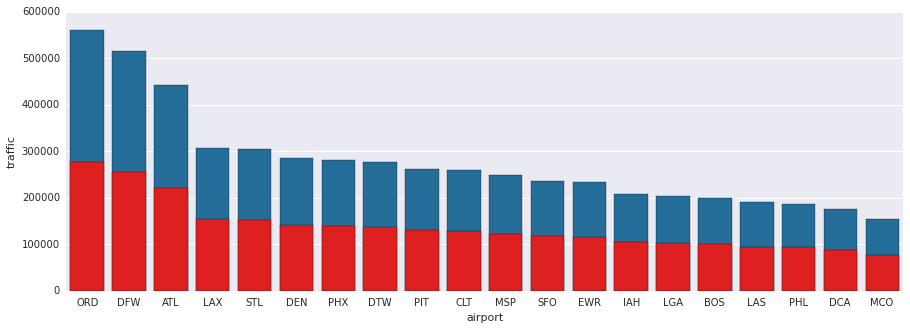

In [13]:

#modify labels
pdf = stat_airport_traffic.limit(20).toPandas()
#print(pdf)

plt.figure(figsize = (15,5))

ax = sns.barplot(x="dest_airport", y="total", data=pdf, color='#1172ab')

pdf = stat_airport_traffic.orderBy('count1',ascending=0).limit(20).toPandas()

ax = sns.barplot(x="dest_airport", y="count1", data=pdf, color='red')

ax.set_xlabel('airport')
ax.set_ylabel('traffic')
plt.show()

<div class="alert alert-success">
We see that the first three airports (Chicago, Dallas, Atlanta) have a traffic which is way higher than the other ones. This may cause delays.
The rank based on the total traffic is the same of those based on inbound and outbound. This makes sense because usually from an airports depart and arrive the same number of flights.
</div>


#### Question 4.5
<div class="alert alert-info">
Which are the **top 20** busiest carriers: compute this in terms of number of flights? 
</div>


```python
stat_carrier = (df
                .groupBy(...)
                .agg(....alias('count'))
                .orderBy(desc('count'))
                )

stat_carrier.show(20)
```

In [30]:
# consider outbound flights
stat_car = (df
            .groupBy('carrier')
            .agg(func.count('*').alias('count'))
            .orderBy('count',ascending=0)
            )

stat_car.show()

+-------+------+
|carrier| count|
+-------+------+
|     DL|874526|
|     US|857906|
|     AA|722277|
|     UA|638750|
|     WN|565426|
|     CO|484834|
|     NW|482798|
|     TW|258205|
|     HP|177851|
|     AS|117475|
+-------+------+



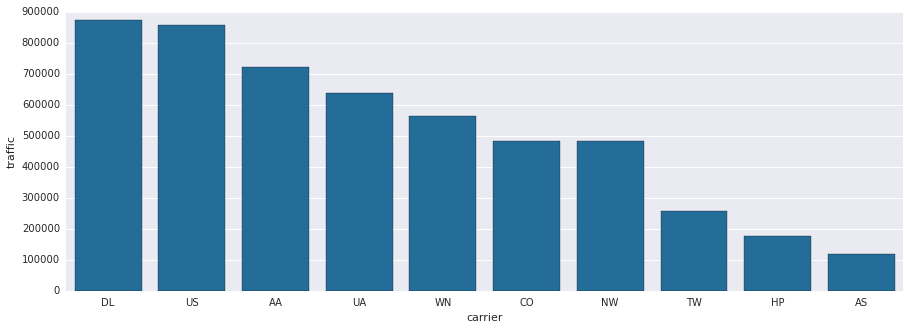

In [51]:
pdf = stat_car.toPandas()
plt.figure(figsize = (15,5))
ax = sns.barplot(x="carrier", y="count", data=pdf, color='#1172ab')
ax.set_ylabel('traffic')
plt.show()

<div class="alert alert-success">
The first two carriers (Delta, US Airways) have almost the same traffic, but generally there is not a big difference with the others. There are also smaller companies such as AS.
</div>


### Question 5 
Statistics on the percentage of delayed flights

#### Question 5.1
<div class="alert alert-info">
What is the percentage of delayed flights for different hours of the day?  

Plot a bar chart and interpret the figure.  


<div class="label label-success">Remember</div> a flight is considered as delayed if it's actual arrival time is more than 15 minutes late than the scheduled arrival time.
</div>

```python
# create new column that marks whether the flights are delay
df_with_delay = df.withColumn('is_delay', when(df[...] >= 15, 1).otherwise(0))

# create a new column that indicates the scheduled departure time in hour 
# (ignore the part of minute)
delay_per_hour = df_with_delay.withColumn('hour', round(df.scheduled_departure_time/100, 0))

# group by year and hour
statistic_delay_hour = delay_per_hour.groupBy(...)

# calculate the delay ratio and create a new column
delay_ratio_per_hour = statistic_delay_hour.agg(
    (func.sum('is_delay')/func.count('*')).alias('delay_ratio')
)

    
# order the result by hour
delay_ratio_per_hour = (
            delay_ratio_per_hour
                .orderBy(...)
                .select([..., ...])
    )

pdf_delay_ratio_per_hour = pd.DataFrame(...)
```

```python
# plot a bar chart

...
...
...
plt.title('Figure 4: The ratio of delay over hours in day')
plt.show()
```

In [52]:
# create new column that marks whether the flights are delay
df_with_delay = df.withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))

# create a new column that indicates the scheduled departure time in hour 
# (ignore the part of minute)
delay_per_hour = df_with_delay.withColumn('hour', round(df.scheduled_departure_time/100, 0)%24)

# group by year and hour
statistic_delay_hour = delay_per_hour.groupBy(['year','hour'])

# calculate the delay ratio and create a new column
delay_ratio_per_hour = statistic_delay_hour.agg(
    (func.sum('is_delay')/func.count('*')).alias('delay_ratio')
)

    
# order the result by hour
delay_ratio_per_hour = (
    delay_ratio_per_hour
    .orderBy('hour')
    .select(['hour', 'delay_ratio'])
)

pdf_delay_ratio_per_hour = pd.DataFrame(data=delay_ratio_per_hour.collect())

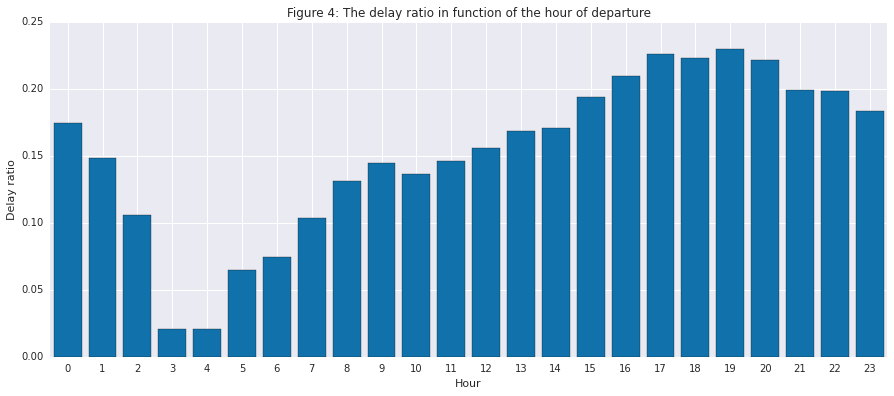

In [53]:
# plot a bar chart
plt.figure(figsize=(15,6))    
plt.xlabel("Hour")
plt.ylabel("Delay ratio")
plt.title('Figure 4: The delay ratio in function of the hour of departure')
plt.grid(True,which="both",ls="-")
plt.xticks(pdf_delay_ratio_per_hour[0])
plt.xlim([-0.5,23.5])
plt.bar(pdf_delay_ratio_per_hour[0],pdf_delay_ratio_per_hour[1],align='center',color='#1172ab')
plt.show()

<div class="alert alert-success">
 Here we can see that after 3-4, where we have the minimum delay ratio, it increases until 19-20, and then it starts decreasing again for the night.
</div>


In [18]:
# create new column that marks whether the flights are delay
df_with_delay = df.withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))

# create a new column that indicates the scheduled departure time in hour 
# (ignore the part of minute)
delay_per_hour = df_with_delay.withColumn('hour', round(df.scheduled_arrival_time/100, 0)%24)

# group by year and hour
statistic_delay_hour = delay_per_hour.groupBy(['year','hour'])

# calculate the delay ratio and create a new column
delay_ratio_per_hour = statistic_delay_hour.agg(
    (func.sum('is_delay')/func.count('*')).alias('delay_ratio')
)

    
# order the result by hour
delay_ratio_per_hour = (
    delay_ratio_per_hour
    .orderBy('hour')
    .select(['hour', 'delay_ratio'])
)

pdf_delay_ratio_per_hour = pd.DataFrame(data=delay_ratio_per_hour.collect())

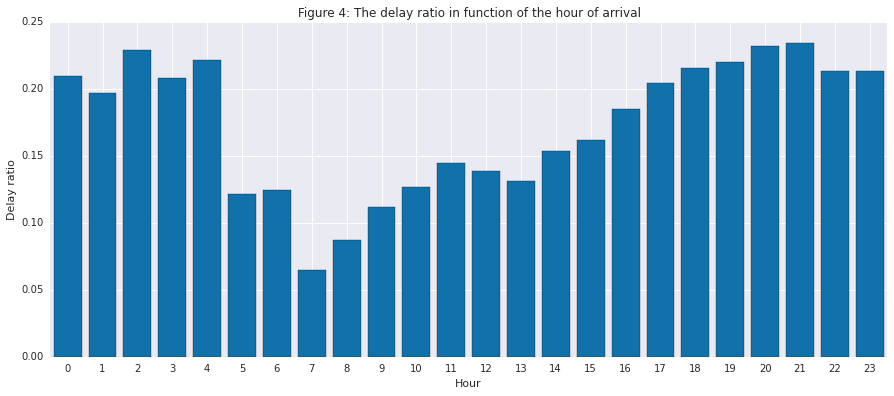

In [19]:
# plot a bar chart
plt.figure(figsize=(15,6))    
plt.xlabel("Hour")
plt.ylabel("Delay ratio")
plt.title('Figure 4: The delay ratio in function of the hour of arrival')
plt.grid(True,which="both",ls="-")
plt.xticks(pdf_delay_ratio_per_hour[0])
plt.xlim([-0.5,23.5])
plt.bar(pdf_delay_ratio_per_hour[0],pdf_delay_ratio_per_hour[1],align='center',color='#1172ab')
plt.show()

<div class="alert alert-success">
Here we see a different picture, in fact we see that all the flights that arrives during the night are lateIn particular, the delay is up the 20% from 18:00 until 5:00. 
</div>




#### Question 5.2
<div class="alert alert-info">
You will realize that saying *"at 4 A.M. there is a very low chance of a flight being delayed"* is not giving you a full picture of the situation. Indeed, it might be true that there is very little probability for an early flight to be delayed, but if it does, the delay might be huge, like 6 hours!  

<ul></ul>

Then, the question is: **which hours of the day are characterized by the largest delay?**  

Plot a Bar chart and explain it.  

</div>

```python
mean_delay_per_hour = statistic_delay_hour.agg(
    (func.mean(...)).alias('mean_delay')
)
    
mean_delay_per_hour = (
    mean_delay_per_hour
        .orderBy(...)
        .select([...,...])
    )
    
pdf_mean_delay_per_hour = pd.DataFrame(...)

...
...
...
plt.title('Figure 5: The delay over hours in day')
plt.show()


```

In [56]:
# create new column that marks whether the flights are delay
df_with_delay = df.withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))

# create a new column that indicates the scheduled departure time in hour 
# (ignore the part of minute)
delay_per_hour = df_with_delay.withColumn('hour', round(df.scheduled_departure_time/100, 0)%24)

# group by year and hour
statistic_delay_hour = delay_per_hour.groupBy(['year','hour'])

# calculate the delay ratio and create a new column
mean_delay_per_hour = statistic_delay_hour.agg(
    (func.mean('arrival_delay')).alias('mean_delay')
)

    
# order the result by hour
mean_delay_per_hour = (
    mean_delay_per_hour
    .orderBy('hour')
    .select(['hour', 'mean_delay'])
)

pdf_mean_delay_per_hour = pd.DataFrame(data=mean_delay_per_hour.collect())

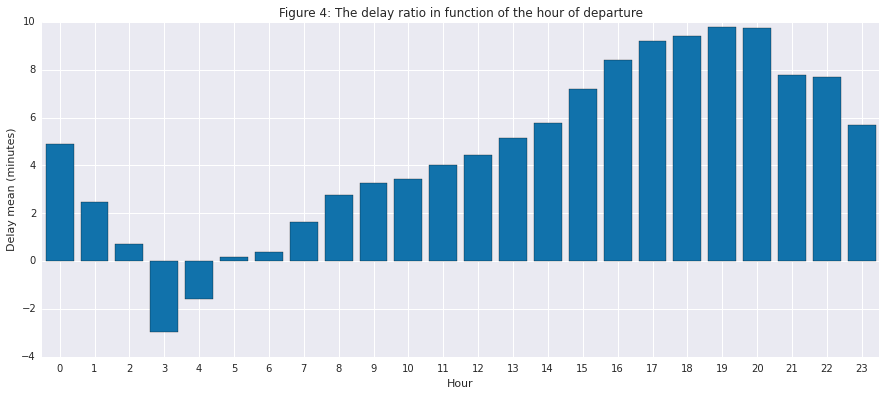

In [57]:
# plot a bar chart
plt.figure(figsize=(15,6))    
plt.xlabel("Hour")
plt.ylabel("Delay mean (minutes)")
plt.title('Figure 4: The delay ratio in function of the hour of departure')
plt.grid(True,which="both",ls="-")
plt.xticks(pdf_mean_delay_per_hour[0])
plt.xlim([-0.5,23.5])
plt.bar(pdf_mean_delay_per_hour[0],pdf_mean_delay_per_hour[1],align='center',color='#1172ab')
plt.show()

<div class="alert alert-success">
The flight delays follow the same patterns of the delay ratio: it increases from 3 to 8 and decreases from 20 to 3. The interesting thing is that when there are many delayed flights, then the mean delay is way higher, while there are few delays, usually the delay time is lower. There are also negative delays, this means that generally the flights arrive before the scheduled arrival. On average, the mean delay is always lower than 10 minutes. This is actually not true because there are flights with negative delay that decreases the mean.
</div>




In [58]:
# create new column that marks whether the flights are delay
df_with_delay = df.withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))

# create a new column that indicates the scheduled departure time in hour 
# (ignore the part of minute)
delay_per_hour = df_with_delay.withColumn('hour', round(df.scheduled_arrival_time/100, 0))

# group by year and hour
statistic_delay_hour = delay_per_hour.groupBy(['year','hour'])

# calculate the delay ratio and create a new column
mean_delay_per_hour = statistic_delay_hour.agg(
    (func.mean('arrival_delay')).alias('mean_delay')
)

    
# order the result by hour
mean_delay_per_hour = (
    mean_delay_per_hour
    .orderBy('hour')
    .select(['hour', 'mean_delay'])
)

pdf_mean_delay_per_hour = pd.DataFrame(data=mean_delay_per_hour.collect())

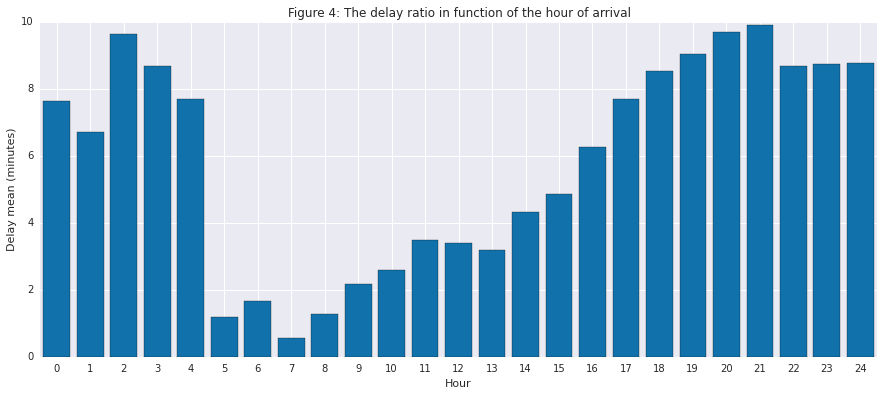

In [59]:
# plot a bar chart
plt.figure(figsize=(15,6))    
plt.xlabel("Hour")
plt.ylabel("Delay mean (minutes)")
plt.title('Figure 4: The delay ratio in function of the hour of arrival')
plt.grid(True,which="both",ls="-")
plt.xticks(pdf_mean_delay_per_hour[0])
plt.xlim([-0.5,24.5])
plt.bar(pdf_mean_delay_per_hour[0],pdf_mean_delay_per_hour[1],align='center',color='#1172ab')
plt.show()

<div class="alert alert-success">
The flight delays follow the same patterns of the delay ratio considering both the departure and the arrival time: it increases from 5-7 to 17 and then it remains high until 4 of the day after. Generally, we can say that flights that arrive during the night arrive with a bigger delay.
</div>

We think that can be interesting to look at the mean delay of the flights that are actually marked as on delay.

In [60]:
# create new column that marks whether the flights are delay
df_with_delay = df.withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))
df_with_delay = df_with_delay.filter(df_with_delay.is_delay == 1)
# create a new column that indicates the scheduled departure time in hour 
# (ignore the part of minute)
delay_per_hour = df_with_delay.withColumn('hour', round(df.scheduled_departure_time/100, 0))

# group by year and hour
statistic_delay_hour = delay_per_hour.groupBy(['year','hour'])

# calculate the delay ratio and create a new column
mean_delay_per_hour = statistic_delay_hour.agg(
    (func.mean('arrival_delay')).alias('mean_delay')
)

    
# order the result by hour
mean_delay_per_hour = (
    mean_delay_per_hour
    .orderBy('hour')
    .select(['hour', 'mean_delay'])
)

pdf_mean_delay_per_hour = pd.DataFrame(data=mean_delay_per_hour.collect())

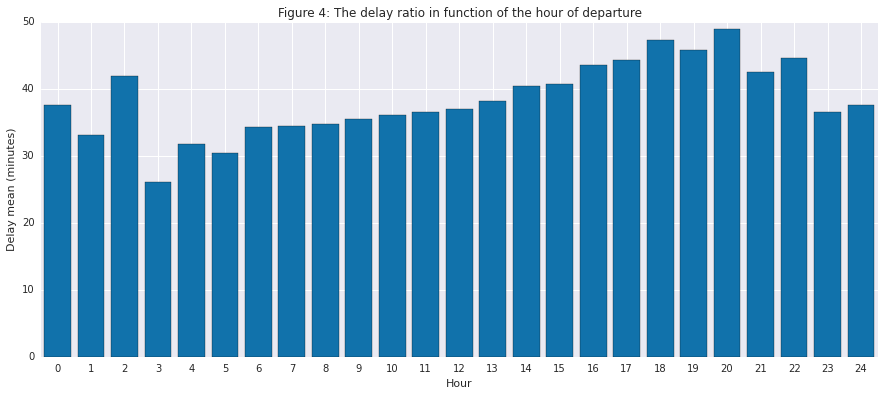

In [61]:
# plot a bar chart
plt.figure(figsize=(15,6))    
plt.xlabel("Hour")
plt.ylabel("Delay mean (minutes)")
plt.title('Figure 4: The delay ratio in function of the hour of departure')
plt.grid(True,which="both",ls="-")
plt.xticks(pdf_mean_delay_per_hour[0])
plt.xlim([-0.5,24.5])
plt.bar(pdf_mean_delay_per_hour[0],pdf_mean_delay_per_hour[1],align='center',color='#1172ab')
plt.show()

<div class="alert alert-success">
When we look only at the delayed flights, we see that the mean delay is way higher than 15 minutes, which is the minimum delay of a flight marked as delayed. The delays are more or less stable, but we still observe the pattern of an increasing delay towards 20.
</div>



In [62]:
# create new column that marks whether the flights are delay
df_with_delay = df.withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))
df_with_delay = df_with_delay.filter(df_with_delay.is_delay == 1)
# create a new column that indicates the scheduled departure time in hour 
# (ignore the part of minute)
delay_per_hour = df_with_delay.withColumn('hour', round(df.scheduled_arrival_time/100, 0))

# group by year and hour
statistic_delay_hour = delay_per_hour.groupBy(['year','hour'])

# calculate the delay ratio and create a new column
mean_delay_per_hour = statistic_delay_hour.agg(
    (func.mean('arrival_delay')).alias('mean_delay')
)

    
# order the result by hour
mean_delay_per_hour = (
    mean_delay_per_hour
    .orderBy('hour')
    .select(['hour', 'mean_delay'])
)

pdf_mean_delay_per_hour = pd.DataFrame(data=mean_delay_per_hour.collect())

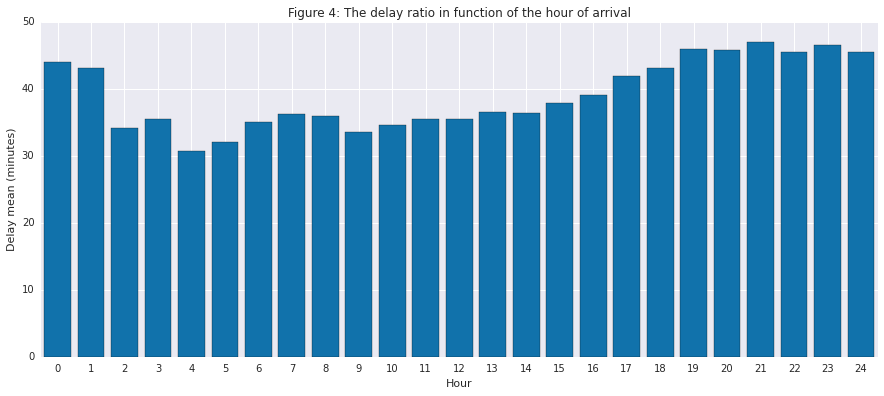

In [63]:
# plot a bar chart
plt.figure(figsize=(15,6))    
plt.xlabel("Hour")
plt.ylabel("Delay mean (minutes)")
plt.title('Figure 4: The delay ratio in function of the hour of arrival')
plt.grid(True,which="both",ls="-")
plt.xticks(pdf_mean_delay_per_hour[0])
plt.xlim([-0.5,24.5])
plt.bar(pdf_mean_delay_per_hour[0],pdf_mean_delay_per_hour[1],align='center',color='#1172ab')
plt.show()

<div class="alert alert-success">
When we look at the delay in function of the arrival hour, the pattern is similar to what we have seen for the departure hour
</div>





In [64]:
# create new column that marks whether the flights are delay
df_with_delay = df.withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))
df_with_delay = df_with_delay.filter(df_with_delay.arrival_delay > 0)
# create a new column that indicates the scheduled departure time in hour 
# (ignore the part of minute)
delay_per_hour = df_with_delay.withColumn('hour', round(df.scheduled_departure_time/100, 0))

# group by year and hour
statistic_delay_hour = delay_per_hour.groupBy(['year','hour'])

# calculate the delay ratio and create a new column
mean_delay_per_hour = statistic_delay_hour.agg(
    (func.mean('arrival_delay')).alias('mean_delay')
)

    
# order the result by hour
mean_delay_per_hour = (
    mean_delay_per_hour
    .orderBy('hour')
    .select(['hour', 'mean_delay'])
)

pdf_mean_delay_per_hour = pd.DataFrame(data=mean_delay_per_hour.collect())

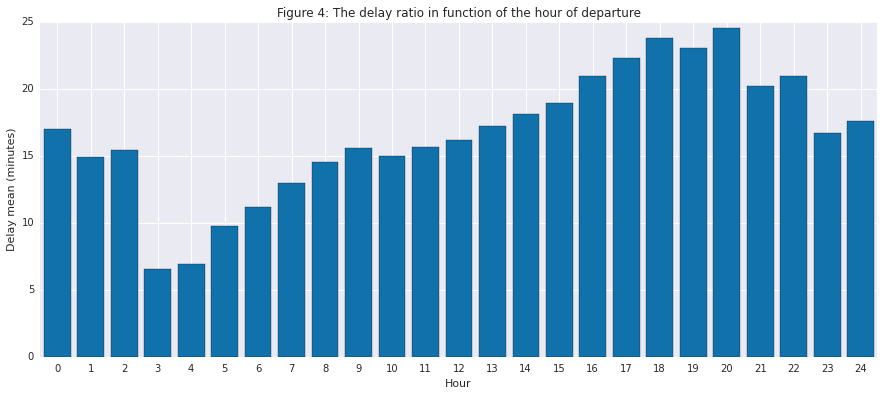

In [65]:
# plot a bar chart
plt.figure(figsize=(15,6))    
plt.xlabel("Hour")
plt.ylabel("Delay mean (minutes)")
plt.title('Figure 4: The delay ratio in function of the hour of departure')
plt.grid(True,which="both",ls="-")
plt.xticks(pdf_mean_delay_per_hour[0])
plt.xlim([-0.5,24.5])
plt.bar(pdf_mean_delay_per_hour[0],pdf_mean_delay_per_hour[1],align='center',color='#1172ab')
plt.show()

<div class="alert alert-success">
When we consider all the flights with delay > 0, we see that the pattern is different. We still have the delays that increases from the morning moving to the evening, but the delay time is much different: if at 3 we have a mean delay of 5 minutes, at 20 we have 25 minutes of delay, on average.</div>

With data of year 1994, the flight from 3AM to 4AM often depart earlier than in their schedule. The flights in the morning have less delay then in the afternoon and evening.

So, an attentive student should notice here that we have somehow a problem with the definition of delay! Next, we will improve how to represent and visualize data to overcome this problem.

In [21]:
# create new column that marks whether the flights are delay
df_with_delay = df.withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))

# create a new column that indicates the scheduled departure time in hour 
# (ignore the part of minute)
delay_per_hour = df_with_delay.withColumn('hour', round(df.scheduled_departure_time/100, 0)%24)

# group by year and hour
statistic_delay_hour = delay_per_hour.groupBy(['year','hour'])

# calculate the delay ratio and create a new column
mean_delay_per_hour = statistic_delay_hour.agg(
    (func.mean('arrival_delay')).alias('mean_delay')
)
#mean_delay_per_hour.select('hour').distinct().show(30)
    
# order the result by hour
mean_delay_per_hour = (
    mean_delay_per_hour
    .orderBy('hour')
    .select(['hour', 'mean_delay'])
)

pdf_mean_delay_per_hour = pd.DataFrame(data=mean_delay_per_hour.collect())

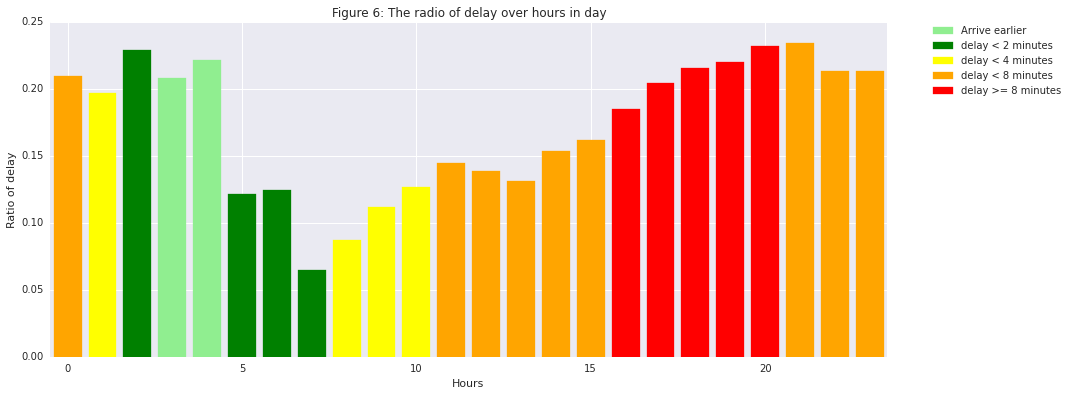

In [23]:
#pdf2 = pd.DataFrame(data=mean_delay_per_hour.collect())
plt.figure(figsize=(15,6))    
plt.xlabel("Hours")
plt.ylabel("Ratio of delay")
plt.title('Figure 6: The radio of delay over hours in day')
plt.grid(True,which="both",ls="-")
bars = plt.bar(pdf_delay_ratio_per_hour[0], pdf_delay_ratio_per_hour[1], align='center', edgecolor = "black",color='#1172ab')
plt.xlim([-0.5,24.5])
for i in range(0, len(bars)):
    color = 'red'
    if pdf_mean_delay_per_hour[1][i] < 0:
        color = 'lightgreen'
    elif pdf_mean_delay_per_hour[1][i] < 2:
        color = 'green'
    elif pdf_mean_delay_per_hour[1][i] < 4:
        color = 'yellow'
    elif pdf_mean_delay_per_hour[1][i] < 8:
        color = 'orange'

    bars[i].set_color(color)
        
patch1 = mpatches.Patch(color='lightgreen', label='Arrive earlier')
patch2 = mpatches.Patch(color='green', label='delay < 2 minutes')
patch3 = mpatches.Patch(color='yellow', label='delay < 4 minutes')
patch4 = mpatches.Patch(color='orange', label='delay < 8 minutes')
patch5 = mpatches.Patch(color='red', label='delay >= 8 minutes')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([-0.5,23.5])
plt.show()

<div class="alert alert-success">
In the new figure we have more information in a single plot. The flights that depart in 3AM to 4AM have very low probability of being delayed. In contrast, the flights in the 4PM to 8PM range have higher chances of being delayed: in more than 50% of the cases, the delay is 8 minutes or more.
During the day (from 6AM to 8PM) we note a singular pattern: in the hours where there are many delays, the delay time is actually higher.
This is not true during the night, where we see many delayed flights with a very little delay
</div>




In [70]:
# create new column that marks whether the flights are delay
df_with_delay = df.withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))

# create a new column that indicates the scheduled departure time in hour 
# (ignore the part of minute)
delay_per_hour = df_with_delay.withColumn('hour', round(df.scheduled_arrival_time/100, 0))

# group by year and hour
statistic_delay_hour = delay_per_hour.groupBy(['year','hour'])

# calculate the delay ratio and create a new column
mean_delay_per_hour = statistic_delay_hour.agg(
    (func.mean('arrival_delay')).alias('mean_delay')
)

    
# order the result by hour
mean_delay_per_hour = (
    mean_delay_per_hour
    .orderBy('hour')
    .select(['hour', 'mean_delay'])
)

pdf_mean_delay_per_hour = pd.DataFrame(data=mean_delay_per_hour.collect())

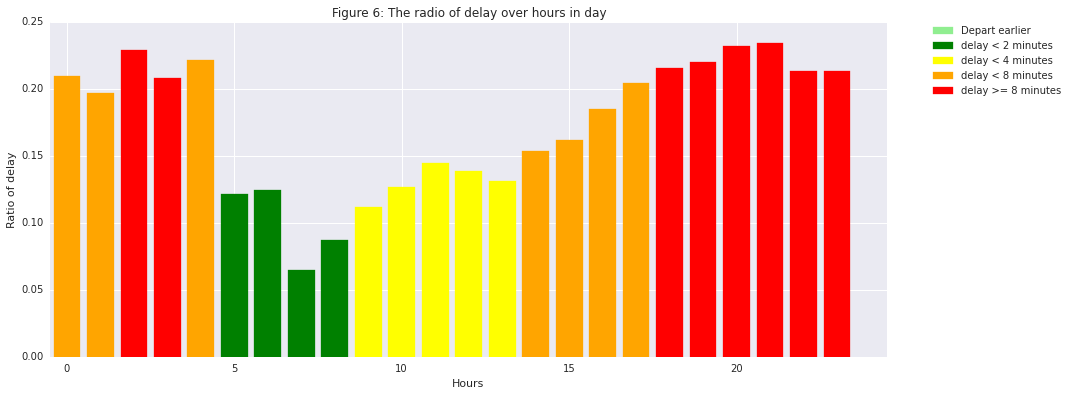

In [71]:
#pdf2 = pd.DataFrame(data=mean_delay_per_hour.collect())
plt.figure(figsize=(15,6))    
plt.xlabel("Hours")
plt.ylabel("Ratio of delay")
plt.title('Figure 6: The radio of delay over hours in day')
plt.grid(True,which="both",ls="-")
bars = plt.bar(pdf_delay_ratio_per_hour[0], pdf_delay_ratio_per_hour[1], align='center', edgecolor = "black",color='#1172ab')
plt.xlim([-0.5,24.5])

for i in range(0, len(bars)):
    color = 'red'
    if pdf_mean_delay_per_hour[1][i] < 0:
        color = 'lightgreen'
    elif pdf_mean_delay_per_hour[1][i] < 2:
        color = 'green'
    elif pdf_mean_delay_per_hour[1][i] < 4:
        color = 'yellow'
    elif pdf_mean_delay_per_hour[1][i] < 8:
        color = 'orange'

    bars[i].set_color(color)
        
patch1 = mpatches.Patch(color='lightgreen', label='Depart earlier')
patch2 = mpatches.Patch(color='green', label='delay < 2 minutes')
patch3 = mpatches.Patch(color='yellow', label='delay < 4 minutes')
patch4 = mpatches.Patch(color='orange', label='delay < 8 minutes')
patch5 = mpatches.Patch(color='red', label='delay >= 8 minutes')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

<div class="alert alert-success">
When we look at delays respect to the hour of arrival, we note the same pattern as before during the day: more delayed flights, more delay. What changes is the pattern during the night. We see that flights that arrives during the night arrives with an high delay and many of them are delayed.
</div>




This confirms what we saw before: when many flights are delayed, usually the delay is higher, and this happen after 18 until midnight.

#### Question 5.3
<div class="alert alert-info">
Plot a bar chart to show the percentage of delayed flights over days in a month
</div>

```python
####### The changes of delay ratio over days of month ########
# calculate the delay ratio in each day of month
statistic_day_of_month = (
    df_with_delay
        .groupBy(...)
        .agg(...)
        # order by day_of_month
        .orderBy(...)
    )
    
# collect data and plot
pdf_day_of_month = pd. ...
...
...
...
plt.title('Figure 7: The radio of delay over days of month')
plt.show()
```

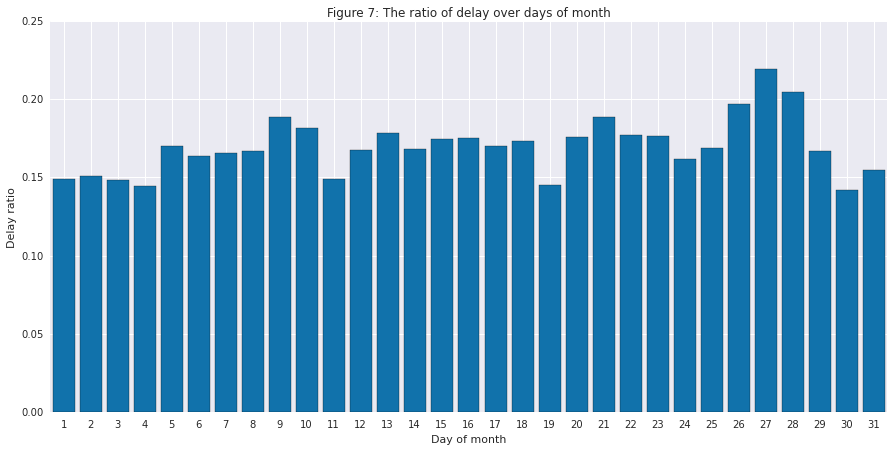

In [72]:
# create new column that marks whether the flights are delay
df_with_delay = df.withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))

statistic_day_of_month = (
    df_with_delay
        .groupBy('day_of_month')
        .agg(func.sum('is_delay')/func.count('*')).alias('delay_ratio')
        # order by day_of_month
        .orderBy('day_of_month')
    ).collect()

# collect data and plot
pdf_day_of_month = pd.DataFrame(data=statistic_day_of_month)
plt.figure(figsize=(15,7))
plt.xlim([0.5,31.5])
plt.xticks(range(1,32))
plt.xlabel('Day of month')
plt.ylabel('Delay ratio')
plt.grid(True,which="both",ls="-")

plt.bar(pdf_day_of_month[0],pdf_day_of_month[1],align='center',color='#1172ab')
plt.title('Figure 7: The ratio of delay over days of month')
plt.show()

<div class="alert alert-success">
The delay ratio is stable over the days of the months .We see a peak on the 27-28. This is probably due to a national holiday or something like that in a specific month. We do not think that there is a pattern that repeats every year that justify the peak on the 27.
</div>

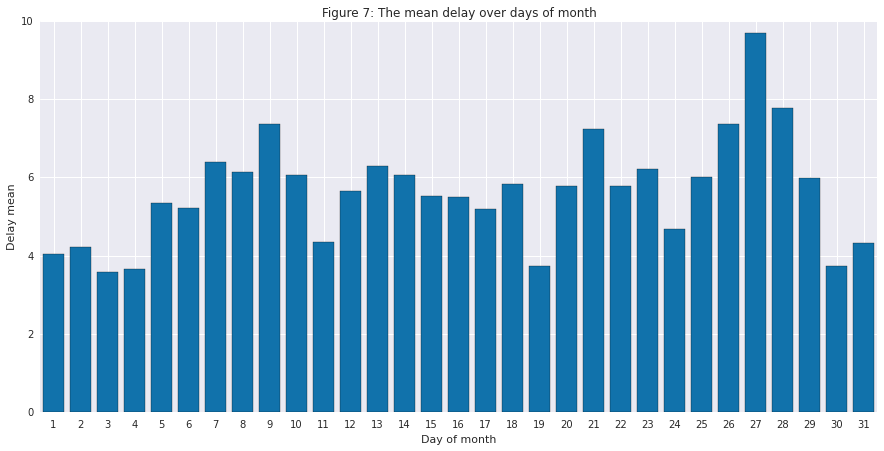

In [24]:
# create new column that marks whether the flights are delay
df_with_delay = df.withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))

statistic_day_of_month = (
    df_with_delay
        .groupBy('day_of_month')
        .agg(func.mean('arrival_delay')).alias('mean_delay')
        # order by day_of_month
        .orderBy('day_of_month')
    ).collect()

# collect data and plot
pdf_day_of_month = pd.DataFrame(data=statistic_day_of_month)
plt.figure(figsize=(15,7))
plt.xlim([0.5,31.5])
plt.xticks(range(1,32))
plt.xlabel('Day of month')
plt.ylabel('Delay mean')
plt.grid(True,which="both",ls="-")

plt.bar(pdf_day_of_month[0],pdf_day_of_month[1],align='center',color='#1172ab')
plt.title('Figure 7: The mean delay over days of month')
plt.show()

<div class="alert alert-success">
When we look at the mean delay, we see a different behaviour. We still have a peak on 27-28, because when there are many delayed flights, then the delay increases too. We still think that this kind of data is biased, because we do not understand why the day of the month influences the delay. We checked that this is not due to the link of number of flights and the day of the month, because flights number is stable over the whole month. Anyway, the delay is lower at the end of the month and at the beginning.
</div>



#### Question 5.4
<div class="alert alert-info">
Plot a bar chart to show the percentage of delayed flights over days in a week
</div>

```python
####### The changes of delay ratio over days of week ########
# calculate the delay ratio in each day of week
statistic_day_of_week = (
    df_with_delay
        ...
        ...
        ...
    )
    
# collect data and plot
pdf_day_of_week = pd. ...
map_int_into_day = { 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat", 7:"Sun" }
day_of_week_label = pdf_day_of_week[0].map(lambda i: map_int_into_day[i])

...
...
...

plt.title('Figure 8: The radio of delay over days of week')
plt.xticks(pdf_day_of_week[0], day_of_week_label)
plt.show()
```

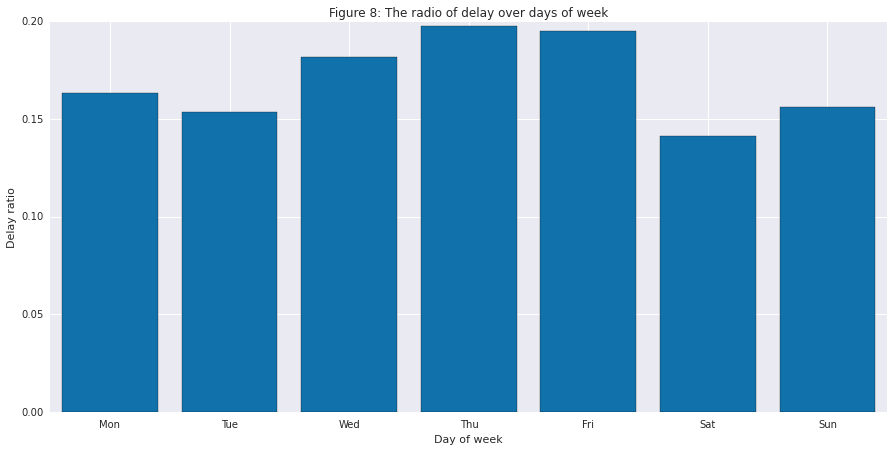

In [74]:
# create new column that marks whether the flights are delay
df_with_delay = df.withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))

statistic_day_of_week = (
    df_with_delay
        .groupBy('day_of_week')
        .agg(func.sum('is_delay')/func.count('*')).alias('delay_ratio')
        .orderBy('day_of_week')
    ).collect()

# collect data and plot
# collect data and plot
pdf_day_of_week = pd.DataFrame(data=statistic_day_of_week)
map_int_into_day = { 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat", 7:"Sun" }
day_of_week_label = pdf_day_of_week[0].map(lambda i: map_int_into_day[i])

plt.figure(figsize=(15,7))
plt.xlim([0.5,7.5])

plt.xlabel('Day of week')
plt.ylabel('Delay ratio')

plt.bar(pdf_day_of_week[0],pdf_day_of_week[1],align='center',color='#1172ab')

plt.title('Figure 8: The radio of delay over days of week')
plt.xticks(pdf_day_of_week[0], day_of_week_label)
plt.show()

<div class="alert alert-success">
The delays are maximum on Thursday and Friday and minimum on Saturday. The mean ratio over the week is 0.20. The results are in line with our result found until now: When there are more flights, the ration of delays is higher. In this case we have seen that during the weekend there are few flights, and thus the delay ratio is lower.
</div>


#### Question 5.5
<div class="alert alert-info">
Plot a bar chart to show the percentage of delayed flights over months in a year
</div>

```python
####### The changes of delay ratio over months ########
# calculate the delay ratio in month
statistic_month = (
    ...
    ...
    ...
    )
    
# collect data and plot
pdf_month = pd. ...

...
...
...

plt.title('Figure 9: The radio of delay over months')
plt.show()
```

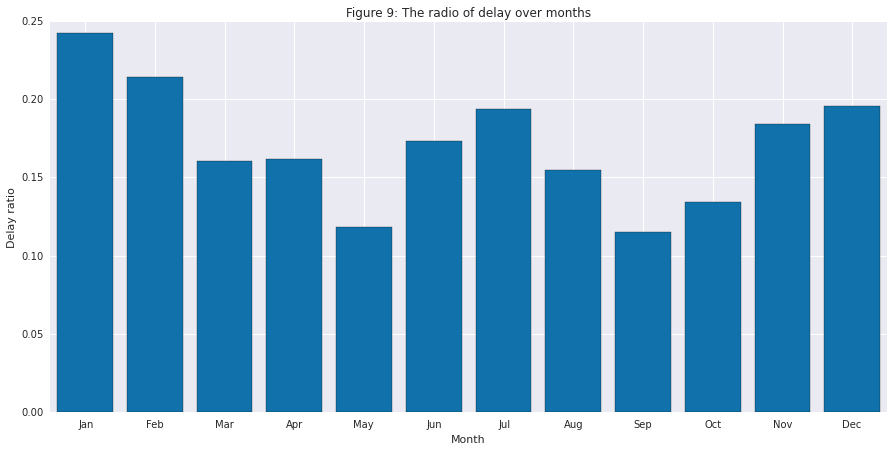

In [75]:
statistic_month = (
    df_with_delay
    .groupby('month')
    .agg(func.sum('is_delay')/func.count('*')).alias('delay_ratio')
    .orderBy('month')
    ).collect()
    
# collect data and plot
pdf_month = pd.DataFrame(data=statistic_month)

map_int_into_month = { 1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec" }
day_of_week_label = pdf_month[0].map(lambda i: map_int_into_month[i])

plt.figure(figsize=(15,7))
plt.xlim([0.5,12.5])
plt.xlabel('Month')
plt.ylabel('Delay ratio')
plt.bar(pdf_month[0],pdf_month[1],align='center',color='#1172ab')
plt.xticks(pdf_month[0],day_of_week_label)
plt.title('Figure 9: The radio of delay over months')
plt.show()

<div class="alert alert-success">
It looks that the delay ratio follows the seasons: in fact it is higher during summer and Winter and lower during Spring and Autumn. We also note that the delay ratio is independent from the number of flights, in fact we have seen that january is the month with the lowest number of flights per day, but it is the month with higher delay ratio. Looking at the 'shared knowledge', we suppose that this is due to weather conditions: Winter in USA can be particularly harsh, with big snow blizzards that can block airports for days, while in the summer there are Hurricanes.
</div>


We are ready now to draw some observations from our data, even if we have only looked at data coming from a year worth of flights:

- The probability for a flight to be delayed is low at the beginning or at the very end of a given months
- Flights on two first weekdays and on the weekend, are less likely to be delayed
- May and September are very good months for travelling, as the probability of delay is low (remember we're working on US data. Do you think this is also true in France?)

Putting things together, we can have a global picture of the whole year!

In [76]:
df_with_delay = df.withColumn('is_delay', when(df["arrival_delay"] >= 15, 1).otherwise(0))
statistic_day = (
    df_with_delay
    .groupBy(['year','month', 'day_of_month', 'day_of_week'])
    .agg((func.sum('is_delay')/func.count('*')).alias('delay_ratio'))
)
# assume that we do statistic on year 1994
statistic_day = statistic_day\
    .orderBy('year', 'month', 'day_of_month', 'day_of_week')
pdf = pd.DataFrame(data=statistic_day.collect())

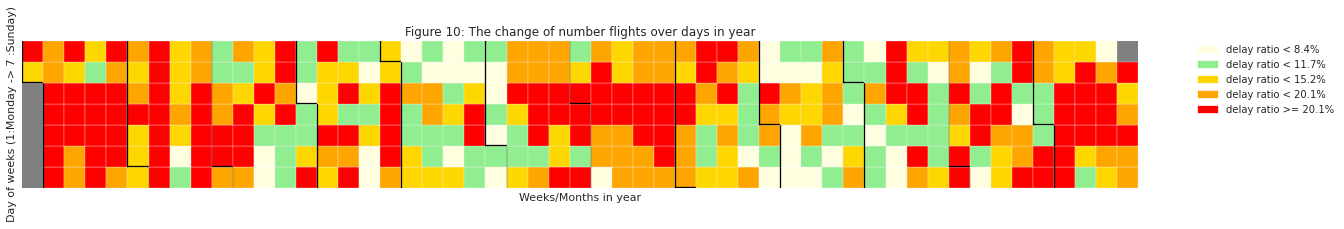

In [77]:
fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)     
plt.xlabel("Weeks/Months in year")
plt.ylabel("Day of weeks (1:Monday -> 7 :Sunday)")
plt.title('Figure 10: The change of number flights over days in year')
  
rec_size = 0.3
from matplotlib.patches import Rectangle
import datetime
num_days = len(pdf[0])
ax.patch.set_facecolor('gray')
ax.set_aspect('equal', 'box')
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())

for i in range(0, num_days):
    # extract information from the result
    year = pdf[0][i]
    month = pdf[1][i]
    day_of_month = pdf[2][i]
    day_of_week = pdf[3][i]
    day_of_year= datetime.date(year=year, month=month, day=day_of_month).timetuple()
    week_of_year = datetime.date(year=year, month=month, day=day_of_month).isocalendar()[1]
    
    # dealing with the week of the previous year
    if week_of_year == 52 and month == 1:
        week_of_year = 0
        
    # the coordinate of a day in graph
    X = week_of_year*rec_size
    Y = day_of_week*rec_size
    
    # use different colors to show the delay ratio
    color = 'white'
    if pdf[4][i] <= 0.084:
        color = 'lightyellow'
    elif pdf[4][i] <= 0.117:
        color = 'lightgreen'
    elif pdf[4][i] <= 0.152:
        color = 'gold'
    elif pdf[4][i] <= 0.201:
        color = 'orange'
    else:
        color = 'red'
    rect = plt.Rectangle((X - rec_size/2.0, Y - rec_size/2.0), rec_size, rec_size,
                      alpha=1, facecolor=color, edgecolor='whitesmoke')

    ax.add_patch(rect)
    
    # drawing boders to separate months
    if day_of_month <= 7:
        rect2 = plt.Rectangle((X -rec_size/2.0, Y - rec_size/2.0), 0.01, rec_size,
                      alpha=1, facecolor='black')
        ax.add_patch(rect2)
    if day_of_month == 1:
        rect2 = plt.Rectangle((X - rec_size/2.0, Y - rec_size/2.0), rec_size, 0.01,
                      alpha=1, facecolor='black')
        ax.add_patch(rect2)
ax.autoscale_view()

patch1 = mpatches.Patch(color='lightyellow', label='delay ratio < 8.4%')
patch2 = mpatches.Patch(color='lightgreen', label='delay ratio < 11.7%')
patch3 = mpatches.Patch(color='gold', label='delay ratio < 15.2%')
patch4 = mpatches.Patch(color='orange', label='delay ratio < 20.1%')
patch5 = mpatches.Patch(color='red', label='delay ratio >= 20.1%')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

#### Question 5.6
<div class="alert alert-info">
Explain figure 10.
</div>

<div class="alert alert-success">
The figure is a summary of what we have seen so far. Looking at the chart floowing the days of the week, we have a confirmation of what we have seen before: saturday is the best day to travel, and everyone should avoid Thursday and Friday.

When we look at the month, we see the seasonal pattern that we saw before: December-January and June-July are the worst month to travel, we think because of weather conditions. We should also note that in June and July the USA hosted the World Football Cup.

We said that Saturday is the best day to travel, this is also true during vary bad months like January. Probably the fact that there are less flights helps to decrease the delays.

When we look at february, we see that there is a whole red week. Since this looks strange, we tried to discover the reason, and we found a report about a snowstorm and subsequent delays.
http://www.nytimes.com/1994/02/09/nyregion/bad-winter-s-worst-snowstorm-disrupts-travel-in-the-northeast.html
</div>


#### Question 5.7
<div class="alert alert-info">

What is the delay probability for the top 20 busiest airports?  


By drawing the flight volume of each airport and the associated delay probability in a single plot, we can observe the relationship between airports, number of flights and the delay.  

<div class="label label-success">HINT </div>  Function `<df_colum>.isin(<list>)` helps checking whether a value in column belongs to a list.
</div>

```python
####### The delay ratio of the top 20 busiest airports ########
K = 20

# extract top_20_airports from stat_airport_traffic
top_20_airports = [item[0] for item in stat_airport_traffic.take(K)]

# select the statistic of source airports
statistic_ratio_delay_airport = (
    df_with_delay
        # select only flights that depart from one of top 20 ariports
        .filter(df_with_delay....)
        # group by source airport
        .groupBy(...)
        #  calculate the delay ratio
        ...
        # sort by name of airport
        .orderBy(['src_airport'])
    )
#statistic_ratio_delay_airport.show(20)
```

In [25]:
#stat_airport_traffic.limit(20).orderBy('dest_airport').show()

In [27]:
K = 20
stat_airport_traffic = stat_airport_traffic.select(['dest_airport','total']).limit(K).orderBy('dest_airport')

In [28]:

# extract top_20_airports from stat_airport_traffic
top_20_airports = [item[0] for item in stat_airport_traffic.take(K)]

# select the statistic of source airports
statistic_ratio_delay_airport = (
    df_with_delay
        # select only flights that depart from one of top 20 ariports
        .filter(df_with_delay.src_airport.isin(top_20_airports))
        # group by source airport
        .groupBy('src_airport')
        #  calculate the delay ratio
        .agg((func.sum('is_delay')/func.count('*')).alias('delay_ratio'))
        # sort by name of airport -> why?
        .orderBy('src_airport')
    )
#statistic_ratio_delay_airport.show()
#statistic_ratio_delay_airport.collect()

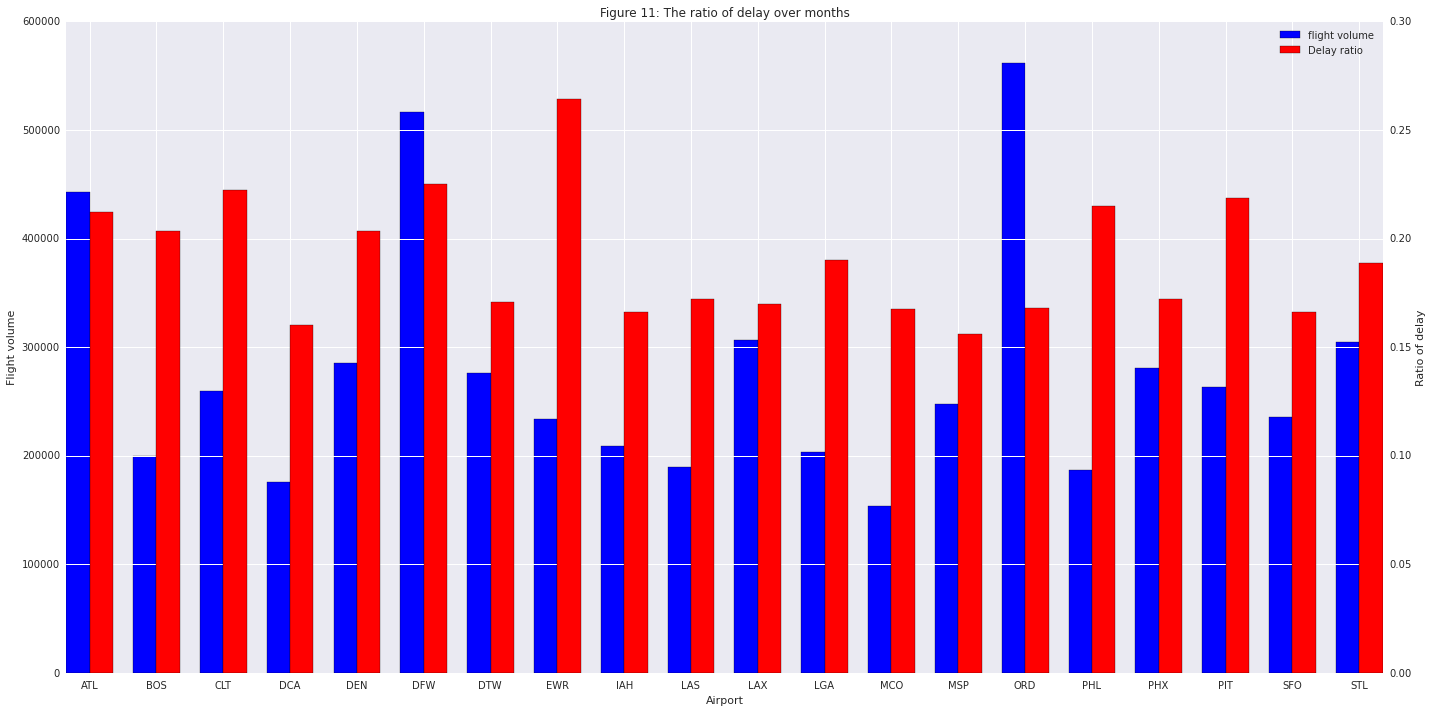

In [81]:
# collect data and plot
pdf_ratio_delay_airport = pd.DataFrame(data=statistic_ratio_delay_airport.collect())
pdf_top_20_airport_volume = pd.DataFrame(data=stat_airport_traffic.take(K), columns=['dest_airport', 'total'])
pdf_top_20_airport_volume = pdf_top_20_airport_volume.sort_values(by='dest_airport')
#print(pdf_top_20_airport_volume)
index = np.arange(len(top_20_airports))
bar_width = 0.35
opacity = 0.4


fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)

ax2 = ax.twinx()
plt.axis('normal')
ax.set_xlabel("Airport")
ax.set_ylabel("Flight volume")
ax2.set_ylabel("Ratio of delay")
plt.xticks(index + bar_width, top_20_airports)
plt.title('Figure 11: The ratio of delay over months')
plt.grid(True,which="both",ls="-")
bar = ax.bar(index, pdf_top_20_airport_volume['total'], 
        bar_width, color='b', 
        label='flight volume')
bar2 = ax2.bar(index + 1.5*bar_width, pdf_ratio_delay_airport[1], bar_width, 
       align='center', color='r', 
       label='Delay ratio')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.tight_layout()
plt.show()

<div class="alert alert-success">
 Flights volume and delay are related?

Short answer: no.
We think that this is not the best graph to show it, a scatterplot would be way better. 
</div>


/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


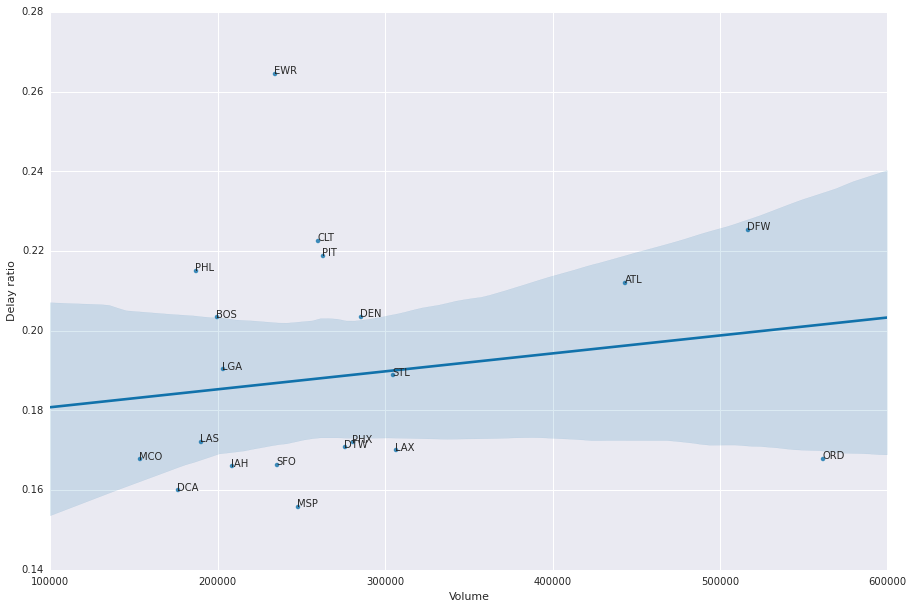

In [82]:
result = pd.concat([pdf_top_20_airport_volume, pdf_ratio_delay_airport], axis=1)
result.columns = ['dest_airport', 'total','junk','delay']
result.drop('junk',axis=1,inplace=True)
#print(result)

plt.figure(figsize=(15,10))
ax = sns.regplot(x="total", y="delay", data=result,color='#1172ab', n_boot=500,robust=True)
ax.set_xlabel('Volume')
ax.set_ylabel('Delay ratio')
for i, txt in enumerate(top_20_airports):
    ax.annotate(txt, (result['total'][i],result['delay'][i]))

<div class="alert alert-success">
Here we can see how delay and volume are related.

Our data suggest that there is indeed a relation between volume and delay ratio, usually when there is a higher volume there is a higher delay ratio too. Anyway, the situation is a bit more complex, in fact there are some airports with very high volume that have a delay in line with the average. Then, there are airports with fewer flights and a very high delay and airports with fewer flights and a low delay.

We can affirm that the best airport is ORD because it has very high volumes, but low delays.
EWR is absolutely the worst airport, low volumes and high delays.
</div>

#### Question 5.8
<div class="alert alert-info">
What is the percentage of delayed flights which belong to one of the top 20 busiest carriers?  
Comment the figure!
</div>

```python
K = 20

# extract top_20_carriers from stat_carrier
top_20_carriers = [...]

statistic_ratio_delay_carrier = (
    df_with_delay
        # select only flights that belong from one of top 20 carriers
        ...
        # group by carriers
        ...
        #  calculate the delay ratio
        ...
        # sort by name of airport
        ...
    )
#statistic_ratio_delay_carrier.show(20)

```

In [31]:
K = 20

# extract top_20_carriers from stat_carrier
top_20_carriers = [item[0] for item in stat_car.take(K)]
 

statistic_ratio_delay_carrier = (
    df_with_delay
        # select only flights that belong from one of top 20 carriers
        .filter(df_with_delay.carrier.isin(top_20_carriers))
        # group by carriers
        .groupBy('carrier')
        #  calculate the delay ratio
        .agg((func.sum('is_delay')/func.count('*')).alias('delay_ratio'))
        # sort by name of airport
        .orderBy(['carrier'])
    )
#statistic_ratio_delay_carrier.show(20)


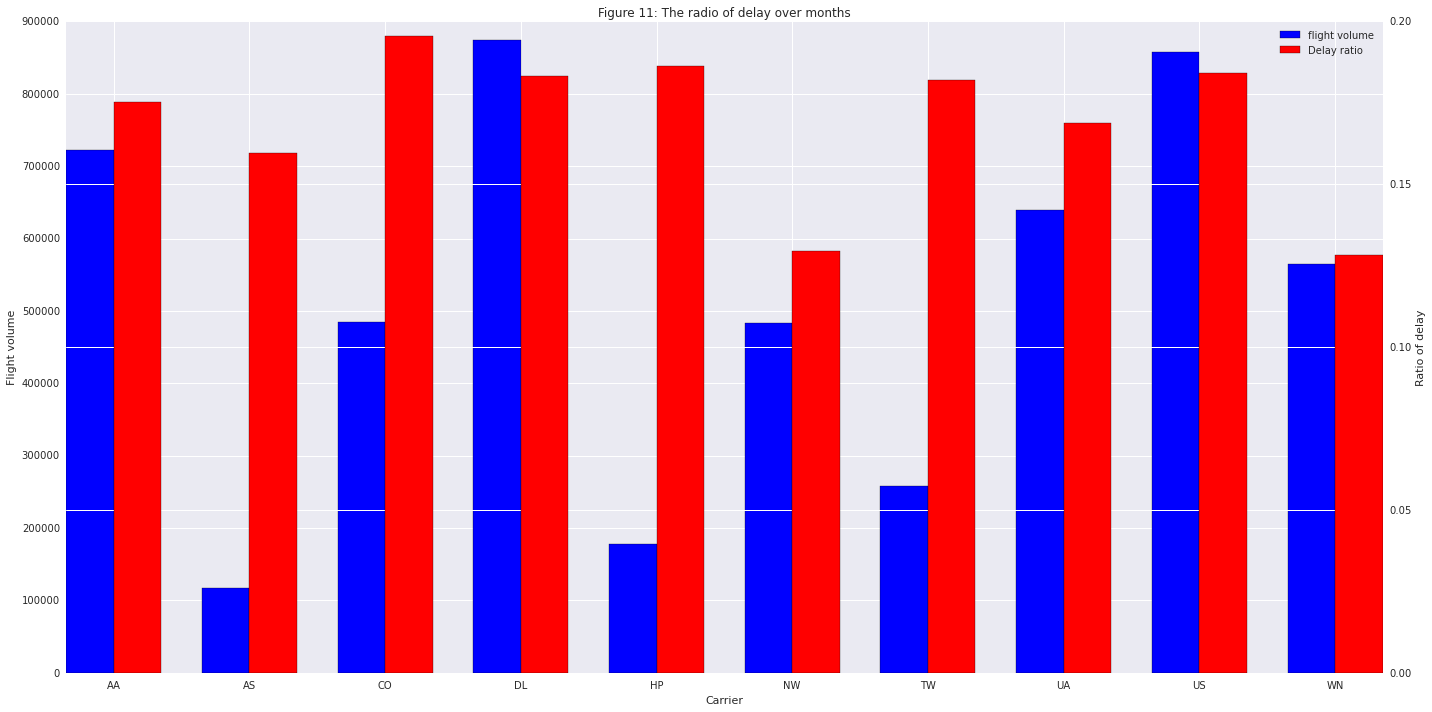

In [32]:
# collect data and plot
pdf_ratio_delay_carrier = pd.DataFrame(data=statistic_ratio_delay_carrier.collect())
pdf_top_20_carrier_volume = pd.DataFrame(data=stat_car.orderBy('carrier').take(K), columns=['carrier', 'count'])
#pdf_top_20_carrier_volume = pdf_top_20_carrier_volume.sort_values(by='carrier')
#print(pdf_top_20_carrier_volume)
top_20_carriers.sort()
index = np.arange(len(top_20_carriers))
bar_width = 0.35
opacity = 0.4


fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)

ax2 = ax.twinx()
plt.axis('normal')
ax.set_xlabel("Carrier")
ax.set_ylabel("Flight volume")
ax2.set_ylabel("Ratio of delay")
plt.xticks(index + bar_width, top_20_carriers)

plt.title('Figure 11: The radio of delay over months')
plt.grid(True,which="both",ls="-")
bar = ax.bar(index, pdf_top_20_carrier_volume['count'], 
        bar_width, color='b', 
        label='flight volume')
bar2 = ax2.bar(index + 1.5 * bar_width, pdf_ratio_delay_carrier[1], bar_width, 
       align='center', color='r', 
       label='Delay ratio')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


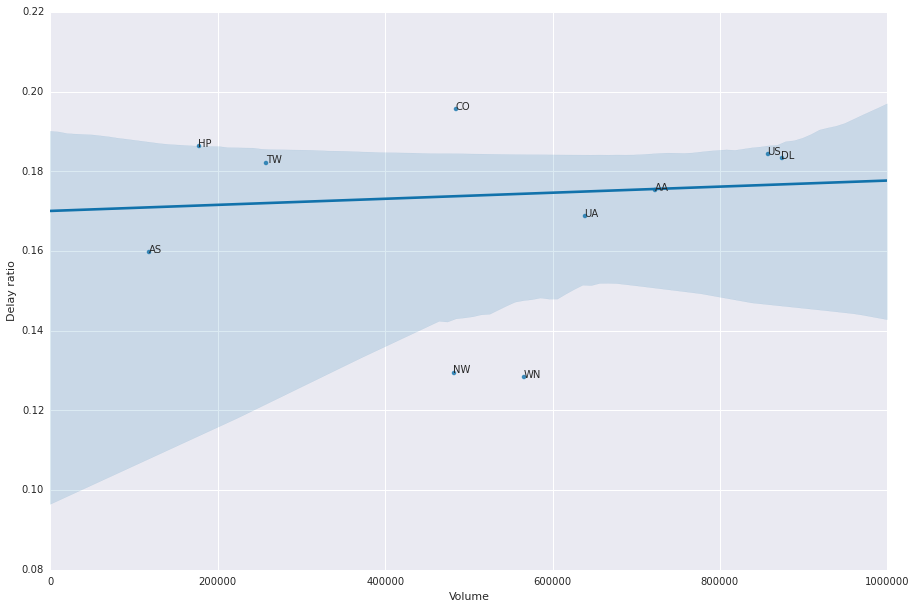

In [33]:
result = pd.concat([pdf_top_20_carrier_volume, pdf_ratio_delay_carrier], axis=1)
#print(pdf_top_20_carrier_volume)
#print(pdf_ratio_delay_carrier)
result.columns = ['carrier', 'total','junk','delay']
result.drop('junk',axis=1,inplace=True)
#print(result)

plt.figure(figsize=(15,10))
ax = sns.regplot(x="total", y="delay", data=result,color='#1172ab', n_boot=500,robust=True)
ax.set_xlabel('Volume')
ax.set_ylabel('Delay ratio')
for i, txt in enumerate(top_20_carriers):
    ax.annotate(txt, (result['total'][i],result['delay'][i]))

<div class="alert alert-success">
As we have seen before, carriers have very different volumes, but we see that the delay ratio is stable and independent from the volume of the carrier. There are two exceptions: NW and WN that have a way lower delay than the others 
</div>


# 4. Building a model of our data
Now that we have a good grasp on our data and its features, we will focus on how build a statistic model. Note that the features we can decide to use, to train our model, can be put in two groups:

- **Explicit features**: these are features that are present in the original data, or that can be built using additional data sources such as `weather` (for example querying a public API)
- **Implicit features**: these are the features that are inferred from other features such as `is_weekend`, `is_holiday`, `season`, `in_winter`,...

In this notebook, we will focus on the following predictors: `year`, `month`, `day_of_month`, `day_of_week`, `scheduled_departure_time`, `scheduled_arrival_time`, `carrier`, `is_weekend`, `distance`, `src_airport`, `dest_airport`. Among them, `is_weekend` is an implicit feature. The rest are explicit features.

The target feature is `arrival_delay`. 

Currently, MLLIB only supports building models from RDDs. It is important to read well the documentation and the MLLib API, to make sure to use the algorithms in an appropriate manner:

- MLLIB supports both categorical and numerical features. However, for each categorical feature, we have to indicate how many distinct values they can take
- Each training record must be a ```LabelledPoint```. This data structure has 2 components: ```label``` and ```predictor vector```. ```label``` is the value of target feature in the current record. ```predictor vector``` is a vector of values of type ```Double```. As such, we need to map each value of each categorical feature to a number. In this project, we choose a naïve approach: map each value to a unique index. 
- MLLIB uses a binning technique to find the split point (the predicate in each tree node). In particular, it divides the domain of numerical features into ```maxBins``` bins (32 by default). With categorical features, each distinct value fits in its own bin. **IMPORTANT:** MLLIB requires that no categorical feature have more than `maxBins` distinct values.
- We fill up the missing values in each **categorical** feature with its most common value. The missing values of a **numerical** feature are also replaced by the most common value (however, in some cases, a more sensible approach would be to use the median of this kind of feature).


## 4.1 Mapping values of each categorical feature to indices

### Question 6 

Among the selected features, `src_aiport`, `dest_airport`, `carrier` and `distance` have missing values. Besides, the first three of them are categorical features. That means, in order to use them as input features of MLLIB, the values of these features must be numerical. We can use a naïve approach: map each value of each feature to a unique index.

#### Question 6.1
<div class="alert alert-info">
Calculate the frequency of each source airport in the data and build a dictionary that maps each of them to a unique index.  

**Note:** we sort the airports by their frequency in descending order, so that we can easily take the most common airport(s) by taking the first element(s) in the result.
</div>

```python
# select distinct source airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_src = (
    df
        .groupBy(...)
        .agg(....alias('count'))
        .orderBy(desc('count'))
    )

# extract the airport names from stat_src
src_airports = [... for item in ....collect()]

num_src_airports = len(...)
src_airports_idx = range(0, ...)
map_src_airport_to_index = dict(zip(..., ...))

# test the dictionary
print(map_src_airport_to_index['ORD'])
print(map_src_airport_to_index['ATL'])
```

In [34]:
# select distinct source airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_src = (
    df
    .groupBy('src_airport')
    .agg(func.count('*').alias('count'))
    .orderBy(desc('count'))
    )

# extract the airport names from stat_src
src_airports = [item[0] for item in stat_src.collect()]
#print(src_airports)
num_src_airports = len(src_airports)
src_airports_idx = range(num_src_airports)
map_src_airport_to_index = dict(zip(src_airports,src_airports_idx))

# test the dictionary
print(map_src_airport_to_index['ORD'])
print(map_src_airport_to_index['ATL'])

0
2


#### Question 6.2
<div class="alert alert-info">
Calculate the frequency of each destination airport in the data and build a dictionary that maps each of them to a unique index.
</div>

```python
# select distinct destination airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_dest = ...

dest_airports = ...
num_dest_airports = ...
map_dest_airports_to_index = ...

# test the dictionary
print(map_src_airport_to_index['ORD'])
print(map_src_airport_to_index['ATL'])
```

In [35]:
# select distinct destination airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_dest =( 
    df
    .groupBy('dest_airport')
    .agg(func.count('*').alias('count'))
    .orderBy(desc('count'))
    )

#stat_dest.show()                     
dest_airports = [item[0] for item in stat_dest.collect()]
#print(src_airports)
num_dest_airports = len(dest_airports)
dest_airports_idx= range(num_dest_airports)
map_dest_airports_to_index = dict(zip(dest_airports,dest_airports_idx))

# test them dictionary
print(map_dest_airports_to_index['ORD'])
print(map_dest_airports_to_index['ATL'])

0
2


#### Question 6.3
<div class="alert alert-info">
Calculate the frequency of each carrier in the data and build a dictionary that maps each of them to a unique index.
</div>

```python
# select distinct carriers and map values to index
# sort carriers by their frequency descending
# so the most common aiport will be on the top
...
...
...
map_carriers_to_index = ...

```

In [36]:
# select distinct destination airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_carriers =( 
    df
    .groupBy('carrier')
    .agg(func.count('*').alias('count'))
    .orderBy(desc('count'))
    )

#stat_dest.show()                     
carriers = [item[0] for item in stat_carriers.collect()]
#print(carriers)
num_carriers = len(carriers)
carriers_idx = range(num_carriers)
map_carriers_to_index = dict(zip(carriers,carriers_idx))

# test them dictionary
print(map_carriers_to_index['DL'])
print(map_carriers_to_index['AS'])

0
9


## 4.2 Calculating the most common value of each feature
We use a simple strategy for filling in the missing values: replacing them with the most common value of the corresponding feature.

<div class="alert alert-danger">
**IMPORTANT NOTE:** features like ```month```, ```day_of_month```, etc... can be treated as numerical features in general. However, when it comes to build the model, it is much easier considering them as categorical features. In this case, to compute the most common value for such categorical features, we simply use the frequency of occurrence of each `label`, and chose the most frequent.
</div>

### Question 7
In the previous question, when constructing the dictionary for categorical features, we also sort their statistical information in a such way that the most common value of each feature are placed on the top.

Note that, feature `is_weekend` has the most common value set to `0` (that is, `no` the day is not a weekend).

#### Question 7.1
<div class="alert alert-info">
Find the most common value of feature `month` in data.
</div>



```python
the_most_common_month = (
    df
        .groupBy(...)
        .agg(...)
        .orderBy(desc('count'))
    ).first()[0]

print("The most common month:", the_most_common_month)

```

In [37]:
the_most_common_month = (
    df
    .groupBy('month')
    .agg(func.count('*').alias('count'))
    .orderBy(desc('count'))
    ).first()[0]

print("The most common month:", the_most_common_month)

The most common month: 8


#### Question 7.2
<div class="alert alert-info">
Find the most common value of features `day_of_month` and `day_of_week`.
</div>

```python
the_most_common_day_of_month = ...

the_most_common_day_of_week = ...

print("The most common day of month:", the_most_common_day_of_month)
print("The most common day of week:", the_most_common_day_of_week)

```

In [38]:
the_most_common_day_of_month = (
    df
    .groupBy('day_of_month')
    .agg(func.count('*').alias('count'))
    .orderBy(desc('count'))
    ).first()[0]

the_most_common_day_of_week = (
    df
    .groupBy('day_of_week')
    .agg(func.count('*').alias('count'))
    .orderBy(desc('count'))
    ).first()[0]

print("The most common day of month:", the_most_common_day_of_month)
print("The most common day of week:", the_most_common_day_of_week)

The most common day of month: 11
The most common day of week: 3


#### Question 7.3
<div class="alert alert-info">
Find the most common value of features `scheduled_departure_time` and `scheduled_arrival_time`.
</div>

```python
the_most_common_s_departure_time = ...

the_most_common_s_arrival_time = ...

print("The most common scheduled departure time:", the_most_common_s_departure_time)
print("The most common scheduled arrival time:", the_most_common_s_arrival_time)
```

In [39]:
the_most_common_s_departure_time = (
    df
    .groupBy('scheduled_departure_time')
    .agg(func.count('*').alias('count'))
    .orderBy(desc('count'))
    ).first()[0]

the_most_common_s_arrival_time = (
    df
    .groupBy('scheduled_arrival_time')
    .agg(func.count('*').alias('count'))
    .orderBy(desc('count'))
    ).first()[0]

print("The most common scheduled departure time:", the_most_common_s_departure_time)
print("The most common scheduled arrival time:", the_most_common_s_arrival_time)

The most common scheduled departure time: 700
The most common scheduled arrival time: 1915


#### Question 7.4
<div class="alert alert-info">
Calculate the mean of distance in the data. This value will be used to fill in the missing values of feature `distance` later.
</div>

```python
# calculate mean distance
mean_distance = ...
print("mean distance:", mean_distance)
```

In [40]:
# calculate mean distance
mean_distance = (
    df
    .agg((func.mean('distance')).alias('mean_distance'))
    .orderBy(desc('mean_distance'))
    ).first()[0]
print("mean distance:", mean_distance)

mean distance: 670.7402911985982


#### Question 7.5
<div class="alert alert-info">
Calculate the mean of arrival delay.
</div>

```python
# calculate mean arrival delay
mean_arrival_delay = ...
print("mean arrival delay:", mean_arrival_delay)
```

In [41]:
# calculate mean arrival delay
mean_arrival_delay = (
    df
    .agg((func.mean('arrival_delay')).alias('mean_delay'))
    .orderBy(desc('mean_delay'))
    ).first()[0]


print("mean arrival delay:", mean_arrival_delay)

mean arrival delay: 5.662489742613603


As known from section 3.4, there are 225 different origin airports and 225 different destination airports, more than the number of bins in default configuration. So, we must set `maxBins` >= 225.

## 4.3 Preparing training data and testing data
Recall, in this project we focus on decision trees. One way to think about our task is that we want to predict the unknown `arrival_delay` as a function combining several features, that is:

`arrival_delay = f(year, month, day_of_month, day_of_week, scheduled_departure_time, scheduled_arrival_time, carrier, src_airport, dest_airport, distance, is_weekend)`

When categorical features contain corrupt data (e.g., missing values), we proceed by replacing corrupt information with the most common value for the feature. For numerical features, in general, we use the same approach as for categorical features; in some cases, we repair corrupt data using the mean value of the distribution for numerical features (e.g., we found the mean for `delay` and `distance`, by answering questions above).

The original data is split randomly into two parts with ratios 70% for **training** and 30% for **testing**.

### Question 8
<div class="alert alert-info">
  o  Replace the missing values of each feature in our data by the corresponding most common value or mean.  

  o  Divide data into two parts: 70% for **training** and 30% for **testing**

</div>

```python
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint


def is_valid(value):
    return value != "NA" and len(value) > 0

data = cleaned_data\
    .map(lambda line: line.split(','))\
    .map(lambda values: 
        LabeledPoint( 
            int(values[14]) if is_valid(values[14]) else mean_arrival_delay, # arrival delay
            [
                int(values[0]), # year
                int(values[1]) if is_valid(values[1]) else most_common_month, # month
                ... if is_valid(...) else ..., # day of month
                ... if is_valid(...) else ..., # day of week
                ... , # scheduled departure time
                ..., # scheduled arrival time
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index[values[8]] if is_valid(values[8]) \
                    else map_carriers_to_index[carriers[0]], # carrier
                map_src_airport_to_index[...], # src_airport
                map_dest_airports_to_index[...], # destination_airport
                int(values[18]) if is_valid(values[18]) else ..., # distance
                1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
            ]
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit(...)

trainingData = trainingData.cache()
testData = testData.cache()
```

In [42]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint


def is_valid(value):
    return value != "NA" and len(value) > 0

data =( 
    cleaned_data
    .map(lambda line: line.split(','))
    .map(lambda values: 
        LabeledPoint( 
            int(values[14]) if is_valid(values[14]) else mean_arrival_delay, # arrival delay
            [
                int(values[0]), # year
                int(values[1]) if is_valid(values[1]) else most_common_month, # month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_month, # day of month
                int(values[3]) if is_valid(values[3]) else the_most_common_day_of_week, # day of week
                int(values[5]) if is_valid(values[5]) else the_most_common_s_departure_time, # scheduled departure time
                int(values[7]) if is_valid(values[7]) else the_most_common_s_arrival_time, # scheduled arrival time
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index[values[8]] if is_valid(values[8]) else map_carriers_to_index[carriers[0]], # carrier
                map_src_airport_to_index[values[16]] if is_valid(values[16]) else map_src_airport_to_index_to_index[src_airports[0]], # src_airport
                map_dest_airports_to_index[values[17]] if is_valid(values[17]) else map_dest_airports_to_index_to_index[dest_airports[0]], # destination_airport
                int(values[18]) if is_valid(values[18]) else mean_distance, # distance
                1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
            ]
        )
    )
)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit((7,3))

trainingData = trainingData.cache()
testData = testData.cache()

## 5.4 Building a decision tree model

### Question 9
<div class="alert alert-info">
We can train a decision model by using function
<code>
`DecisionTree.trainRegressor(<training_data>, categoricalFeaturesInfo=<categorical_info>, impurity=<impurity_function>,  maxDepth=<max_depth>, maxBins=<max_bins>)`.  
</code>  

Where,  
<ul>

<li> `training_data`: the data used for training  </li>

<li> `categorical_info`: a dictionary that maps the index of each categorical features to its number of distinct values  </li>

<li> `impurity_function`: the function that is used to calculate impurity of data in order to select the best split  </li>

<li> `max_depth`: the maximum depth of the tree  </li>

<li> `max_bins`: the maximum number of bins that the algorithm will divide on each feature. </li>

</ul>  

Note that, `max_bins` cannot smaller than the number distinct values of every categorical features.  

Complete the code below to train a decision tree model.
</div>


```python
# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {6 : num_carriers, 7: ..., ...: num_dest_airports, 10: ...}

# Train a DecisionTree model.
model = DecisionTree.trainRegressor(trainingData, 
                                    categoricalFeaturesInfo=...,
                                    impurity='variance', maxDepth=12, maxBins=255)
```

In [43]:
# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {6 : num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}

# Train a DecisionTree model.
model = DecisionTree.trainRegressor(trainingData, 
                                    categoricalFeaturesInfo=categorical_info,
                                    impurity='variance', maxDepth=12, maxBins=255)

## 5.5 Testing the decision tree model

### Question 10
#### Question 10.1
<div class="alert alert-info">
We often use Mean Square Error as a metric to evaluate the quality of a tree model.  

Complete the code below to calculate the MSE of our trained model.
</div>

```python
# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(
    lambda p: ...)
print('Test Mean Squared Error = ' + str(testMSE))
```

In [44]:
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)

In [45]:
testMSE = labelsAndPredictions.map(
    lambda p: ((p[0] - p[1])*(p[0] - p[1]))).mean()


print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 489.994071108495


### Question 10.2
<div class="alert alert-info">
Comment the results you have obtained. Is the MSE value you get from a decision tree indicating that our statistical model is very good in predicting airplane delays?  

Use your own words to describe and interpret the value you obtained for the MSE.
</div>

<div class="alert alert-success">
Since our MSE is circa 500, we can say that this is definetly not a good result. We can say this because if we take its square root, we obtain basically that our predictions have 20 minutes of uncertainty. Since 15 minutes are sufficient to mark a flight as delayed, then our result is not good enough. Another idea would be to calculate statistics of our predictions and see if they are similar to the real ones.
</div>



## 5.6 Building random decision forest model (or random forest)
Next, we use MLLib to build a more powerful model: random forests. In what follows, use the same predictors defined and computed above to build a decision tree, but this time use them to build a random decision forest.

### Question 11
<div class="alert alert-info">
Train a random decision forest model and evaluate its quality using MSE metric.  

Compare to decision tree model and comment the results.  

Similarly to question 10.2, comment with your own words the MSE value you have obtained.
</div>

```python
from pyspark.mllib.tree import RandomForest, RandomForestModel

# Train a RandomForest model.
forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=...,
                                    numTrees=10, impurity='variance', maxDepth=12, maxBins=255)


testMSE = ...
print('Test Mean Squared Error = ' + str(testMSE))
```

In [46]:
from pyspark.mllib.tree import RandomForest, RandomForestModel

# Train a RandomForest model.
forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=10, impurity='variance', maxDepth=12, maxBins=255)

predictions = forest_model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)

testMSE = labelsAndPredictions.map(
    lambda p: ((p[0] - p[1])*(p[0] - p[1]))).mean()


print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 476.0437312363479


<div class="alert alert-success">
We obtain a better result then before, but this is not enough.
It's quite obvious that random forests can do better than decision tree, expecially in this cases where there is not a direct correlation between our features and the arrival delay.
In this experiments we did not marked months and days as categorical features, but we will do it later in order to improve our performances.
</div>

## 5.7 Parameter tuning
In this lecture, we used `maxDepth=12`, `maxBins=255`, `numTrees=10`. Next, we are going to explore the meta-parameter space a little bit.

For more information about parameter tuning, please read the documentation of [MLLIB](http://spark.apache.org/docs/latest/mllib-decision-tree.html#tunable-parameters)

### Question 12
<div class="alert alert-info">
Train the random forest model using different parameters, to understand their impact on the main performance metric we have used here, that is the MSE. For example, you can try a similar approach to that presented in the Notebook on recommender systems, that is using nested for loops.
</div>

<div class="alert alert-danger">
**NOTE:** be careful when selecting parameters as some might imply very long training times, or eventually, the typical memory problems that affect Spark!
</div>

# tuning trees

In [ ]:
num_split = 2

evaluations = []
t0  = time()
for it in range(num_split):
    trainingData, testData = data.randomSplit([7,3])
    trainingData.cache()
    testData.cache()
    
    model = DecisionTree.trainRegressor(trainingData, 
                                categoricalFeaturesInfo=categorical_info,
                                impurity='variance', maxDepth=1, maxBins=255)

    
    for maxDepth in range(5,21):
        for maxBins in [255,512]:
            print("Train model with maxDepth=%d maxBins=%d, it=%d" % (maxDepth, maxBins, it))
            # with each combination of params, we should run multiple times and get avg
            # for simple, we only run one time.
            t2 = time()
            model = DecisionTree.trainRegressor(trainingData, 
                                categoricalFeaturesInfo=categorical_info,
                                impurity='variance', maxDepth=maxDepth, maxBins=maxBins)

            predictions = model.predict(testData.map(lambda x: x.features))
            labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)

            testMSE = labelsAndPredictions.map(lambda p: ((p[0] - p[1])*(p[0] - p[1]))).mean()
            t3 = time()
            evaluations.append((maxDepth, maxBins, it, t3-t2, testMSE))
            print("finish training of model in %f secs" % (t3 - t2))
            print("MSE of trained model is %f" % testMSE)
    trainingData.unpersist()
    testData.unpersist()
    

t1 = time()
print("finish training in %f secs" % (t1 - t0))

In [ ]:
eval_tup = [list(x) for x in evaluations]

In [ ]:
evalDF = sqlContext.createDataFrame(eval_tup, ['maxDepth', 'maxBins','it','time','mse'])
evalDF.toPandas().to_csv('evaldata_tree.csv')

In [185]:
from_csv = pd.read_csv('evaldata_tree.csv')
#from_csv.head()
evalDF = sqlContext.createDataFrame(from_csv).drop('Unnamed: 0')
evalDF.show(10)

+--------+-------+---+------------------+-----------------+
|maxDepth|maxBins| it|              time|              mse|
+--------+-------+---+------------------+-----------------+
|       5|    255|  0| 78.99845957756042|530.6823747607533|
|       5|    512|  0|14.476160049438475|530.6878493360373|
|       6|    255|  0|14.034737348556519|527.6875386095122|
|       6|    512|  0| 14.38136601448059|527.6971664397913|
|       7|    255|  0| 14.21172046661377|523.7187039754087|
|       7|    512|  0|15.360677719116213|523.7417066474555|
|       8|    255|  0|16.025400161743164| 518.875490715372|
|       8|    512|  0|16.006815433502194|518.8845568419197|
|       9|    255|  0|15.872905492782593|513.7405607462365|
|       9|    512|  0|16.982324600219727|  513.75279016017|
+--------+-------+---+------------------+-----------------+
only showing top 10 rows



In [186]:
eval_pd = evalDF.groupby(['maxDepth','maxBins']).avg('time','mse').toPandas()

/opt/conda/lib/python3.5/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


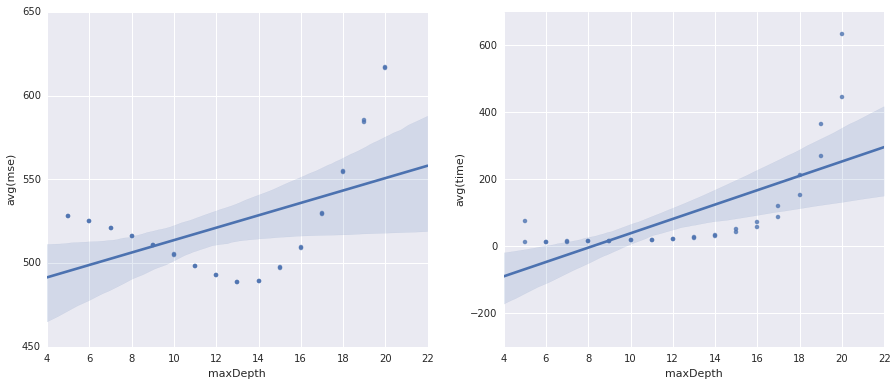

In [187]:
plt.figure(figsize=(15,6))  
ax1 = plt.subplot(121)
sns.regplot(x='maxDepth', y='avg(mse)',data =eval_pd,ax=ax1 )
ax2 = plt.subplot(122)
sns.regplot(x='maxDepth', y='avg(time)',data =eval_pd,ax=ax2 )
f.show()

/opt/conda/lib/python3.5/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


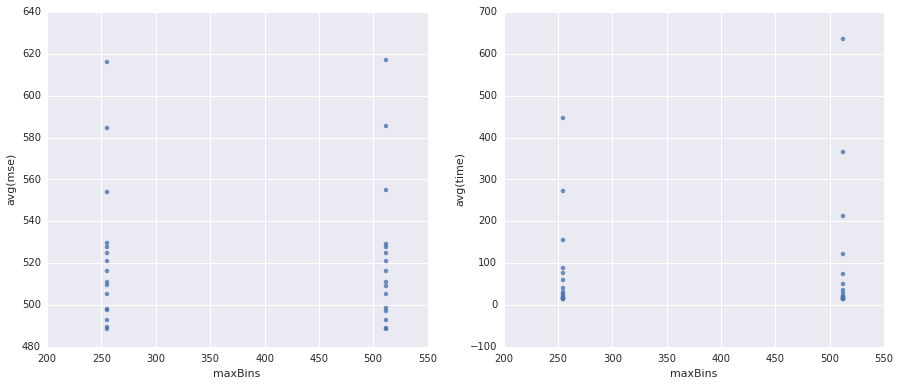

In [188]:
plt.figure(figsize=(15,6))  
ax1 = plt.subplot(121)
sns.regplot(x='maxBins', y='avg(mse)',data =eval_pd,ax=ax1,fit_reg=False )
ax2 = plt.subplot(122)
sns.regplot(x='maxBins', y='avg(time)',data =eval_pd,ax=ax2,fit_reg=False )
f.show()

<div class="alert alert-success">
From our analysis, decision trees are hard to train because, differently from random forests, they overfit easily.
They reach an optimum result when the depth is 13-14, while the time required explodes when the depth increases too much (greater than 16)
<br>
We see that the maxbins parameter has not a great influence on both time and mse
</div>

# do not use maxdepth but information gain

In [ ]:
num_split = 1

evaluations = []
t0  = time()
for it in range(num_split):
    trainingData, testData = data.randomSplit([7,3])
    trainingData.cache()
    testData.cache()
    
    model = DecisionTree.trainRegressor(trainingData, 
                                categoricalFeaturesInfo=categorical_info,
                                impurity='variance', maxDepth=1, maxBins=255)

    
    for minInfoGain in [0.0001, 0.001,0.01,0.1,0.5,1.0,2.0,10.0]:
        for maxBins in [1023]:
            print("Train model with minInfoGain=%f maxBins=%d, it=%d" % (minInfoGain, maxBins, it))
            # with each combination of params, we should run multiple times and get avg
            # for simple, we only run one time.
            t2 = time()
            model = DecisionTree.trainRegressor(trainingData, 
                                categoricalFeaturesInfo=categorical_info,
                                impurity='variance', minInfoGain=minInfoGain, maxBins=maxBins)

            predictions = model.predict(testData.map(lambda x: x.features))
            labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)

            testMSE = labelsAndPredictions.map(lambda p: ((p[0] - p[1])*(p[0] - p[1]))).mean()
            t3 = time()
            evaluations.append((minInfoGain, maxBins, it, t3-t2, testMSE))
            print("finish training of model in %f secs" % (t3 - t2))
            print("MSE of trained model is %f" % testMSE)
    trainingData.unpersist()
    testData.unpersist()
    

t1 = time()
print("finish training in %f secs" % (t1 - t0))

In [ ]:
eval_tup = [list(x) for x in evaluations]

In [ ]:
evalDF = sqlContext.createDataFrame(eval_tup, ['mininfogain', 'maxbins','it','time','mse'])
evalDF.toPandas().to_csv('evaldata_tree_mininfogain.csv')

todo: analysis on parameters.

<div class="alert alert-success">
Apparently we lost our file with the statistics. In any case, the tree grows too much and we obtain really bad results (mse greater that 550)
</div>

# tuning forests

In [ ]:
from pyspark.mllib.tree import RandomForest, RandomForestModel

num_split = 2

evaluations = []
t0  = time()
for it in range(num_split):
    trainingData, testData = data.randomSplit([7,3])
    trainingData.cache()
    testData.cache()
    
    forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                                numTrees=1, impurity='variance', maxDepth=1, maxBins=255)

    
    for maxDepth in range(5,21,2):
        for numTrees in range(5,15,2):
            print("Train model with maxDepth=%d numTrees=%d, it=%d" % (maxDepth, numTrees, it))
            # with each combination of params, we should run multiple times and get avg
            # for simple, we only run one time.
            t2 = time()

            # Train a RandomForest model.
            forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                                numTrees=numTrees, impurity='variance', maxDepth=maxDepth, maxBins=255)

            
            predictions = forest_model.predict(testData.map(lambda x: x.features))
            labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)

            testMSE = labelsAndPredictions.map(lambda p: ((p[0] - p[1])*(p[0] - p[1]))).mean()
            t3 = time()
            evaluations.append((maxDepth, numTrees, it, t3-t2, testMSE))
            print("finish training of model in %f secs" % (t3 - t2))
            print("MSE of trained model is %f" % testMSE)
    trainingData.unpersist()
    testData.unpersist()
    

t1 = time()
print("finish training in %f secs" % (t1 - t0))

In [ ]:
eval_tup = [list(x) for x in evaluations]

In [ ]:
evalDF = sqlContext.createDataFrame(eval_tup, ['maxDepth', 'numTrees','it','time','mse'])
evalDF.toPandas().to_csv('evaldata_forest.csv')

todo: analysis on parameters.

In [179]:
from_csv = pd.read_csv('evaldata_forest.csv')
#from_csv.head()
evalDF = sqlContext.createDataFrame(from_csv).drop('Unnamed: 0')
evalDF.show(10)

+--------+--------+---+------------------+-----------------+
|maxDepth|numTrees| it|              time|              mse|
+--------+--------+---+------------------+-----------------+
|       5|       5|  0|44.277352809906006|526.4553817850492|
|       5|       7|  0|17.503747940063473|526.1943978307248|
|       5|       9|  0|22.126162767410282|525.4342788815808|
|       5|      11|  0|24.523911952972412|525.7797985489526|
|       5|      13|  0| 30.74117946624756|525.4959859065465|
|       7|       5|  0|18.594844102859497|517.7507061823206|
|       7|       7|  0|24.785826921463013|517.9681018095109|
|       7|       9|  0| 31.02817010879517|517.2852141032416|
|       7|      11|  0| 35.79749345779419|517.9127327257893|
|       7|      13|  0| 42.49048542976379|517.7746782666687|
+--------+--------+---+------------------+-----------------+
only showing top 10 rows



In [181]:
eval_pd = evalDF.groupby(['maxDepth','numTrees']).avg('time','mse').toPandas()

/opt/conda/lib/python3.5/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


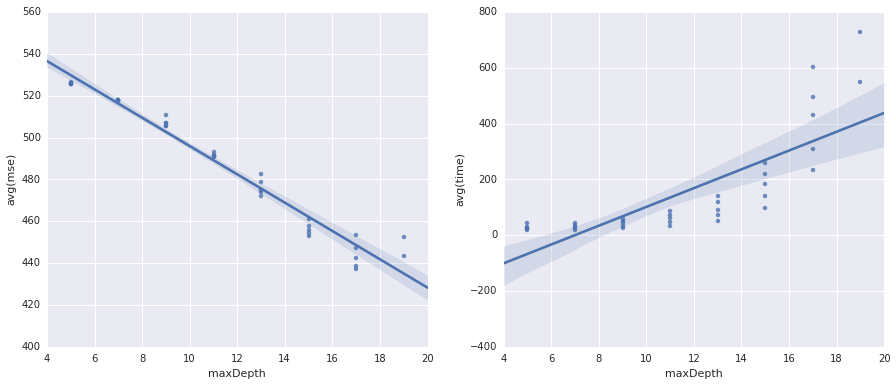

In [182]:
plt.figure(figsize=(15,6))  
ax1 = plt.subplot(121)
sns.regplot(x='maxDepth', y='avg(mse)',data =eval_pd,ax=ax1 )
ax2 = plt.subplot(122)
sns.regplot(x='maxDepth', y='avg(time)',data =eval_pd,ax=ax2 )
f.show()

<div class="alert alert-success">
Here we see that when we increase the maxDepth, a randomforest achieves better results. This is good, because it means that if we have enough power, we can build a really good model.
<br>
<br>
Unfortunately, the training time increases with the depth of the forest, we think that, like in the decision tree, there is an exponential relation.
</div>

/opt/conda/lib/python3.5/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


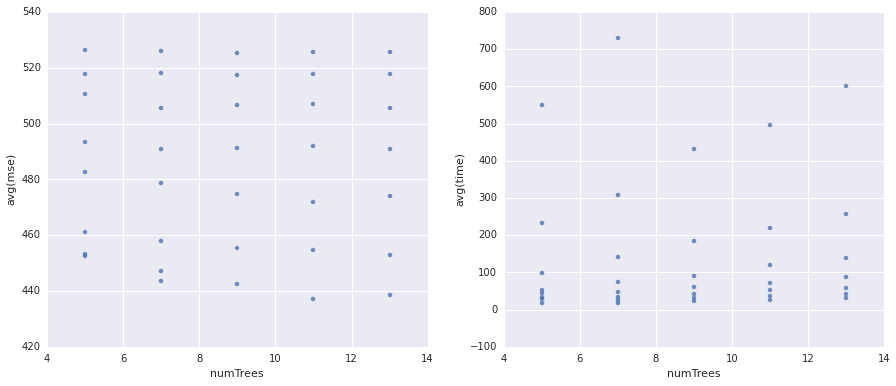

In [184]:
plt.figure(figsize=(15,6))  
ax1 = plt.subplot(121)
sns.regplot(x='numTrees', y='avg(mse)',data =eval_pd,ax=ax1, fit_reg=False )
ax2 = plt.subplot(122)
sns.regplot(x='numTrees', y='avg(time)',data =eval_pd,ax=ax2, fit_reg=False )
f.show()

<div class="alert alert-success">
Here we see that there is not a direct relation between the number of trees and the mse of the model. Even if it is not clear from the graph, we have seen that a deep forest needs many trees in order to achieve better results.
<br>
Looking at the training time, it is clear that the number of trees is not the main cause for long trainings.
</div>

# find the best ever forest

In [ ]:
from pyspark.mllib.tree import RandomForest, RandomForestModel

num_split = 1

evaluations = []
t0  = time()
for it in range(num_split):
    trainingData, testData = data.randomSplit([7,3])
    trainingData.cache()
    testData.cache()
    
    forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                                numTrees=1, impurity='variance', maxDepth=1, maxBins=255)

    
    for maxDepth in [18]:
        for numTrees in [13]:
            print("Train model with maxDepth=%d numTrees=%d, it=%d" % (maxDepth, numTrees, it))
            # with each combination of params, we should run multiple times and get avg
            # for simple, we only run one time.
            t2 = time()

            # Train a RandomForest model.
            forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                                numTrees=numTrees, impurity='variance', maxDepth=maxDepth, maxBins=1023)

            
            predictions = forest_model.predict(testData.map(lambda x: x.features))
            labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)

            testMSE = labelsAndPredictions.map(lambda p: ((p[0] - p[1])*(p[0] - p[1]))).mean()
            t3 = time()
            evaluations.append((maxDepth, numTrees, it, t3-t2, testMSE))
            print("finish training of model in %f secs" % (t3 - t2))
            print("MSE of trained model is %f" % testMSE)
    trainingData.unpersist()
    testData.unpersist()
    

t1 = time()
print("finish training in %f secs" % (t1 - t0))

<div class="alert alert-success">
Unfortunately the connection closed after few hours of training, but we have found that a depth=18 and numTrees=13 are optimal. This confirms the analysis done before on the link between depth and error
</div>

# Put median and not mean in null values

In [ ]:
median_distance = df.approxQuantile("distance", [0.5], 0.10)

In [ ]:
median_arrival_delay = df.approxQuantile("arrival_delay", [0.5], 0.10)

In [ ]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint


def is_valid(value):
    return value != "NA" and len(value) > 0

data =( 
    cleaned_data
    .map(lambda line: line.split(','))
    .map(lambda values: 
        LabeledPoint( 
            int(values[14]) if is_valid(values[14]) else median_arrival_delay[0], # arrival delay
            [
                int(values[0]), # year
                int(values[1]) if is_valid(values[1]) else most_common_month, # month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_month, # day of month
                int(values[3]) if is_valid(values[3]) else the_most_common_day_of_week, # day of week
                int(values[5]) if is_valid(values[5]) else the_most_common_s_departure_time, # scheduled departure time
                int(values[7]) if is_valid(values[7]) else the_most_common_s_arrival_time, # scheduled arrival time
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index[values[8]] if is_valid(values[8]) else map_carriers_to_index[carriers[0]], # carrier
                map_src_airport_to_index[values[16]] if is_valid(values[16]) else map_src_airport_to_index_to_index[src_airports[0]], # src_airport
                map_dest_airports_to_index[values[17]] if is_valid(values[17]) else map_dest_airports_to_index_to_index[dest_airports[0]], # destination_airport
                int(values[18]) if is_valid(values[18]) else median_distance[0], # distance
                1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
            ]
        )
    )
)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit((7,3))

trainingData = trainingData.cache()
testData = testData.cache()

In [ ]:
from pyspark.mllib.tree import RandomForest, RandomForestModel

num_split = 1

evaluations = []
t0  = time()
for it in range(num_split):
    trainingData, testData = data.randomSplit([7,3])
    trainingData.cache()
    testData.cache()
    
    forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                                numTrees=1, impurity='variance', maxDepth=1, maxBins=255)

    
    for maxDepth in [17]:
        for numTrees in [11]:
            print("Train model with maxDepth=%d numTrees=%d, it=%d" % (maxDepth, numTrees, it))
            # with each combination of params, we should run multiple times and get avg
            # for simple, we only run one time.
            t2 = time()

            # Train a RandomForest model.
            forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                                numTrees=numTrees, impurity='variance', maxDepth=maxDepth, maxBins=1023)

            
            predictions = forest_model.predict(testData.map(lambda x: x.features))
            labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)

            testMSE = labelsAndPredictions.map(lambda p: ((p[0] - p[1])*(p[0] - p[1]))).mean()
            t3 = time()
            evaluations.append((maxDepth, numTrees, it, t3-t2, testMSE))
            print("finish training of model in %f secs" % (t3 - t2))
            print("MSE of trained model is %f" % testMSE)
    trainingData.unpersist()
    testData.unpersist()
    

t1 = time()
print("finish training in %f secs" % (t1 - t0))

<div class="alert alert-success">
Here we see basically no improvement, we think this is because median is near average in this case and because we do not have many null values.
</div>

# 6. Addition (bonus) questions
As you may have noticed, the performance of our statistical models is somehow questionable! What are we missing here? Why is that even using state-of-the-art approaches give poor results?

In what follows, we will try to address some of the limitations of the present Notebook, and provide additional data that might help.

## 6.1. Additional data
In the HDFS file system you have used for running the Notebook, you will notice that there are several other years available (in addition to 1994), which could be used to train a statistical model with more data. In the end, we're playing with "Big Data", hence one might think that feeding more training data to the algorithm should help!

## 6.2. Feature selection

You might think that the flight delays do not only depend on the source airport, destination airport, departure time, etc... as we assumed. They also depend on other features such as the weather, the origin country, the destination city,... To improve the prediction quality, we should consider these features too.

There are some other datasets that related to this use case:

- Airport IATA Codes to City names and Coordinates mapping: http://stat-computing.org/dataexpo/2009/airports.csv
- Carrier codes to Full name mapping: http://stat-computing.org/dataexpo/2009/carriers.csv
- Information about individual planes: http://stat-computing.org/dataexpo/2009/plane-data.csv
- Weather information: http://www.wunderground.com/weather/api/. You can subscribe for free to the developers' API and obtain (at a limited rate) historical weather information in many different formats. Also, to get an idea of the kind of information is available, you can use this link: http://www.wunderground.com/history/


### Question 13
<div class="alert alert-info">
Using the data sources above, select additional feature and repeat the process of defining an appropriate training and test datasets, to evaluate the impact of new features on the performance of the model. Focus first on decision trees, then move to random forests.
</div>

> The important thing is to not stop questioning. Curiosity has its own reason for existence. (Albert Einstein)

<div class="alert alert-success">
Be active! Ask yourself other questions which help you explore more about this data and try to answer them. Make this notebook be a part of your CV!
</div>

# Summary
In this lecture, we've had an overview about Decision Trees, Random Forests and how to use them. We also insisted on a simple methodology to adopt when dealing with a Data Science problem. 
The main take home messages should be:

* Feature selection is a difficult, delicate and important task. In this project, the student was heavily guided. However, we invite to exercise with additional features, for example external ones related to weather conditions.

* Parameter tuning requires a deep understanding of the algorithm used to build a statistical model. In general, to reduce computational cost, several techniques introduce parameters that, if tuned properly, can lead to tremendous time savings.

# Route analysis

<div class="alert alert-success">
We want to find if there are some routes that have big delays.
Later we could put this information in the model as an additional column.

</div>

In [198]:
df_clean = (
    sqlContext
    .createDataFrame(cleaned_data_to_columns, airline_data_schema)
    .select(['tail_number', 'year', 'month', 'day_of_month', 'day_of_week', 'scheduled_departure_time', 'scheduled_arrival_time','scheduled_elapsed_time','carrier', 'arrival_delay', 'distance', 'src_airport', 'dest_airport'])
    .cache()
    )
#df_clean.show()

In [199]:
df_clean_grouped = (
    df_clean
    .select('src_airport','dest_airport','arrival_delay')
    .withColumn('arrival_delay_',df_clean.arrival_delay)
    .groupBy(['src_airport','dest_airport'])
    .agg({"arrival_delay": "sum", "arrival_delay_": "count"})
    .withColumnRenamed('sum(arrival_delay)','arrival_delay_sum')
    .withColumnRenamed('count(arrival_delay_)','arrival_delay_count')
    
    )
#df_clean_grouped.show()

In [200]:
df_clean_avg = (
    df_clean_grouped
    .withColumn('arrival_delay_avg',df_clean_grouped.arrival_delay_sum/df_clean_grouped.arrival_delay_count) 
    .withColumn('route',df_clean_grouped.src_airport+'-'+df_clean_grouped.dest_airport) 
    )
#df_clean_avg.orderBy('arrival_delay_avg',ascending=0).show()

In [201]:
df_clean_avg_filtered= df_clean_avg.filter(df_clean_avg.arrival_delay_count > 100).orderBy('arrival_delay_avg',ascending=0)
#df_clean_avg_filtered.show()

In [202]:
route_delay = (df_clean_avg_filtered
               .select(df_clean_avg_filtered.src_airport, df_clean_avg_filtered.dest_airport,df_clean_avg_filtered.arrival_delay_avg)
               .rdd.map(lambda x: (x[0]+'-'+x[1],x[2]))
               .toDF(['route','avg_route_delay'])
              )

route_delay.limit(10).show()

+-------+------------------+
|  route|   avg_route_delay|
+-------+------------------+
|IAD-EWR| 35.59756097560975|
|JFK-BWI|31.069868995633186|
|DFW-HDN|26.196428571428573|
|BOS-LAS| 24.82634730538922|
|TPA-EWR| 24.78726198292843|
|LAS-EWR| 24.38943894389439|
|EWR-LAS| 23.77777777777778|
|EWR-PHX|23.392857142857142|
|DAB-MLB| 23.33783783783784|
|DFW-JFK| 22.86336866902238|
+-------+------------------+



In [203]:
df_clean_avg_filtered.select(df_clean_avg_filtered.src_airport, df_clean_avg_filtered.dest_airport,df_clean_avg_filtered.arrival_delay_avg).toPandas().to_csv('route_delay.csv',index=False)

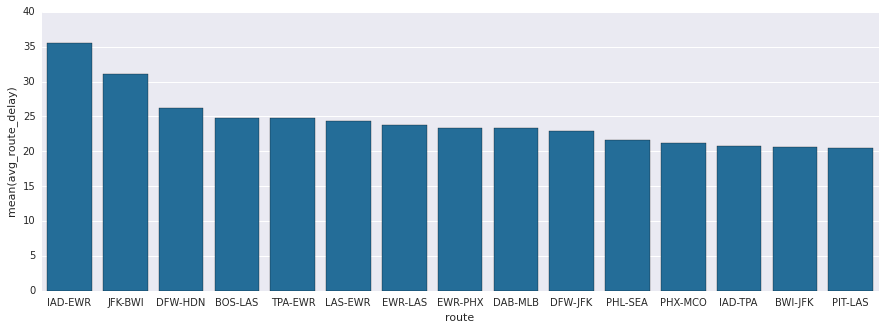

In [204]:
pdf_route_delay = route_delay.limit(15).toPandas()

plt.figure(figsize = (15,5))
ax = sns.barplot(x='route', y='avg_route_delay', data=pdf_route_delay, color='#1172ab')

plt.show()

<div class="alert alert-success">
We can see that there are some routes in which there are more delays; however the difference is not so big, so it doesn't seem tha the route influences the delay.
</div>

# Data analysis on all years

In [105]:
# to start testing, we can focus on a single year
input_path = "/datasets/airline/*"
raw_data = sc.textFile(input_path)
header = raw_data.first()

# replace invalid data with NULL and remove header
cleaned_data = (
    raw_data
    # filter out the header
    .filter(lambda line: line != header)
    # replace the missing values with empty characters
    #.map(lambda line: line.replace(',NA', ','))
    .map(lambda line: ','.join(list(map(lambda x: x if x != 'NA' else '',line.split(',')))))
    #todo fix map
)

In [106]:
sqlContext = SQLContext(sc)


# Declare the data schema
# see http://stat-computing.org/dataexpo/2009/the-data.html
# for more information
airline_data_schema = StructType([ \
    #StructField( name, dataType, nullable)
    StructField("year",                     IntegerType(), True), \
    StructField("month",                    IntegerType(), True), \
    StructField("day_of_month",             IntegerType(), True), \
    StructField("day_of_week",              IntegerType(), True), \
    StructField("departure_time",           IntegerType(), True), \
    StructField("scheduled_departure_time", IntegerType(), True), \
    StructField("arrival_time",             IntegerType(), True), \
    StructField("scheduled_arrival_time",   IntegerType(), True), \
    StructField("carrier",                  StringType(),  True), \
    StructField("flight_number",            StringType(),  True), \
    StructField("tail_number",              StringType(), True), \
    StructField("actual_elapsed_time",      IntegerType(), True), \
    StructField("scheduled_elapsed_time",   IntegerType(), True), \
    StructField("air_time",                 IntegerType(), True), \
    StructField("arrival_delay",            IntegerType(), True), \
    StructField("departure_delay",          IntegerType(), True), \
    StructField("src_airport",              StringType(),  True), \
    StructField("dest_airport",             StringType(),  True), \
    StructField("distance",                 IntegerType(), True), \
    StructField("taxi_in_time",             IntegerType(), True), \
    StructField("taxi_out_time",            IntegerType(), True), \
    StructField("cancelled",                StringType(),  True), \
    StructField("cancellation_code",        StringType(),  True), \
    StructField("diverted",                 StringType(),  True), \
    StructField("carrier_delay",            IntegerType(), True), \
    StructField("weather_delay",            IntegerType(), True), \
    StructField("nas_delay",                IntegerType(), True), \
    StructField("security_delay",           IntegerType(), True), \
    StructField("late_aircraft_delay",      IntegerType(), True)\
])

In [107]:
# convert each line into a tuple of features (columns)
cleaned_data_to_columns = cleaned_data.map(lambda l: l.split(","))\
    .map(lambda cols: 
         (
            int(cols[0])  if cols[0] else None,
            int(cols[1])  if cols[1] else None,
            int(cols[2])  if cols[2] else None,
            int(cols[3])  if cols[3] else None,
            int(cols[4])  if cols[4] else None,
            int(cols[5])  if cols[5] else None,
            int(cols[6])  if cols[6] else None,
            int(cols[7])  if cols[7] else None,
            cols[8]       if cols[8] else None,
            cols[9]       if cols[9] else None,
            cols[10]      if cols[10] else None,
            int(cols[11]) if cols[11] else None,
            int(cols[12]) if cols[12] else None,
            int(cols[13]) if cols[13] else None,
            int(cols[14]) if cols[14] else None,
            int(cols[15]) if cols[15] else None,
            cols[16]      if cols[16] else None,
            cols[17]      if cols[17] else None,
            int(cols[18]) if cols[18] else None,
            int(cols[19]) if cols[19] else None,
            int(cols[20]) if cols[20] else None,
            cols[21]      if cols[21] else None,
            cols[22]      if cols[22] else None,
            cols[23]      if cols[23] else None,
            int(cols[24]) if cols[24] else None,
            int(cols[25]) if cols[25] else None,
            int(cols[26]) if cols[26] else None,
            int(cols[27]) if cols[27] else None,
            int(cols[28]) if cols[28] else None
         ))

In [108]:
df = (
    sqlContext
    .createDataFrame(cleaned_data_to_columns, airline_data_schema)
    .select([ 'year', 'month', 'day_of_month', 'day_of_week', 'scheduled_departure_time', 'scheduled_arrival_time','scheduled_elapsed_time','carrier', 'arrival_delay', 'distance', 'src_airport', 'dest_airport'])
    .cache()
    )

<div class="alert alert-success">
Now that we consider more years, we can see if the year affects the delays.
</div>

In [109]:
df_years = (
    df
    .withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))
    .select('year','is_delay')
    .groupBy('year')
    .mean('is_delay')
    .orderBy('year')
)
#df_years.show()

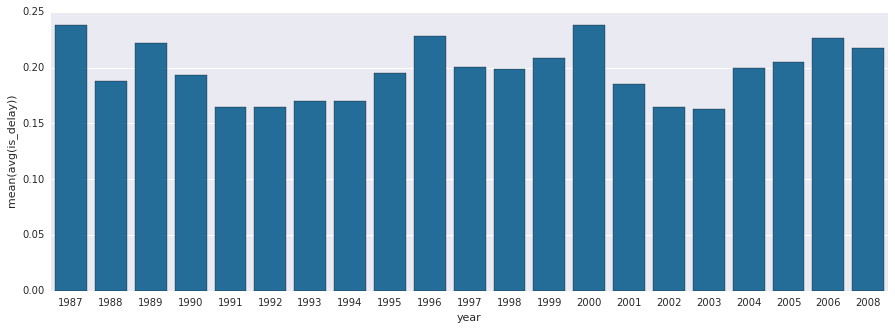

In [18]:
plt.figure(figsize = (15,5))
ax = sns.barplot(x="year", y="avg(is_delay)", data=df_years.toPandas(), color='#1172ab')


<div class="alert alert-success">
As we can see from the graph, there are years in which there are more delays is bigger but the difference is not big. So we cannot say that there were imporovements in the recent years respect to old ones.
But let's look how the carriers's number has changed during the years.
</div>

In [110]:
df_carrier = (
    df
    .select('year','carrier')
    .distinct()
    .groupBy('year')
    .count()
    .orderBy('year')
    .withColumnRenamed('count',"carriers's number")
)
#df_carrier.show()


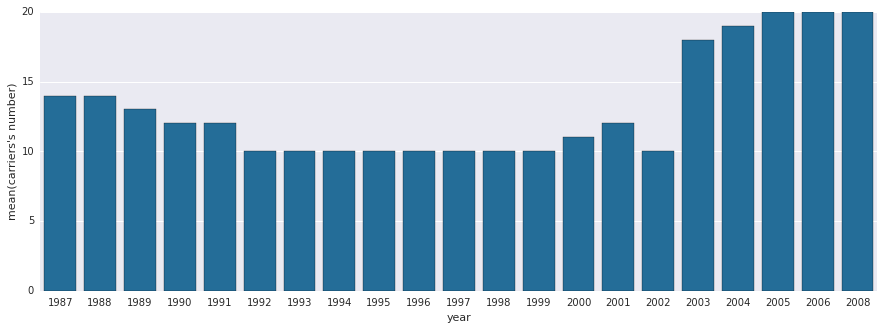

In [24]:
plt.figure(figsize = (15,5))
ax = sns.barplot(x="year", y="carriers's number", data=df_carrier.toPandas(), color='#1172ab')


<div class="alert alert-success">
We see that the number of airports and the number of carriers increased over the years, especially from the 2003. However, according with what we have discovered before, we can say that a big number of carriers does not cause less delays.
</div>

In [111]:
df_fights = (
    df
    .groupBy('year')
    .count()
    .orderBy('year')
    .withColumnRenamed('count',"tot flights")
)
#df_fights.show()

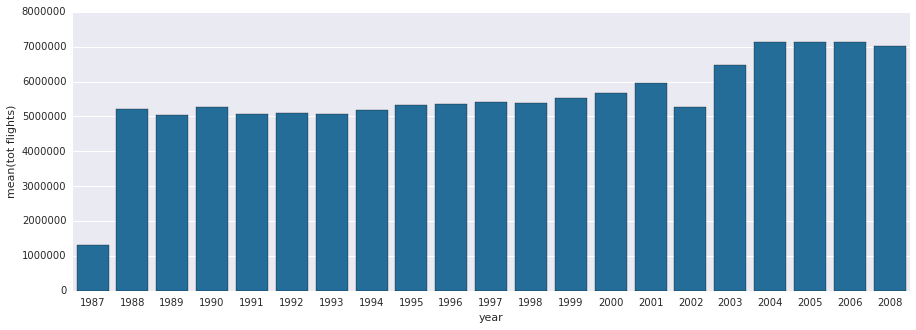

In [26]:
plt.figure(figsize = (15,5))
ax = sns.barplot(x="year", y="tot flights", data=df_fights.toPandas(), color='#1172ab')

<div class="alert alert-success">
As we can see form the graph above, the number of flights is increased during the years. In particular, there is a big difference between the 1987 and 1988. However this could be caused by the fact that the 1987 data are older and maybe less. hovere, also not considering this specific year, we can note that, in 20 years (1988-2008), the number of flights increased of 200000 filghts per year.
<br>
<br>
When we look at possible outliers, we see that in 2002 the number of flights dropped, we think this was because of the fear after the 9-11-2001 terrorist attack at the TwinTowers
</div>

In [112]:
df_airports = (
    df
    .select('year','src_airport')
    .distinct()
    .groupBy('year')
    .agg({"src_airport": "count"})
    .orderBy('year')
)

#df_airports.show()


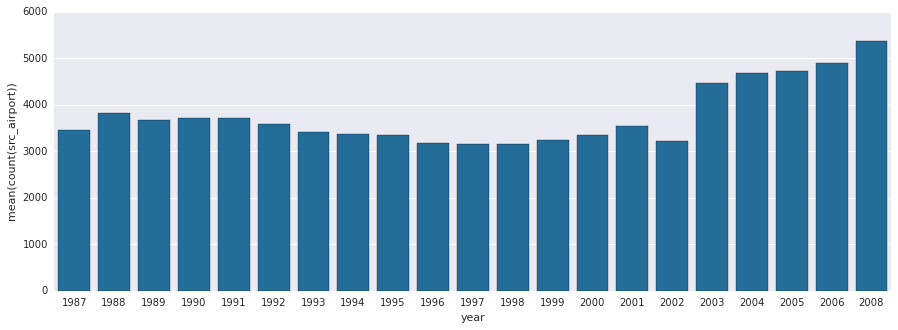

In [32]:
plt.figure(figsize = (15,5))
ax = sns.barplot(x="year", y="count(src_airport)", data=df_airports.toPandas(), color='#1172ab')

<div class="alert alert-success">
Looking to the airports number, we can say that they are increased in the last years, as the number of carriers and the number of flights. At the opposite the delay doesn't depend on the year; so we can can conclude that also if the volume in terms of carriers and flights is increased the delay ratio is not increased; this probably because it was possible to distribute the load between a major number of airports.
</div>

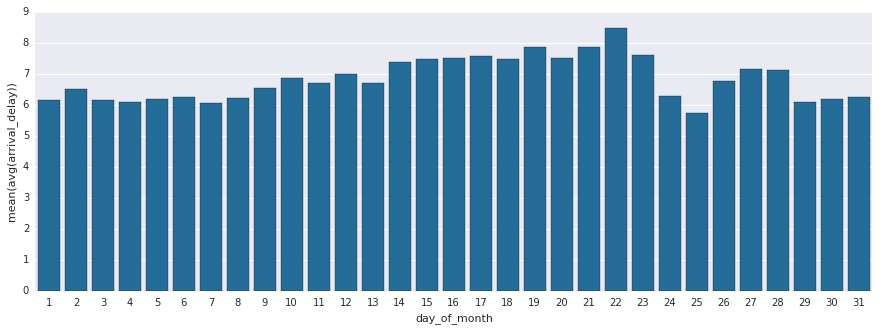

In [34]:
# create new column that marks whether the flights are delay
df_with_delay = df.withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))

statistic_day_of_month = (
    df_with_delay
        .groupBy('day_of_month')
        .agg(func.mean('arrival_delay')).alias('mean_delay')
        # order by day_of_month
        .orderBy('day_of_month')
    )

plt.figure(figsize = (15,5))
ax = sns.barplot(x="day_of_month", y="avg(arrival_delay)", data=statistic_day_of_month.toPandas(), color='#1172ab')



<div class="alert alert-success">
Before, considering the 1994, we have noted that there were picks in the distribution, considering the day of month and the arrival delays. However, now, we can confirm that, as we expected, considering all the year, the day of month doesn't seem having any impact on the delays. In fact, now, the distribution is totally different and it seems more homogenous.
</div>

# Model based on all years

In [113]:
# select distinct source airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_src = (
    df
    .groupBy('src_airport')
    .agg(func.count('*').alias('count'))
    .orderBy(desc('count'))
    )

# extract the airport names from stat_src
src_airports = [item[0] for item in stat_src.collect()]
#print(src_airports)
num_src_airports = len(src_airports)
src_airports_idx = range(num_src_airports)
map_src_airport_to_index = dict(zip(src_airports,src_airports_idx))
             
# test the dictionary
print(map_src_airport_to_index['ORD'])
print(map_src_airport_to_index['ATL'])

0
1


In [114]:
# select distinct destination airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_dest =( 
    df
    .groupBy('dest_airport')
    .agg(func.count('*').alias('count'))
    .orderBy(desc('count'))
    )

#stat_dest.show()                     
dest_airports = [item[0] for item in stat_dest.collect()]
#print(src_airports)
num_dest_airports = len(dest_airports)
dest_airports_idx= range(num_dest_airports)
map_dest_airports_to_index = dict(zip(dest_airports,dest_airports_idx))

# test them dictionary
print(map_dest_airports_to_index['ORD'])
print(map_dest_airports_to_index['ATL'])

0
1


In [115]:
# select distinct destination airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_carriers =( 
    df
    .groupBy('carrier')
    .agg(func.count('*').alias('count'))
    .orderBy(desc('count'))
    )

#stat_dest.show()                     
carriers = [item[0] for item in stat_carriers.collect()]
#print(carriers)
num_carriers = len(carriers)
carriers_idx = range(num_carriers)
map_carriers_to_index = dict(zip(carriers,carriers_idx))

# test them dictionary
print(map_carriers_to_index['DL'])
print(map_carriers_to_index['AS'])

0
10


In [116]:
the_most_common_month = (
    df
    .groupBy('month')
    .agg(func.count('*').alias('count'))
    .orderBy(desc('count'))
    ).first()[0]

print("The most common month:", the_most_common_month)

The most common month: 10


In [117]:
the_most_common_day_of_month = (
    df
    .groupBy('day_of_month')
    .agg(func.count('*').alias('count'))
    .orderBy(desc('count'))
    ).first()[0]

the_most_common_day_of_week = (
    df
    .groupBy('day_of_week')
    .agg(func.count('*').alias('count'))
    .orderBy(desc('count'))
    ).first()[0]

print("The most common day of month:", the_most_common_day_of_month)
print("The most common day of week:", the_most_common_day_of_week)

The most common day of month: 21
The most common day of week: 1


In [118]:
the_most_common_s_departure_time = (
    df
    .groupBy('scheduled_departure_time')
    .agg(func.count('*').alias('count'))
    .orderBy(desc('count'))
    ).first()[0]

the_most_common_s_arrival_time = (
    df
    .groupBy('scheduled_arrival_time')
    .agg(func.count('*').alias('count'))
    .orderBy(desc('count'))
    ).first()[0]

print("The most common scheduled departure time:", the_most_common_s_departure_time)
print("The most common scheduled arrival time:", the_most_common_s_arrival_time)

The most common scheduled departure time: 700
The most common scheduled arrival time: 0


In [119]:
# calculate mean distance
mean_distance = (
    df
    .agg((func.mean('distance')).alias('mean_distance'))
    .orderBy(desc('mean_distance'))
    ).first()[0]
print("mean distance:", mean_distance)

mean distance: 700.533898604928


In [120]:
# calculate mean arrival delay
mean_arrival_delay = (
    df
    .agg((func.mean('arrival_delay')).alias('mean_delay'))
    .orderBy(desc('mean_delay'))
    ).first()[0]


print("mean arrival delay:", mean_arrival_delay)

mean arrival delay: 6.848853200210374


In [121]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint


def is_valid(value):
    return value != "NA" and len(value) > 0

data =( 
    cleaned_data
    .map(lambda line: line.split(','))
    .map(lambda values: 
        LabeledPoint( 
            int(values[14]) if is_valid(values[14]) else mean_arrival_delay, # arrival delay
            [
                int(values[0]), # year
                int(values[1]) if is_valid(values[1]) else most_common_month, # month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_month, # day of month
                int(values[3]) if is_valid(values[3]) else the_most_common_day_of_week, # day of week
                int(values[5]) if is_valid(values[5]) else the_most_common_s_departure_time, # scheduled departure time
                int(values[7]) if is_valid(values[7]) else the_most_common_s_arrival_time, # scheduled arrival time
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index[values[8]] if is_valid(values[8]) else map_carriers_to_index[carriers[0]], # carrier
                map_src_airport_to_index[values[16]] if is_valid(values[16]) else map_src_airport_to_index_to_index[src_airports[0]], # src_airport
                map_dest_airports_to_index[values[17]] if is_valid(values[17]) else map_dest_airports_to_index_to_index[dest_airports[0]], # destination_airport
                int(values[18]) if is_valid(values[18]) else mean_distance, # distance
                1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
            ]
        )
    )
)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit((7,3))

trainingData = trainingData.cache()
testData = testData.cache()

In [122]:
# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {6 : num_carriers+1, 7: num_src_airports+1, 8: num_dest_airports+1, 10: 2}

# Train a DecisionTree model.
model = DecisionTree.trainRegressor(trainingData, 
                                    categoricalFeaturesInfo=categorical_info,
                                    impurity='variance', maxDepth=10, maxBins=511)
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)

testMSE = labelsAndPredictions.map(lambda p: ((p[0] - p[1])*(p[0] - p[1]))).mean()
t1 = time()

print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 850.5491884342449


<div class="alert alert-success">
Here we trained a decision tree, since we have a lot of data we used a less deep decision tree because otherwise it takes too much time.
<br>
<br>
For a decision tree with a limited depth, results are very good. We think that a random forest would be way better, but the rtaining time wuold be very long.
</div>

# Analysis on additional airplane informations

<div class="alert alert-success">
For the 2000 year we have at our disposal the tail numbers of the flights.
<br>
From the tail numbers we can associate many informations about the airplane, such as the manufacturer, the engine, the year of immatriculation.

<br>
Here we started our analysis on this data in order to see if we could use them later to improve our model
</div>

In [207]:
from_csv = pd.read_csv('planedata_clean.csv')
from_csv.rename(columns={'year': 'year_prod'}, inplace=True)
#from_csv.head()
planeDF = sqlContext.createDataFrame(from_csv).drop('Unnamed: 0')
#planeDF.show()

In [208]:
df_tail = (
    sqlContext
    .createDataFrame(cleaned_data_to_columns, airline_data_schema)
    .select(['tail_number', 'year', 'month', 'day_of_month', 'day_of_week', 'scheduled_departure_time', 'scheduled_arrival_time','scheduled_elapsed_time','carrier', 'arrival_delay', 'distance', 'src_airport', 'dest_airport'])
    .cache()
    )

In [209]:
df_join = df_tail.join(planeDF, df_tail.tail_number == planeDF.tailnum, 'left_outer').cache()

In [210]:
input_path = "/datasets/airline/2000.csv"
raw_data = sc.textFile(input_path)

In [211]:
#todo better cleaning
# extract the header
header = raw_data.first()


# replace invalid data with NULL and remove header
cleaned_data = (
    raw_data
    # filter out the header
    .filter(lambda line: line != header)
    # replace the missing values with empty characters
    #.map(lambda line: line.replace(',NA', ','))
    .map(lambda line: ','.join(list(map(lambda x: x if x != 'NA' else '',line.split(',')))))
    #todo fix map
)
        
print("number of rows after cleaning:", cleaned_data.count())

number of rows after cleaning: 5683047


In [212]:
sqlContext = SQLContext(sc)


# Declare the data schema
# see http://stat-computing.org/dataexpo/2009/the-data.html
# for more information
airline_data_schema = StructType([ \
    #StructField( name, dataType, nullable)
    StructField("year",                     IntegerType(), True), \
    StructField("month",                    IntegerType(), True), \
    StructField("day_of_month",             IntegerType(), True), \
    StructField("day_of_week",              IntegerType(), True), \
    StructField("departure_time",           IntegerType(), True), \
    StructField("scheduled_departure_time", IntegerType(), True), \
    StructField("arrival_time",             IntegerType(), True), \
    StructField("scheduled_arrival_time",   IntegerType(), True), \
    StructField("carrier",                  StringType(),  True), \
    StructField("flight_number",            StringType(),  True), \
    StructField("tail_number",              StringType(), True), \
    StructField("actual_elapsed_time",      IntegerType(), True), \
    StructField("scheduled_elapsed_time",   IntegerType(), True), \
    StructField("air_time",                 IntegerType(), True), \
    StructField("arrival_delay",            IntegerType(), True), \
    StructField("departure_delay",          IntegerType(), True), \
    StructField("src_airport",              StringType(),  True), \
    StructField("dest_airport",             StringType(),  True), \
    StructField("distance",                 IntegerType(), True), \
    StructField("taxi_in_time",             IntegerType(), True), \
    StructField("taxi_out_time",            IntegerType(), True), \
    StructField("cancelled",                StringType(),  True), \
    StructField("cancellation_code",        StringType(),  True), \
    StructField("diverted",                 StringType(),  True), \
    StructField("carrier_delay",            IntegerType(), True), \
    StructField("weather_delay",            IntegerType(), True), \
    StructField("nas_delay",                IntegerType(), True), \
    StructField("security_delay",           IntegerType(), True), \
    StructField("late_aircraft_delay",      IntegerType(), True)\
])

In [213]:
# convert each line into a tuple of features (columns)
cleaned_data_to_columns = cleaned_data.map(lambda l: l.split(","))\
    .map(lambda cols: 
         (
            int(cols[0])  if cols[0] else None,
            int(cols[1])  if cols[1] else None,
            int(cols[2])  if cols[2] else None,
            int(cols[3])  if cols[3] else None,
            int(cols[4])  if cols[4] else None,
            int(cols[5])  if cols[5] else None,
            int(cols[6])  if cols[6] else None,
            int(cols[7])  if cols[7] else None,
            cols[8]       if cols[8] else None,
            cols[9]       if cols[9] else None,
            cols[10]      if cols[10] else None,
            int(cols[11]) if cols[11] else None,
            int(cols[12]) if cols[12] else None,
            int(cols[13]) if cols[13] else None,
            int(cols[14]) if cols[14] else None,
            int(cols[15]) if cols[15] else None,
            cols[16]      if cols[16] else None,
            cols[17]      if cols[17] else None,
            int(cols[18]) if cols[18] else None,
            int(cols[19]) if cols[19] else None,
            int(cols[20]) if cols[20] else None,
            cols[21]      if cols[21] else None,
            cols[22]      if cols[22] else None,
            cols[23]      if cols[23] else None,
            int(cols[24]) if cols[24] else None,
            int(cols[25]) if cols[25] else None,
            int(cols[26]) if cols[26] else None,
            int(cols[27]) if cols[27] else None,
            int(cols[28]) if cols[28] else None
         ))

In [214]:
df_tail_2000 = (
    sqlContext
    .createDataFrame(cleaned_data_to_columns, airline_data_schema)
    .select(['tail_number', 'year', 'month', 'day_of_month', 'day_of_week', 'scheduled_departure_time', 'scheduled_arrival_time','scheduled_elapsed_time','carrier', 'arrival_delay', 'distance', 'src_airport', 'dest_airport'])
    .cache()
    )

In [215]:
df_join = df_tail_2000.join(planeDF, df_tail_2000.tail_number == planeDF.tailnum, 'left_outer').cache()

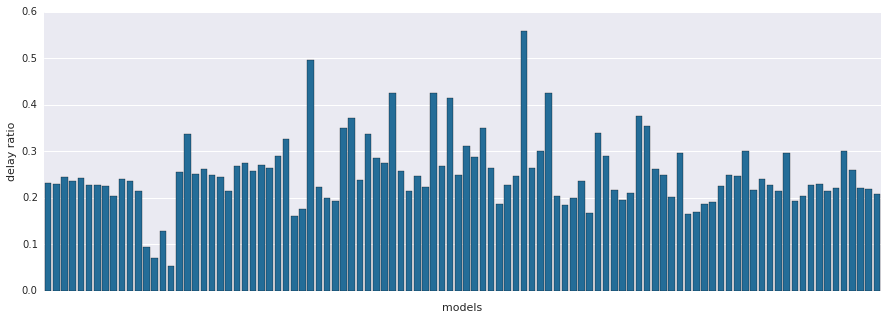

In [216]:
# create new column that marks whether the flights are delay
df_with_delay = df_join.withColumn('is_delay', when(df_join['arrival_delay'] >= 15, 1).otherwise(0))

statistic_day_of_week = (
    df_with_delay
        .groupBy('model')
        .agg(func.sum('is_delay')/func.count('*')).alias('delay_ratio')
        .orderBy('model')
    ).collect()

# collect data and plot
# collect data and plot
pdf_day_of_week = pd.DataFrame(data=statistic_day_of_week)


#print(pdf_day_of_week)

plt.figure(figsize = (15,5))
ax = sns.barplot(x=0, y=1, data=pdf_day_of_week, color='#1172ab')
ax.set_ylabel('delay ratio')
ax.set_xticklabels('')
ax.set_xlabel('models')
plt.show()

<div class="alert alert-success">
We see that different models have different delay ratio associated. 
<br>
We do not think that this is due to the specific model, but this is a consequence of the route that a specific plane follows.
</div>

<div class="alert alert-success">
Generally, we think that the informations that we get from this kind of data is biased by the actual route, thus we are non adding any information into our model.

<br>
<br>
We think that the weather data will be more useful to improve our model.
</div>

# Weather data extraction, transformation and load for 1994

<div class="alert alert-success">
As suggested at the end of the notebook we used http://www.wunderground.com/weather/api/ to retireve weather data. This was a long process because we have tried to obtain all the weather informations for 1994 and 2000 hour by hour, creating a Python script to query the data. At the end we get all possible data using the Api, however for some airports there were not such weather informations, 10 precisely. However these don't seem big airports, the majority of them are near Dominican Republic. For someone of them we searched manually the weather informations.

To start we uploaded the csv file containing the weather informations.
</div>

In [35]:
weather1994_PD = pd.read_csv('weather/weather.csv')

<div class="alert alert-success">
After uploading the file, we noted that some columns don't contain informations, so we removed them.
</div>

In [36]:
del weather1994_PD['precipm']
del weather1994_PD['heatindexm']
del weather1994_PD['windchillm']
del weather1994_PD['wgustm']
del weather1994_PD['hum']


<div class="alert alert-success">
All code below, until next chapter ("weather analysis 1994") was useful to add to the filghts dataframe the weather informations. So our final schema was:
('year','month','day_of_month','day_of_week','scheduled_departure_time','scheduled_arrival_time','scheduled_elapsed_time','carrier','arrival_delay','distance',
'src_airport','dest_airport','hour_src','hour_dest','lat_src','long_src','rain_src','fog_src','hail_src','snow_src','tornado_src','thunder_src','tempm_src',
'dewptm_src','wspdm_src','vism_src','pressurem_src','lat_dest','long_dest','rain_dest','fog_dest','hail_dest','snow_dest','tornado_dest','thunder_dest',
'tempm_dest','dewptm_dest','wspdm_dest','vism_dest','pressurem_dest')
</div>



In [ ]:
weather1994=sqlContext.createDataFrame(weather1994_PD).cache()
#weather1994.show(3)

In [38]:
weather1994_clean = weather1994.replace(-9999.0,'').cache()

In [39]:
weather1994_clean.toPandas().to_csv('weather_clean_1994.csv',index=False)

In [ ]:
from_csv = pd.read_csv('weather_clean_1994.csv')
#from_csv.head()
WeatherDF = sqlContext.createDataFrame(from_csv)

In [ ]:
WeatherDF.show()

In [ ]:
input_path = "/datasets/airline/1994.csv"
raw_data = sc.textFile(input_path)

In [ ]:
#todo better cleaning
# extract the header
header = raw_data.first()

def clean_line(line):
    fields = line.split(',')
    cleaned_line = ''
    for f in fields:
        index = fields.index(f)
        if f == 'NA':
            f = ''
        if  index>0:
            cleaned_line += ','+f
        else:
            cleaned_line += f
    return cleaned_line

# replace invalid data with NULL and remove header
cleaned_data = (
    raw_data
    # filter out the header
    .filter(lambda line: line != header)
    # replace the missing values with empty characters
    #.map(lambda line: line.replace(',NA', ','))
    .map(lambda line: ','.join(list(map(lambda x: x if x != 'NA' else '',line.split(',')))))
    #todo fix map
)
        
print("number of rows after cleaning:", cleaned_data.count())

In [ ]:
sqlContext = SQLContext(sc)


# Declare the data schema
# see http://stat-computing.org/dataexpo/2009/the-data.html
# for more information
airline_data_schema = StructType([ \
    #StructField( name, dataType, nullable)
    StructField("year",                     IntegerType(), True), \
    StructField("month",                    IntegerType(), True), \
    StructField("day_of_month",             IntegerType(), True), \
    StructField("day_of_week",              IntegerType(), True), \
    StructField("departure_time",           IntegerType(), True), \
    StructField("scheduled_departure_time", IntegerType(), True), \
    StructField("arrival_time",             IntegerType(), True), \
    StructField("scheduled_arrival_time",   IntegerType(), True), \
    StructField("carrier",                  StringType(),  True), \
    StructField("flight_number",            StringType(),  True), \
    StructField("tail_number",              StringType(), True), \
    StructField("actual_elapsed_time",      IntegerType(), True), \
    StructField("scheduled_elapsed_time",   IntegerType(), True), \
    StructField("air_time",                 IntegerType(), True), \
    StructField("arrival_delay",            IntegerType(), True), \
    StructField("departure_delay",          IntegerType(), True), \
    StructField("src_airport",              StringType(),  True), \
    StructField("dest_airport",             StringType(),  True), \
    StructField("distance",                 IntegerType(), True), \
    StructField("taxi_in_time",             IntegerType(), True), \
    StructField("taxi_out_time",            IntegerType(), True), \
    StructField("cancelled",                StringType(),  True), \
    StructField("cancellation_code",        StringType(),  True), \
    StructField("diverted",                 StringType(),  True), \
    StructField("carrier_delay",            IntegerType(), True), \
    StructField("weather_delay",            IntegerType(), True), \
    StructField("nas_delay",                IntegerType(), True), \
    StructField("security_delay",           IntegerType(), True), \
    StructField("late_aircraft_delay",      IntegerType(), True)\
])

In [ ]:
# convert each line into a tuple of features (columns)
cleaned_data_to_columns = cleaned_data.map(lambda l: l.split(","))\
    .map(lambda cols: 
         (
            int(cols[0])  if cols[0] else None,
            int(cols[1])  if cols[1] else None,
            int(cols[2])  if cols[2] else None,
            int(cols[3])  if cols[3] else None,
            int(cols[4])  if cols[4] else None,
            int(cols[5])  if cols[5] else None,
            int(cols[6])  if cols[6] else None,
            int(cols[7])  if cols[7] else None,
            cols[8]       if cols[8] else None,
            cols[9]       if cols[9] else None,
            cols[10]      if cols[10] else None,
            int(cols[11]) if cols[11] else None,
            int(cols[12]) if cols[12] else None,
            int(cols[13]) if cols[13] else None,
            int(cols[14]) if cols[14] else None,
            int(cols[15]) if cols[15] else None,
            cols[16]      if cols[16] else None,
            cols[17]      if cols[17] else None,
            int(cols[18]) if cols[18] else None,
            int(cols[19]) if cols[19] else None,
            int(cols[20]) if cols[20] else None,
            cols[21]      if cols[21] else None,
            cols[22]      if cols[22] else None,
            cols[23]      if cols[23] else None,
            int(cols[24]) if cols[24] else None,
            int(cols[25]) if cols[25] else None,
            int(cols[26]) if cols[26] else None,
            int(cols[27]) if cols[27] else None,
            int(cols[28]) if cols[28] else None
         ))

In [ ]:
df_1994 = (
    sqlContext
    .createDataFrame(cleaned_data_to_columns, airline_data_schema)
    .select(['year', 'month', 'day_of_month', 'day_of_week', 'scheduled_departure_time', 'scheduled_arrival_time','scheduled_elapsed_time','carrier', 'arrival_delay', 'distance', 'src_airport', 'dest_airport'])
    .cache()
    )

In [ ]:
df_1994 = df_1994.withColumn('hour_src', round(df_1994.scheduled_departure_time/100, 0)%24)
df_1994 = df_1994.withColumn("hour_src", df_1994["hour_src"].cast("int"))
df_1994 = df_1994.withColumn('hour_dest', round(df_1994.scheduled_arrival_time/100, 0)%24)
df_1994 = df_1994.withColumn("hour_dest", df_1994["hour_dest"].cast("int")).cache()

In [ ]:
WeatherDF.describe()

In [ ]:
WeatherDF_src = WeatherDF.select(*(col(x).alias(x + '_src') for x in WeatherDF.columns))
WeatherDF_dest = WeatherDF.select(*(col(x).alias(x + '_dest') for x in WeatherDF.columns))
df_join_1994 =(
    df_1994
    .join(WeatherDF_src,(df_1994.year ==WeatherDF_src.year_src ) & (df_1994.month ==WeatherDF_src.month_src ) & \
          (df_1994.day_of_month ==WeatherDF_src.day_of_month_src ) & (df_1994.src_airport ==WeatherDF_src.airport_src ) &(df_1994.hour_src ==WeatherDF_src.hour_src ),'left_outer')
    .cache()
)
df_join_1994_full =(
    df_join_1994
    .join(WeatherDF_dest,(df_join_1994.year ==WeatherDF_dest.year_dest ) & (df_join_1994.month ==WeatherDF_dest.month_dest ) & \
          (df_join_1994.day_of_month ==WeatherDF_dest.day_of_month_dest ) & (df_join_1994.dest_airport ==WeatherDF_dest.airport_dest ) & \
          (df_join_1994.hour_dest ==WeatherDF_dest.hour_dest ),'left_outer')
    .cache()
)
df_join_1994_full = df_join_1994_full.drop(WeatherDF_src.hour_src)
df_join_1994_full = df_join_1994_full.drop(WeatherDF_dest.hour_dest)
df_join_1994_full = (
df_join_1994_full
.select(['year','month','day_of_month','day_of_week','scheduled_departure_time','scheduled_arrival_time','scheduled_elapsed_time','carrier','arrival_delay','distance','src_airport','dest_airport','hour_src','hour_dest','lat_src', 'long_src','rain_src','fog_src','hail_src','snow_src','tornado_src','thunder_src','tempm_src','dewptm_src','wspdm_src','vism_src','pressurem_src','lat_dest','long_dest','rain_dest','fog_dest','hail_dest','snow_dest','tornado_dest','thunder_dest','tempm_dest','dewptm_dest','wspdm_dest','vism_dest','pressurem_dest'])
)
df_join_1994_full.show()

# Weather analysis 1994

<div class="alert alert-success">
Here, we import the parquet file, saved before in hdfs and containig the flights with theweather infromations.
</div>

In [ ]:
df_join_1994_full.write.parquet("flights_1994_weather.parquet") 

In [6]:
#read parquet file
df_join_1994_full = sqlContext.read.parquet("flights_1994_weather.parquet") 
#df_join_1994_full.groupBy('rain_dest').count().show()

In [7]:
df_join_1994_full = df_join_1994_full.withColumn('is_delay', when(df_join_1994_full['arrival_delay'] >= 15, 1).otherwise(0))

In [76]:
def plot_weather_stat(DF, stat, stat2,nolabel=False):
    plt.figure(figsize=(15,6))  
    
    ax1 = plt.subplot(121)
    statistic_delay = DF.groupBy([stat])
    delay_ratio = statistic_delay.agg((func.sum('is_delay')/func.count('*')).alias('delay_ratio'))
    delay_ratio = (
        delay_ratio
        .orderBy(stat)
        .select([stat, 'delay_ratio'])
        .filter(delay_ratio[stat].isNotNull())
        .filter(delay_ratio[stat] != 'NaN')
    )                               
    pdf_delay = pd.DataFrame(data=delay_ratio.collect())   
    
      
    plt.ylabel("Delay ratio")
    plt.title('The delay ratio in function of ' + stat)
    plt.grid(True,which="both",ls="-")
    plt.xticks(pdf_delay[0])
    #plt.xlim([-0.5,23.5])
    plt.bar(pdf_delay[0],pdf_delay[1],align='center',color='#1172ab')
    if nolabel == True:
        plt.xticks([])
    
    plt.subplot(122,sharey=ax1)
    statistic_delay = DF.groupBy([stat2])
    delay_ratio = statistic_delay.agg((func.sum('is_delay')/func.count('*')).alias('delay_ratio'))
    delay_ratio = (
        delay_ratio
        .orderBy(stat2)
        .select([stat2, 'delay_ratio'])
        .filter(delay_ratio[stat2].isNotNull())
        .filter(delay_ratio[stat2] != 'NaN')
    )                               
    pdf_delay = pd.DataFrame(data=delay_ratio.collect())   
    
      
    plt.ylabel("Delay ratio")
    plt.title('The delay ratio in function of ' + stat2)
    plt.grid(True,which="both",ls="-")
    plt.xticks(pdf_delay[0])
    #plt.xlim([-0.5,23.5])
    plt.bar(pdf_delay[0],pdf_delay[1],align='center',color='#1172ab')
    if nolabel == True:
        plt.xticks([])
    

    plt.show()   

<div class="alert alert-success">
Now we plotted the delay ratio in function of our weather meters. When there is 0 or 1, 0 means the absence of the atmosphere phenomena, while 1 means it is present. For example, if the graph is about thunders, 1 means that we have thunders.
</div>



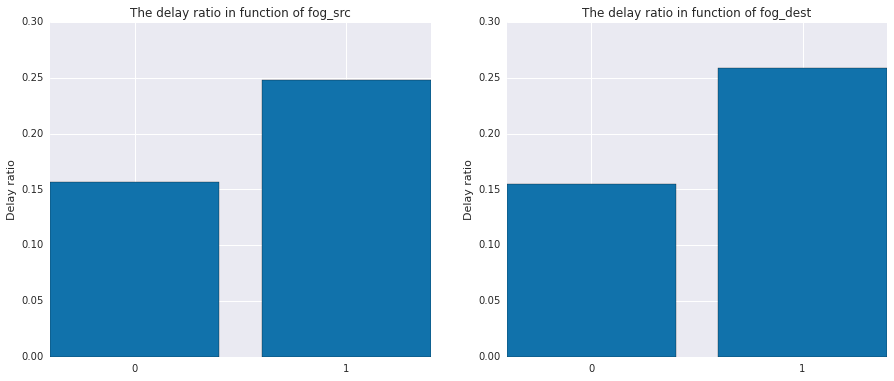

In [9]:
plot_weather_stat(df_join_1994_full,'fog_src','fog_dest')

<div class="alert alert-success">
This first graph is about the fog. We can see that the fog seems to have an impact on the delays. In fact when there is (1 in the graph) the number of delays increase. Thinking to this, we think that the result is right, because with more fog there is less visibility and pilot should pay more attention.
</div>

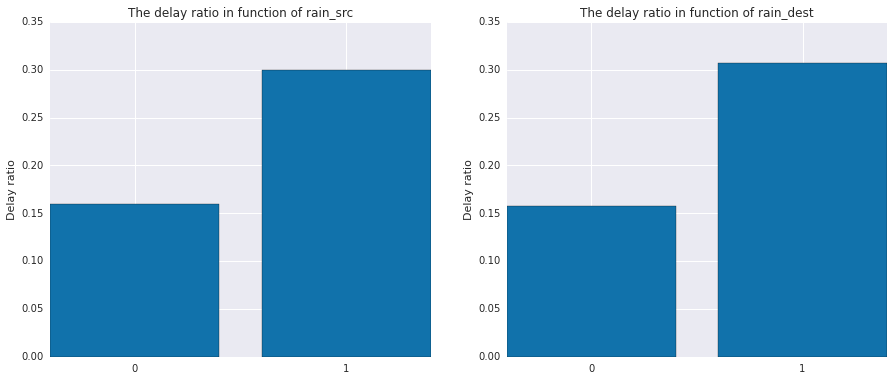

In [10]:
plot_weather_stat(df_join_1994_full,'rain_src','rain_dest')

<div class="alert alert-success">
This second graph shows the rain. Also in this case, we cna see that when it rains, the number of delays increases.
</div>

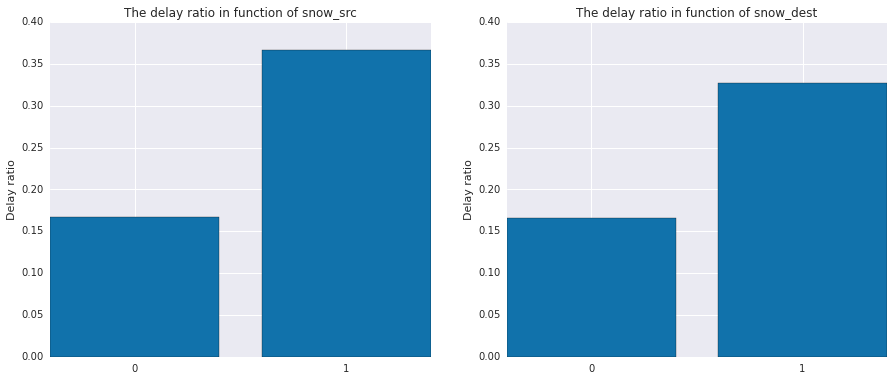

In [11]:
plot_weather_stat(df_join_1994_full,'snow_src','snow_dest')

<div class="alert alert-success">
Like for the rain and for the fog, also the snow (graph above) and the thunder (graph below) have an bad impact on the aircraft punctuality.
</div>

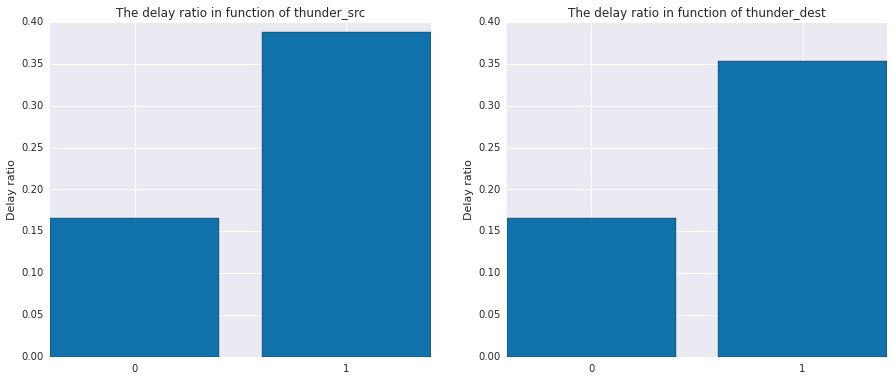

In [12]:
plot_weather_stat(df_join_1994_full,'thunder_src','thunder_dest')

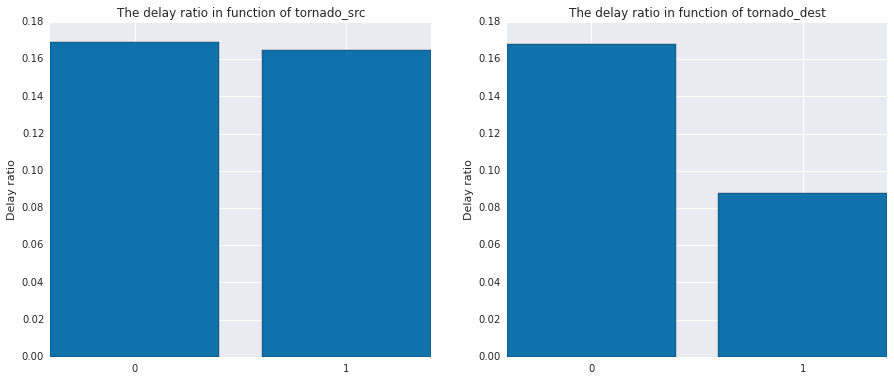

In [13]:
plot_weather_stat(df_join_1994_full,'tornado_src','tornado_dest')

<div class="alert alert-success">
Looking at the tornad impact, we can see it doesn't seem to have an impact; however we thoght that the flights are cancelled, in case of tornado. So probably thsi parameter does't influence the delays.
</div>

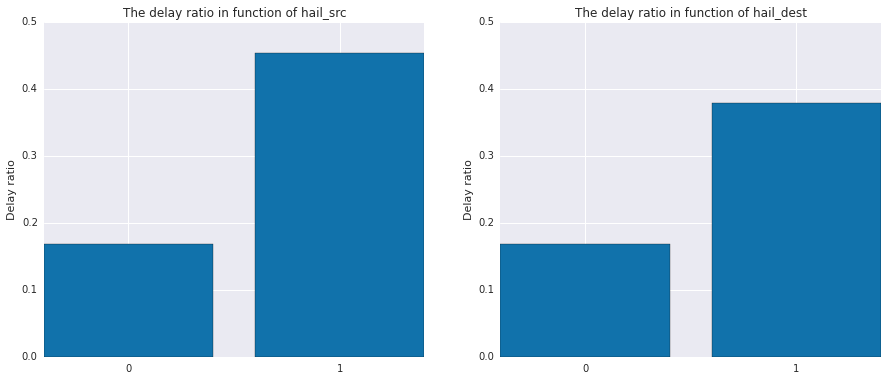

In [14]:
plot_weather_stat(df_join_1994_full,'hail_src','hail_dest')

<div class="alert alert-success">
As the rain, also the fog dratically influences the delays.
</div>

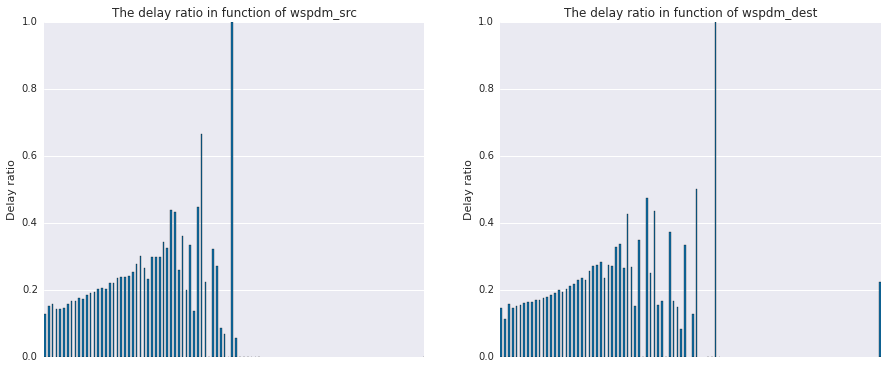

In [78]:
plot_weather_stat(df_join_1994_full,'wspdm_src','wspdm_dest',nolabel=True)

<div class="alert alert-success">
The wind speed (graph above) and the visibility (graph below) seem to have an impact. In fact, if the visibility increases, the number of delays is lower. At the opposite higher the wind speed is, bigger is the number of delays.
</div>

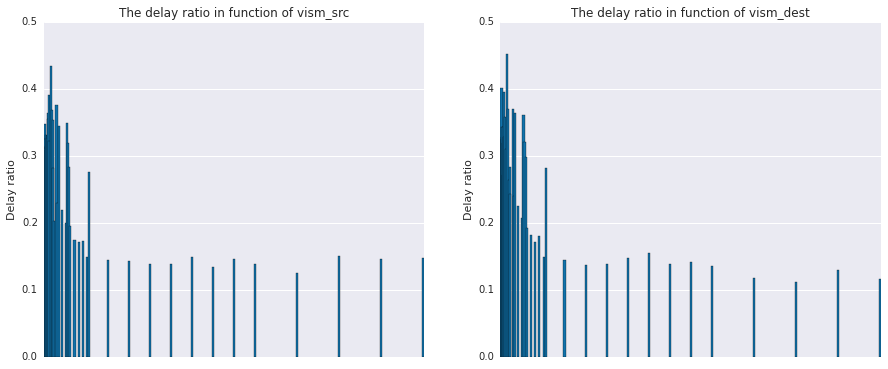

In [79]:
plot_weather_stat(df_join_1994_full,'vism_src','vism_dest',nolabel=True)

<div class="alert alert-success">
Conclusions from our analysis on weather data:
<br>
<br>
Useful non categorical features:
<br>
1) pressure: we see that at the extremes the delay ration is really high
<br>
2) wind speed: probably this is the most indicative element
<br>
3) visibility: higher visibility, higher probability to arrive in time
<br>
Not Useful non categorical features:
<br>
1) Longitude and Latitude are not meaningful
<br>
2) Temperature and DewPoint
<br>
<br>
Useful categorical features:
<br>
1) Fog, Rain, Snow, Thunder, Hail have a direct relationship with delays
<br>
<br>
Not Useful non categorical features:
<br>
2) Tornados, we think this is because when there is a tornado, the flight is cancelled
</div>

In [17]:
df_join_1994_full = (
df_join_1994_full
.select(['year','month','day_of_month','day_of_week','scheduled_departure_time','scheduled_arrival_time','carrier','arrival_delay','distance','src_airport','dest_airport','rain_src','fog_src','hail_src','snow_src','thunder_src','wspdm_src','rain_dest','fog_dest','hail_dest','snow_dest','thunder_dest','wspdm_dest'])
)

In [20]:
#df_join_1994_full.groupBy('rain_src').count().rdd.take(3)

In [19]:
#df_join_1994_full.groupBy('rain_src').count().show()


In [21]:
median_wspdm_src = df_join_1994_full.approxQuantile("wspdm_src", [0.5], 0.001)[0]

In [22]:
median_wspdm_dest = df_join_1994_full.approxQuantile("wspdm_dest", [0.5], 0.001)[0]

### correlation to understand which are the best features

In [19]:
import operator

def computeCorrelations(df,respectTo):
    def toNumerical(line):
        new_line = []
        for l in line:
            if type(l)==str:
                cleaned_str = ''.join(str(ord(c)) for c in l)
                new_line.append(int(cleaned_str))
            else:
                new_line.append(l)
        return tuple(new_line)
    
    columns = df.schema.names

    df_for_corr = (
         df
        .rdd.map(toNumerical).toDF(columns)
    )


    correlations = {}

    for column in columns:
        correlations[column] = df_for_corr.corr(column,respectTo)
    
    sorted_x = sorted(correlations.items(), key=operator.itemgetter(1),reverse=True)

    return sorted_x

In [20]:
arr_correlations = computeCorrelations(df_join_1994_full,'arrival_delay')

In [54]:
arr = [(x,arr_correlations[x]) for x in  filter(lambda x: x[1] == x[1] , arr_correlations)]

In [56]:
labels = ['feature','correlation']

                     feature  correlation
22                 vism_dest    -0.063736
9                   vism_src    -0.056577
12                     month    -0.042468
16               src_airport    -0.028773
26                   carrier    -0.021992
2               dest_airport    -0.017010
19               day_of_week    -0.014975
31                  lat_dest    -0.009874
5             pressurem_dest    -0.008399
10              tornado_dest    -0.000590
8                tornado_src     0.000386
4                    lat_src     0.002988
24                 hail_dest     0.004174
30             pressurem_src     0.005195
28                  hail_src     0.007226
21                  distance     0.011532
14    scheduled_elapsed_time     0.013504
6                  long_dest     0.015623
15                  long_src     0.019949
29              day_of_month     0.022195
17                 snow_dest     0.054723
18                  snow_src     0.066920
20              thunder_dest     0

[]

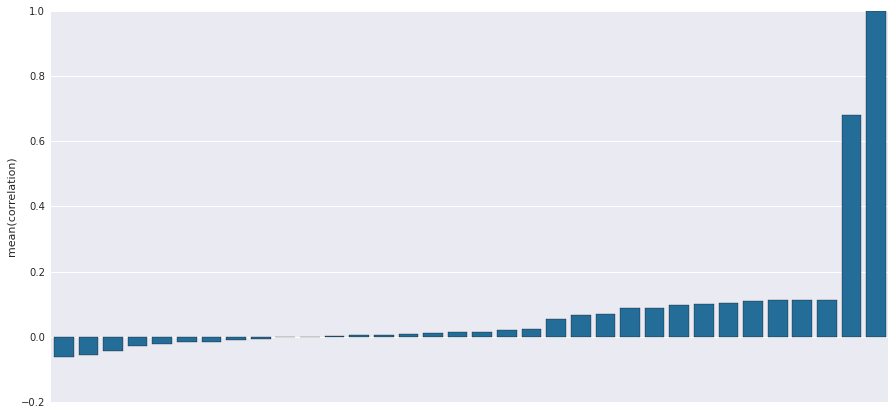

In [67]:

#pd_correlation = pd.DataFrame({'feature':arr_correlations.keys(),'correlation':arr_correlations.values()})
pd_correlation = pd.DataFrame.from_records(arr, columns=labels)

pd_correlation = pd_correlation.sort_values(['correlation'])
print(pd_correlation)

plt.figure(figsize=(15,7))
ax = sns.barplot(x="feature", y="correlation", data=pd_correlation,color='#1172ab')
ax.set_xlabel('')
ax.set_xticklabels('')

<div class="alert alert-success">
Conclusions from our analysis on correlation values:
<br>
As expected, the arrival delay and the is_delay column are the columns that are more correlated.
Looking at the other columns, we see that there are different values, but the correlation is always less than 0.2. This suggests that none of them has a direct impact on the delay. This also explains because it is so hard to predict the delay.
<br>
As expected, the features that are related to the weather conditions have the biggest impact on the delay together with the departure and arrival hour.
<br>
This confirms the charts that we have found before.
<br>
<br>
Looking at the features with the minimum impact, we note the latitude and longitude.
Looking at weather informations that are not useful, we note the hail, which has a very low correlation factor, even though we have seen that when it is present many flights are delayed.
<br>
We think that the correlation and the charts we did before can help us to choose the best features for our model.
</div>

In [82]:
def create_features_array(line):
    arr = []
    for value in line:
        arr.append(str(value))
    return arr

In [26]:
# select distinct source airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_src = (
    df_join_1994_full
    .groupBy('src_airport')
    .agg(func.count('*').alias('count'))
    .orderBy(desc('count'))
    )

# extract the airport names from stat_src
src_airports = [item[0] for item in stat_src.collect()]
#print(src_airports)
num_src_airports = len(src_airports)
src_airports_idx = range(num_src_airports)
map_src_airport_to_index = dict(zip(src_airports,src_airports_idx))

# test the dictionary
print(map_src_airport_to_index['ORD'])
print(map_src_airport_to_index['ATL'])

0
2


In [27]:
# select distinct destination airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_dest =( 
    df_join_1994_full
    .groupBy('dest_airport')
    .agg(func.count('*').alias('count'))
    .orderBy(desc('count'))
    )

#stat_dest.show()                     
dest_airports = [item[0] for item in stat_dest.collect()]
#print(src_airports)
num_dest_airports = len(dest_airports)
dest_airports_idx= range(num_dest_airports)
map_dest_airports_to_index = dict(zip(dest_airports,dest_airports_idx))

# test them dictionary
print(map_dest_airports_to_index['ORD'])
print(map_dest_airports_to_index['ATL'])

0
2


In [28]:
# select distinct destination airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_carriers =( 
    df_join_1994_full
    .groupBy('carrier')
    .agg(func.count('*').alias('count'))
    .orderBy(desc('count'))
    )

#stat_dest.show()                     
carriers = [item[0] for item in stat_carriers.collect()]
#print(carriers)
num_carriers = len(carriers)
carriers_idx = range(num_carriers)
map_carriers_to_index = dict(zip(carriers,carriers_idx))

# test them dictionary
print(map_carriers_to_index['DL'])
print(map_carriers_to_index['AS'])

0
9


In [29]:
# calculate mean arrival delay
mean_arrival_delay = (
    df_join_1994_full
    .agg((func.mean('arrival_delay')).alias('mean_delay'))
    .orderBy(desc('mean_delay'))
    ).first()[0]


print("mean arrival delay:", mean_arrival_delay)

mean arrival delay: 5.591941650432622


In [30]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint


def is_valid(value):
    return value != "None" and len(value) > 0 
def is_valid_weather_float(value):
    return float(value) > -99999
def is_valid_weather(value):
    return float(value) > -1 and float(value) < 2

def is_valid_delay(value):
    return value != "None" and len(value) > 0 and int(value) > -99999



data =( 
    df_join_1994_full.fillna(-99999).rdd
    .map(create_features_array)
    .map(lambda values: 
        LabeledPoint( 
            int(values[7]) if is_valid_delay(values[7]) else mean_arrival_delay, # arrival delay
            [
                int(values[0]), # year
                int(values[1]) if is_valid(values[1]) else most_common_month, # month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_month, # day of month
                int(values[3]) if is_valid(values[3]) else the_most_common_day_of_week, # day of week
                int(values[4]) if is_valid(values[4]) else the_most_common_s_departure_time, # scheduled departure time
                int(values[5]) if is_valid(values[5]) else the_most_common_s_arrival_time, # scheduled arrival time
                int(values[11]) if is_valid_weather(values[11]) else 0, #rain
                int(values[12]) if is_valid_weather(values[12]) else 0, #fog
                int(values[13]) if is_valid_weather(values[13]) else 0, #hail
                int(values[14]) if is_valid_weather(values[14]) else 0, #snow
                int(values[15]) if is_valid_weather(values[15]) else 0, #thunder
                float(values[16]) if is_valid_weather_float(values[16]) else median_wspdm_src, #wspdm
                int(values[17]) if is_valid_weather(values[17]) else 0, #rain
                int(values[18]) if is_valid_weather(values[18]) else 0, #fog
                int(values[19]) if is_valid_weather(values[19]) else 0, #hail
                int(values[20]) if is_valid_weather(values[20]) else 0, #snow
                int(values[21]) if is_valid_weather(values[21]) else 0, #thunder
                float(values[22]) if is_valid_weather_float(values[22]) else median_wspdm_dest, #wspdm
                
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index[values[6]] if is_valid(values[6]) else map_carriers_to_index[carriers[0]], # carrier
                map_src_airport_to_index[values[9]] if is_valid(values[9]) else map_src_airport_to_index_to_index[src_airports[0]], # src_airport
                map_dest_airports_to_index[values[10]] if is_valid(values[10]) else map_dest_airports_to_index_to_index[dest_airports[0]], # destination_airport
                int(values[8]) if is_valid(values[8]) else mean_distance, # distance
                1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
            ]
        )
    )
)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit((7,3))

trainingData = trainingData.cache()
testData = testData.cache()

In [31]:
num_carriers = 226
num_src_airports = 225
num_dest_airports = 224

In [34]:
categorical_info = {18 : num_carriers+1, 19: num_src_airports+1, 20: num_dest_airports+1, 22: 2, 6: 2,7: 2,8: 2,9: 2,10: 2,12: 2,13: 2,14: 2,15: 2,16: 2}

In [35]:
from pyspark.mllib.tree import RandomForest, RandomForestModel

t0 = time()

model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                                numTrees=11, impurity='variance', maxDepth=17, maxBins=255)


predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)

testMSE = labelsAndPredictions.map(lambda p: ((p[0] - p[1])*(p[0] - p[1]))).mean()
t1 = time()

print('Test Mean Squared Error = ' + str(testMSE))
print("finish training in %f secs" % (t1 - t0))

Test Mean Squared Error = 440.4071667369696
finish training in 334.780816 secs


<div class="alert alert-success">
We see that even adding the weather informations, the result does not improve. We think that this is because we have too many features in our dataset.
<br> 
In order to improve the results, we decided to calculate the correlation of each attribute with the arrival delay and then choose the best features.
Then we decided to increase the number of iterations of the random forest
</div>


In [39]:
arr_correlations = computeCorrelations(df_join_1994_full,'arrival_delay')
print(arr_correlations)

[('year', nan), ('wspdm_dest', nan), ('wspdm_src', nan), ('arrival_delay', 1.0), ('scheduled_departure_time', 0.11376277530803797), ('scheduled_arrival_time', 0.11322635726027847), ('rain_dest', 0.10341314581797119), ('rain_src', 0.10114602277268091), ('fog_dest', 0.09680209875105197), ('fog_src', 0.08962035239241292), ('thunder_src', 0.08911094851402071), ('thunder_dest', 0.07067290568020479), ('snow_src', 0.06692011173632254), ('snow_dest', 0.05472282831288941), ('day_of_month', 0.02219488790535736), ('distance', 0.011531539356302762), ('hail_src', 0.007225612952488982), ('hail_dest', 0.004173794237519582), ('day_of_week', -0.014975177422440424), ('dest_airport', -0.017009652106196652), ('carrier', -0.021992474214907323), ('src_airport', -0.028773167850036873), ('month', -0.04246790768874669)]


<div class="alert alert-success">
Conclusions from our correlation test:
<br>
hail_dest and hail_src have a very low correlation, so we discard them

</div>

In [40]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint


def is_valid(value):
    return value != "None" and len(value) > 0 
def is_valid_weather_float(value):
    return float(value) > -99999
def is_valid_weather(value):
    return float(value) > -1 and float(value) < 2

def is_valid_delay(value):
    return value != "None" and len(value) > 0 and int(value) > -99999
data =( 
    df_join_1994_full.fillna(-99999).rdd
    .map(create_features_array)
    .map(lambda values: 
        LabeledPoint( 
            int(values[7]) if is_valid_delay(values[7]) else mean_arrival_delay, # arrival delay
            [
                int(values[1]) if is_valid(values[1]) else most_common_month, # month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_month, # day of month
                int(values[3]) if is_valid(values[3]) else the_most_common_day_of_week, # day of week
                int(values[4]) if is_valid(values[4]) else the_most_common_s_departure_time, # scheduled departure time
                int(values[5]) if is_valid(values[5]) else the_most_common_s_arrival_time, # scheduled arrival time
                int(values[11]) if is_valid_weather(values[11]) else 0, #rain
                int(values[12]) if is_valid_weather(values[12]) else 0, #fog
                int(values[14]) if is_valid_weather(values[14]) else 0, #snow
                int(values[15]) if is_valid_weather(values[15]) else 0, #thunder
                int(values[17]) if is_valid_weather(values[17]) else 0, #rain
                int(values[18]) if is_valid_weather(values[18]) else 0, #fog
                int(values[20]) if is_valid_weather(values[20]) else 0, #snow
                int(values[21]) if is_valid_weather(values[21]) else 0, #thunder                
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index[values[6]] if is_valid(values[6]) else map_carriers_to_index[carriers[0]], # carrier
                map_src_airport_to_index[values[9]] if is_valid(values[9]) else map_src_airport_to_index_to_index[src_airports[0]], # src_airport
                map_dest_airports_to_index[values[10]] if is_valid(values[10]) else map_dest_airports_to_index_to_index[dest_airports[0]], # destination_airport
                int(values[8]) if is_valid(values[8]) else mean_distance, # distance
                1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
            ]
        )
    )
)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit((7,3))

trainingData = trainingData.cache()
testData = testData.cache()

<div class="alert alert-success">
Since now we have a lot of data and we want to train a random forest very deep, we decided to mark month, day of month and day of week as categorical attributes.
</div>

In [43]:
categorical_info = {0:13, 1:32, 2:8, 13 : num_carriers+1, 14: num_src_airports+1, 15: num_dest_airports+1, 17:2, 5:2, 6:2, 7:2, 8:2, 9:2, 10:2, 11:2, 12:2}

In [44]:
from pyspark.mllib.tree import RandomForest, RandomForestModel

t0 = time()

model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                                numTrees=15, impurity='variance', maxDepth=17, maxBins=255)

predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)

testMSE = labelsAndPredictions.map(lambda p: ((p[0] - p[1])*(p[0] - p[1]))).mean()
t1 = time()

print('Test Mean Squared Error = ' + str(testMSE))
print("finish training in %f secs" % (t1 - t0))

Test Mean Squared Error = 413.92496837192476
finish training in 704.458485 secs


<div class="alert alert-success">
We obtain a good result, but we think that we can do better if we select our features better, but for now we explored enough this topic.
</div>

# Weather data for other years

<div class="alert alert-success">
Looking at the weather data of more recent years we have seen that they are much more detailed.
We think that thi can help us building an even better model.
</div>